<a href="https://colab.research.google.com/github/fleminpaul/MachineLearning/blob/main/Ad_Ease_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/AdEase/train_1.csv")
df

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              NaN         NaN         NaN  ...        48.0         9.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4             25.0        13.0         3.0        11.0        27.0   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             13.0        36.0        10.0  
...            ...         ...         ...  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[145063 rows x 551 columns]

In [ ]:
df.shape
# As mention there are 145K page details

(145063, 551)

- The data contains Page Column with Page information and date columns with view count for the corresponding pages
- Checking for null data across the horizontal axis
- I am ignoring the pages,if the missing value is greater than 25%

# **Handling NULL Values**


###### Checking for Null values across the horizontal axis

In [ ]:
# caluclating the null value %
isnan=(df.isna().sum(axis=1)/len(df.columns))*100

In [ ]:
# finding the count or records which are having more than 25% of null values
df_isna = df[isnan>=25]
df_isna.shape

(16577, 551)

In [ ]:
df.shape

(145063, 551)

In [ ]:
#Checking how much data I am ignoring
df_isna.shape[0]/df.shape[0]
# 11% of data I am ignoring due to more than 25% of null values

0.11427448763640626

In [ ]:
# filtering data with some nan values
df_some_nan = df[isnan<25]

In [ ]:
df_some_nan

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
5                 5566_zh.wikipedia.org_all-access_spider        12.0   
...                                                   ...         ...   
144978  Lucifer_(serie_de_televisión)_es.wikipedia.org...         NaN   
144979  Especial:MiDiscusión_es.wikipedia.org_all-acce...         NaN   
144980  Inferno_(película_de_2016)_es.wikipedia.org_al...         NaN   
144981  Campeonato_de_Primera_División_2016-17_(Argent...         NaN   
144982  Área_metropolitana_de_Ciudad_del_Este_es.wikip...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
5              7.0         4.0         5.0        20.0         8.0   
...            ...         ...         ...         ...         ...   
144978         NaN         NaN         NaN         NaN         NaN   
144979         NaN         NaN         NaN         NaN         NaN   
144980         NaN         NaN         NaN         NaN         NaN   
144981         NaN         NaN         NaN         NaN         NaN   
144982         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
5              5.0        17.0        24.0  ...        16.0        27.0   
...            ...         ...         ...  ...         ...         ...   
144978         NaN         NaN         NaN  ...        17.0         1.0   
144979         NaN         NaN         NaN  ...        56.0        34.0   
144980         NaN         NaN         NaN  ...        18.0        14.0   
144981         NaN         NaN         NaN  ...        41.0        36.0   
144982         NaN         NaN         NaN  ...         4.0         1.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
5              8.0        17.0        32.0        19.0        23.0   
...            ...         ...         ...         ...         ...   
144978         4.0         5.0         4.0        26.0         4.0   
144979        30.0        37.0        47.0        42.0        27.0   
144980         4.0        12.0        11.0         6.0        11.0   
144981        54.0        27.0        50.0       153.0        34.0   
144982         1.0         1.0         3.0         3.0         2.0   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
5             17.0        17.0        50.0  
...            ...         ...         ...  
144978         3.0         1.0         5.0  
144979        36.0        31.0        38.0  
144980         8.0         9.0         5.0  
144981        52.0         8.0         7.0  
144982         1.0         0.0         0.0  

[128486 rows x 551 columns]

In [ ]:
# Set display options to show full rows and columns
# pd.set_option('display.max_rows', None)        # Show all rows
# pd.set_option('display.max_columns', None)     # Show all columns
# pd.set_option('display.max_colwidth', None)    # S
df_some_nan[df_some_nan.isna().sum(axis=1)>0].head(100)

Page  2015-07-01  \
10             ASTRO_zh.wikipedia.org_all-access_spider         NaN   
27    Beautiful_Mind_zh.wikipedia.org_all-access_spider         NaN   
64    Goodbye_Mr._Black_zh.wikipedia.org_all-access_...         NaN   
78          Intel740_zh.wikipedia.org_all-access_spider         NaN   
80             Juksy_zh.wikipedia.org_all-access_spider         1.0   
...                                                 ...         ...   
3449            北極振盪_zh.wikipedia.org_all-access_spider         NaN   
3450        卡尔·兰德施泰纳_zh.wikipedia.org_all-access_spider         NaN   
3451      二二八事件受难者列表_zh.wikipedia.org_all-access_spider         NaN   
3452             南宮珉_zh.wikipedia.org_all-access_spider         NaN   
3453  Category:音樂作品封面_zh.wikipedia.org_all-access_sp...         NaN   

      2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
10           NaN         NaN         NaN         NaN         1.0         1.0   
27           NaN         NaN         NaN         NaN         NaN         NaN   
64           NaN         NaN         NaN         NaN         NaN         NaN   
78           0.0         1.0         2.0         NaN         1.0         2.0   
80           0.0         1.0         3.0         0.0         1.0         0.0   
...          ...         ...         ...         ...         ...         ...   
3449         0.0         3.0         6.0         4.0         2.0         1.0   
3450         2.0         1.0         3.0         3.0         2.0         2.0   
3451         0.0         NaN         1.0         1.0         1.0         0.0   
3452        23.0         3.0         2.0         8.0         1.0        12.0   
3453         2.0         NaN         NaN         3.0         2.0         0.0   

      2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  \
10           NaN         NaN  ...        11.0        38.0        85.0   
27           NaN         NaN  ...        11.0         8.0         6.0   
64           NaN         NaN  ...         8.0         7.0        24.0   
78           1.0         2.0  ...         5.0         5.0        10.0   
80           5.0         2.0  ...         2.0         2.0         4.0   
...          ...         ...  ...         ...         ...         ...   
3449         1.0         6.0  ...         5.0         6.0         5.0   
3450         3.0         3.0  ...         2.0         6.0         9.0   
3451         0.0         0.0  ...         4.0         7.0         5.0   
3452        63.0       153.0  ...        22.0         4.0        45.0   
3453         1.0         2.0  ...       241.0       231.0       182.0   

      2016-12-25  2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  \
10          79.0        30.0        14.0        10.0        38.0        12.0   
27           7.0         2.0        11.0        11.0        29.0        12.0   
64          13.0        35.0        11.0         8.0        90.0        63.0   
78           3.0         7.0         2.0         7.0         6.0         9.0   
80           1.0         0.0         1.0         4.0         1.0         0.0   
...          ...         ...         ...         ...         ...         ...   
3449         7.0         5.0         4.0         9.0       102.0         7.0   
3450         9.0         6.0         4.0         2.0        12.0         8.0   
3451         3.0         9.0        10.0         3.0         6.0         2.0   
3452        16.0        12.0        26.0        12.0         4.0         8.0   
3453       149.0       115.0       132.0       150.0       137.0       151.0   

      2016-12-31  
10          51.0  
27          14.0  
64          13.0  
78           6.0  
80           5.0  
...          ...  
3449         7.0  
3450         9.0  
3451         3.0  
3452        49.0  
3453       100.0  

[100 rows x 551 columns]

In [ ]:
pages = df_some_nan['Page'].unique()
pages

array(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider', ...,
       'Inferno_(película_de_2016)_es.wikipedia.org_all-access_spider',
       'Campeonato_de_Primera_División_2016-17_(Argentina)_es.wikipedia.org_all-access_spider',
       'Área_metropolitana_de_Ciudad_del_Este_es.wikipedia.org_all-access_spider'],
      dtype=object)

In [ ]:
len(pages)

128486

# **Linear Interpolation and Fill with 0s**

In [ ]:
df_imputed = df_some_nan.copy()
# Perform linear interpolation row-wise
df_imputed.iloc[:, 1:] = df_imputed.iloc[:, 1:].interpolate(method='linear', axis=1)

# Reset the index to convert 'Page' back to a column
df_imputed.reset_index(inplace=True)
df_imputed.fillna(0,inplace=True)
df_imputed

index                                               Page  2015-07-01  \
0            0            2NE1_zh.wikipedia.org_all-access_spider        18.0   
1            1             2PM_zh.wikipedia.org_all-access_spider        11.0   
2            2              3C_zh.wikipedia.org_all-access_spider         1.0   
3            3         4minute_zh.wikipedia.org_all-access_spider        35.0   
4            5            5566_zh.wikipedia.org_all-access_spider        12.0   
...        ...                                                ...         ...   
128481  144978  Lucifer_(serie_de_televisión)_es.wikipedia.org...         0.0   
128482  144979  Especial:MiDiscusión_es.wikipedia.org_all-acce...         0.0   
128483  144980  Inferno_(película_de_2016)_es.wikipedia.org_al...         0.0   
128484  144981  Campeonato_de_Primera_División_2016-17_(Argent...         0.0   
128485  144982  Área_metropolitana_de_Ciudad_del_Este_es.wikip...         0.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              7.0         4.0         5.0        20.0         8.0   
...            ...         ...         ...         ...         ...   
128481         0.0         0.0         0.0         0.0         0.0   
128482         0.0         0.0         0.0         0.0         0.0   
128483         0.0         0.0         0.0         0.0         0.0   
128484         0.0         0.0         0.0         0.0         0.0   
128485         0.0         0.0         0.0         0.0         0.0   

        2015-07-07  2015-07-08  ...  2016-12-22  2016-12-23  2016-12-24  \
0              9.0        22.0  ...        32.0        63.0        15.0   
1             22.0        11.0  ...        17.0        42.0        28.0   
2              0.0         3.0  ...         3.0         1.0         1.0   
3             14.0         9.0  ...        32.0        10.0        26.0   
4              5.0        17.0  ...        16.0        27.0         8.0   
...            ...         ...  ...         ...         ...         ...   
128481         0.0         0.0  ...        17.0         1.0         4.0   
128482         0.0         0.0  ...        56.0        34.0        30.0   
128483         0.0         0.0  ...        18.0        14.0         4.0   
128484         0.0         0.0  ...        41.0        36.0        54.0   
128485         0.0         0.0  ...         4.0         1.0         1.0   

        2016-12-25  2016-12-26  2016-12-27  2016-12-28  2016-12-29  \
0             26.0        14.0        20.0        22.0        19.0   
1             15.0         9.0        30.0        52.0        45.0   
2              7.0         4.0         4.0         6.0         3.0   
3             27.0        16.0        11.0        17.0        19.0   
4             17.0        32.0        19.0        23.0        17.0   
...            ...         ...         ...         ...         ...   
128481         5.0         4.0        26.0         4.0         3.0   
128482        37.0        47.0        42.0        27.0        36.0   
128483        12.0        11.0         6.0        11.0         8.0   
128484        27.0        50.0       153.0        34.0        52.0   
128485         1.0         3.0         3.0         2.0         1.0   

        2016-12-30  2016-12-31  
0             18.0        20.0  
1             26.0        20.0  
2              4.0        17.0  
3             10.0        11.0  
4             17.0        50.0  
...            ...         ...  
128481         1.0         5.0  
128482        31.0        38.0  
128483         9.0         5.0  
128484         8.0         7.0  
128485         0.0         0.0  

[128486 rows x 552 columns]

In [ ]:
df_imputed.reset_index(inplace=True, drop=True)
df_imputed.drop(columns=['index'],inplace=True)
df_imputed

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4                 5566_zh.wikipedia.org_all-access_spider        12.0   
...                                                   ...         ...   
128481  Lucifer_(serie_de_televisión)_es.wikipedia.org...         0.0   
128482  Especial:MiDiscusión_es.wikipedia.org_all-acce...         0.0   
128483  Inferno_(película_de_2016)_es.wikipedia.org_al...         0.0   
128484  Campeonato_de_Primera_División_2016-17_(Argent...         0.0   
128485  Área_metropolitana_de_Ciudad_del_Este_es.wikip...         0.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              7.0         4.0         5.0        20.0         8.0   
...            ...         ...         ...         ...         ...   
128481         0.0         0.0         0.0         0.0         0.0   
128482         0.0         0.0         0.0         0.0         0.0   
128483         0.0         0.0         0.0         0.0         0.0   
128484         0.0         0.0         0.0         0.0         0.0   
128485         0.0         0.0         0.0         0.0         0.0   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              5.0        17.0        24.0  ...        16.0        27.0   
...            ...         ...         ...  ...         ...         ...   
128481         0.0         0.0         0.0  ...        17.0         1.0   
128482         0.0         0.0         0.0  ...        56.0        34.0   
128483         0.0         0.0         0.0  ...        18.0        14.0   
128484         0.0         0.0         0.0  ...        41.0        36.0   
128485         0.0         0.0         0.0  ...         4.0         1.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4              8.0        17.0        32.0        19.0        23.0   
...            ...         ...         ...         ...         ...   
128481         4.0         5.0         4.0        26.0         4.0   
128482        30.0        37.0        47.0        42.0        27.0   
128483         4.0        12.0        11.0         6.0        11.0   
128484        54.0        27.0        50.0       153.0        34.0   
128485         1.0         1.0         3.0         3.0         2.0   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             17.0        17.0        50.0  
...            ...         ...         ...  
128481         3.0         1.0         5.0  
128482        36.0        31.0        38.0  
128483         8.0         9.0         5.0  
128484        52.0         8.0         7.0  
128485         1.0         0.0         0.0  

[128486 rows x 551 columns]

# **Splitting the Page Column**

In [ ]:
# Function to split the Page column correctly
def split_page(page):
    parts = page.rsplit('_', 3)  # Split from the right into 4 parts
    specific_name = '_'.join(parts[:-3])  # Join all parts except the last 3 for specific name
    language = parts[-3].split('.')[0]  # Split and get the language part
    access_type = parts[-2]
    access_origin = parts[-1]
    return specific_name, language, access_type, access_origin

# Apply the function to split the Page column
df_imputed[['SpecificName', 'Language', 'AccessType', 'AccesOrigin']] = df_imputed['Page'].apply(lambda x: pd.Series(split_page(x)))
columns = ['SpecificName', 'Language', 'AccessType', 'AccesOrigin'] + [col for col in df.columns if col not in ['SpecificName', 'Language', 'AccessType', 'AccesOrigin']]
df_splited = df_imputed[columns]
# Check the result
df_splited.drop(columns=['Page'],inplace=True)
print(df_splited)

                                             SpecificName Language  \
0                                                    2NE1       zh   
1                                                     2PM       zh   
2                                                      3C       zh   
3                                                 4minute       zh   
4                                                    5566       zh   
...                                                   ...      ...   
128481                      Lucifer_(serie_de_televisión)       es   
128482                               Especial:MiDiscusión       es   
128483                         Inferno_(película_de_2016)       es   
128484  Campeonato_de_Primera_División_2016-17_(Argent...       es   
128485              Área_metropolitana_de_Ciudad_del_Este       es   

        AccessType AccesOrigin  2015-07-01  2015-07-02  2015-07-03  \
0       all-access      spider        18.0        11.0         5.0   
1       all-access 

<ipython-input-23-88d27051eded>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_splited.drop(columns=['Page'],inplace=True)


# **Checking Dataset Details**

### Checking Langauages

In [ ]:
df_splited['Language'].nunique()

9

In [ ]:
languages=df_splited['Language'].unique()
languages
#There are 8 languages

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'],
      dtype=object)

### Checking Access Types

In [ ]:
df_splited['AccessType'].nunique()

3

In [ ]:
accessTypes=df_splited['AccessType'].unique()
accessTypes
# There are 3 access types

array(['all-access', 'desktop', 'mobile-web'], dtype=object)

### Checking Access Origin Details

In [ ]:
df_splited['AccesOrigin'].nunique()

2

In [ ]:
accessOrigins=df_splited['AccesOrigin'].unique()
accessOrigins
# There are 2 access origins

array(['spider', 'all-agents'], dtype=object)

Checking SpecificName Details

In [ ]:
df_splited['SpecificName'].nunique()

42407

In [ ]:
df_splited['SpecificName'].unique()

array(['2NE1', '2PM', '3C', ..., 'Kai_Häfner', 'ジャック・リーチャー', 'マイク眞木'],
      dtype=object)

# **Grouping Data based on Language**

In [ ]:
#grouped all datasets based on language and stored in array
zh=df_splited[df_splited['Language']=='zh']
en=df_splited[df_splited['Language']=='en']
fr=df_splited[df_splited['Language']=='fr']
ru=df_splited[df_splited['Language']=='ru']
www=df_splited[df_splited['Language']=='www']
de=df_splited[df_splited['Language']=='de']
ja=df_splited[df_splited['Language']=='ja']
commons=df_splited[df_splited['Language']=='commons']

language_dataset=[zh,en,fr,ru,www,de,ja,commons]

language_dataset

[      SpecificName Language  AccessType AccesOrigin  2015-07-01  2015-07-02  \
 0             2NE1       zh  all-access      spider        18.0        11.0   
 1              2PM       zh  all-access      spider        11.0        14.0   
 2               3C       zh  all-access      spider         1.0         0.0   
 3          4minute       zh  all-access      spider        35.0        13.0   
 4             5566       zh  all-access      spider        12.0         7.0   
 ...            ...      ...         ...         ...         ...         ...   
 95682          同樂會       zh  mobile-web  all-agents         0.0         0.0   
 95683           白只       zh  mobile-web  all-agents         0.0         0.0   
 95684        一屋老友記       zh  mobile-web  all-agents         0.0         0.0   
 95685  星際大戰外傳：俠盜一號       zh  mobile-web  all-agents         0.0         0.0   
 95686           春夏       zh  mobile-web  all-agents         0.0         0.0   
 
        2015-07-03  2015-07-04  2015-0

# **Working with Language EN**

In [ ]:
en.head()

SpecificName Language AccessType  \
7317                                      !vote       en    desktop   
7318                        "Weird_Al"_Yankovic       en    desktop   
7319                                 100_metres       en    desktop   
7320                        10_Gigabit_Ethernet       en    desktop   
7321  13_Hours:_The_Secret_Soldiers_of_Benghazi       en    desktop   

     AccesOrigin  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
7317  all-agents         3.0         4.0         7.0         4.0         4.0   
7318  all-agents      2403.0     20136.0      1850.0      1432.0      1351.0   
7319  all-agents       982.0       881.0       794.0       979.0      1191.0   
7320  all-agents      1078.0      1116.0       869.0       327.0       312.0   
7321  all-agents         0.0        45.0       462.0       448.0       424.0   

      2015-07-06  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
7317         2.0  ...         3.0         1.0         6.0         3.0   
7318      1792.0  ...      1401.0      1238.0       976.0       810.0   
7319      1057.0  ...       404.0       344.0       225.0       229.0   
7320      1123.0  ...      1004.0       613.0       289.0       264.0   
7321       574.0  ...      1809.0      1706.0      1484.0      1530.0   

      2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
7317         1.0         1.0         3.0         3.0         1.0         0.0  
7318       989.0      1332.0      1243.0      1681.0      1303.0      1098.0  
7319       335.0       313.0       379.0       393.0       354.0       272.0  
7320       439.0       687.0       713.0       701.0       510.0       298.0  
7321      1742.0      2263.0      2205.0      2041.0      1976.0      2148.0  

[5 rows x 554 columns]

In [ ]:
en.shape

(21352, 554)

In [ ]:
en['SpecificName'].nunique()

9601

In [ ]:
en['AccessType'].nunique()

3

In [ ]:
en['AccesOrigin'].nunique()

2

# **Melting Date Columns to Date Values and View Count Column**
- Converted ViewCount to Lacs

In [ ]:
def melt_date(df):
  # melting date and viewcount
  melted_df = df.melt(id_vars=['SpecificName', 'Language','AccessType', 'AccesOrigin'], var_name='Date', value_name='View Count')
  # converting date column to datetime
  melted_df['Date']=pd.to_datetime(melted_df['Date'])

  # drop column Language and Page
  #melted_df.drop(columns=['Language'],inplace=True)

  # Standardize the view count since the count is very huge using minMaxScaler
  # from sklearn.preprocessing import MinMaxScaler
  # scaler = MinMaxScaler()
  # melted_df['View Count'] = scaler.fit_transform(melted_df[['View Count']])

  # from sklearn.preprocessing import StandardScaler
  # scaler = StandardScaler()
  # melted_df['View Count'] = scaler.fit_transform(melted_df[['View Count']])

   # grouping data based on date
  df_group_date = melted_df.groupby(['Date','Language'])['View Count'].sum().reset_index()
  # sorting data based on date
  df_group_date=df_group_date.sort_values(by='Date')
  # converted the values in Lacs
  df_group_date['View Count']=np.round(df_group_date['View Count']/100000)
  return melted_df,df_group_date

In [ ]:
melted_df = zh.melt(id_vars=['SpecificName','Language' ,'AccessType', 'AccesOrigin'], var_name='Date', value_name='View Count')
melted_df['Date']=pd.to_datetime(melted_df['Date'])
melted_df
df_group_date = melted_df.groupby(['Date','Language'])['View Count'].sum().reset_index()
df_group_date

Date Language    View Count
0   2015-07-01       zh  4.144889e+06
1   2015-07-02       zh  4.151534e+06
2   2015-07-03       zh  4.123738e+06
3   2015-07-04       zh  4.163607e+06
4   2015-07-05       zh  4.441374e+06
..         ...      ...           ...
545 2016-12-27       zh  5.229714e+06
546 2016-12-28       zh  5.335023e+06
547 2016-12-29       zh  4.914411e+06
548 2016-12-30       zh  4.946838e+06
549 2016-12-31       zh  5.057579e+06

[550 rows x 3 columns]

In [ ]:
melted_zh,zh_group_date=melt_date(zh)
melted_fr,fr_group_date=melt_date(fr)
melted_en,en_group_date=melt_date(en)
melted_commons,commons_group_date=melt_date(commons)
melted_ru,ru_group_date=melt_date(ru)
melted_www,www_group_date=melt_date(www)
melted_de,de_group_date=melt_date(de)
melted_ja,ja_group_date=melt_date(ja)


In [ ]:
# ['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja'],
grouped_data=[zh_group_date,fr_group_date,en_group_date,commons_group_date,ru_group_date,www_group_date,de_group_date,ja_group_date]

# **Plots Group by Date for Each Language**

In [ ]:
# Plotting each Language time series
def plot_date(df,title):
  plt.figure(figsize=(20, 6))
  # Add mean plot
  plt.plot(df['Date'], df['View Count'].rolling(window=24).mean(), color='red', label='Rolling Mean')
  plt.plot(df['Date'], df['View Count'])
  plt.title(title)
  plt.xlabel('Date')
  plt.ylabel('View Count in Lacs')
  plt.show()


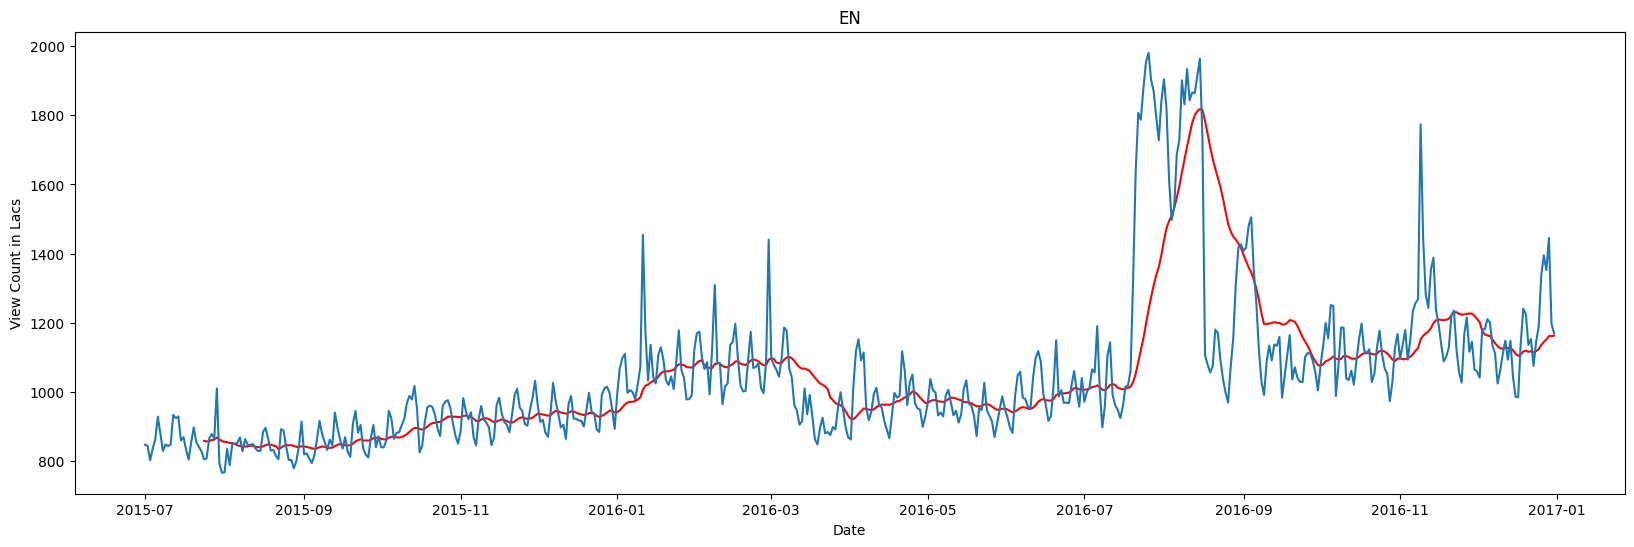

In [ ]:
plot_date(en_group_date,'EN')

- the plot is for language EN
- Plot Shows a slight increase in trend overtime
- there is a sudden spike between 07-2016 to 09-2016

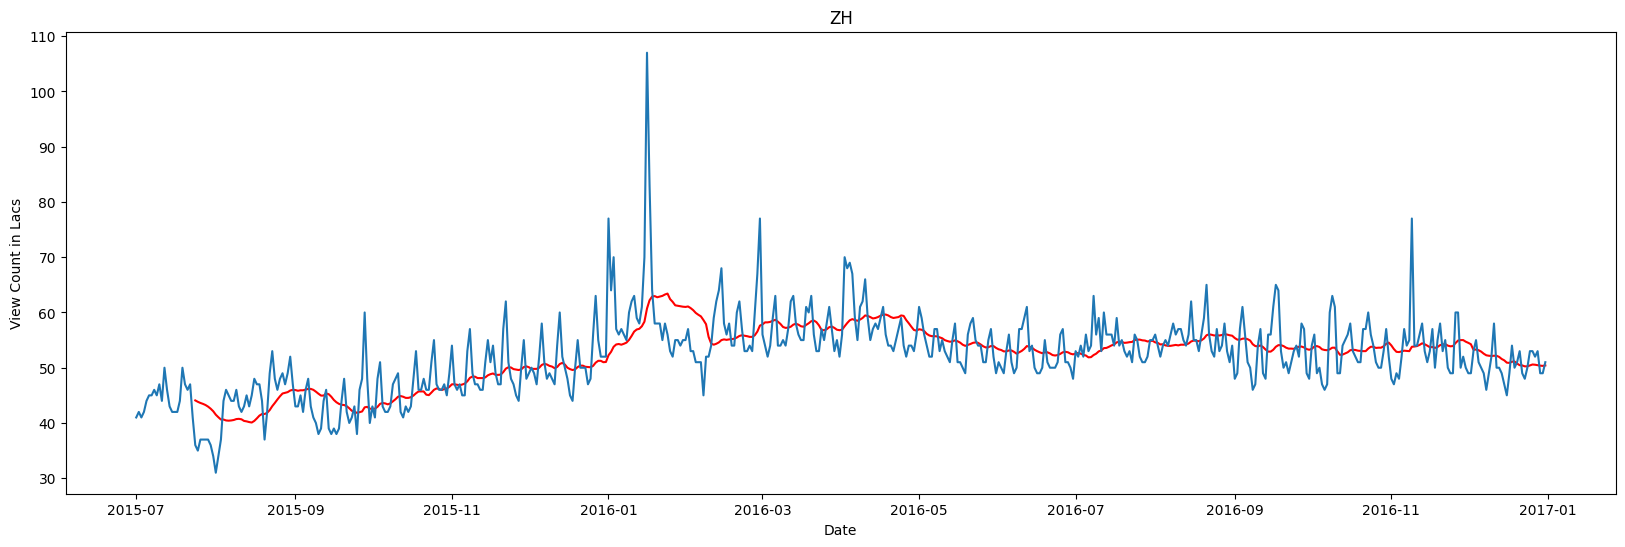

In [ ]:
plot_date(zh_group_date,'ZH')

- The plot is for language ZH
- There is slight up trend till 01-2016 then a slight downtrend or no trend

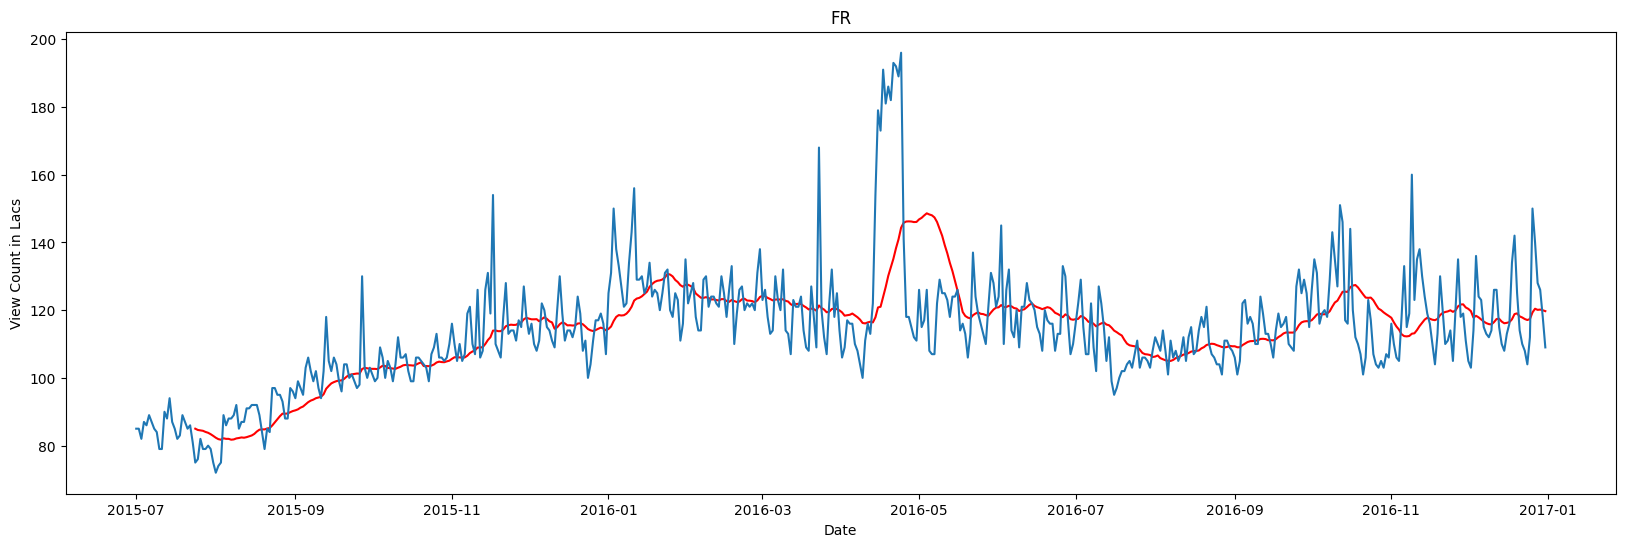

In [ ]:
plot_date(fr_group_date,'FR')

- The plot is for language FR
- There is slight up trend till 02-2016
- then a sudden spike during 04-2016 to 05 2016
- looks almost stationary afterwards

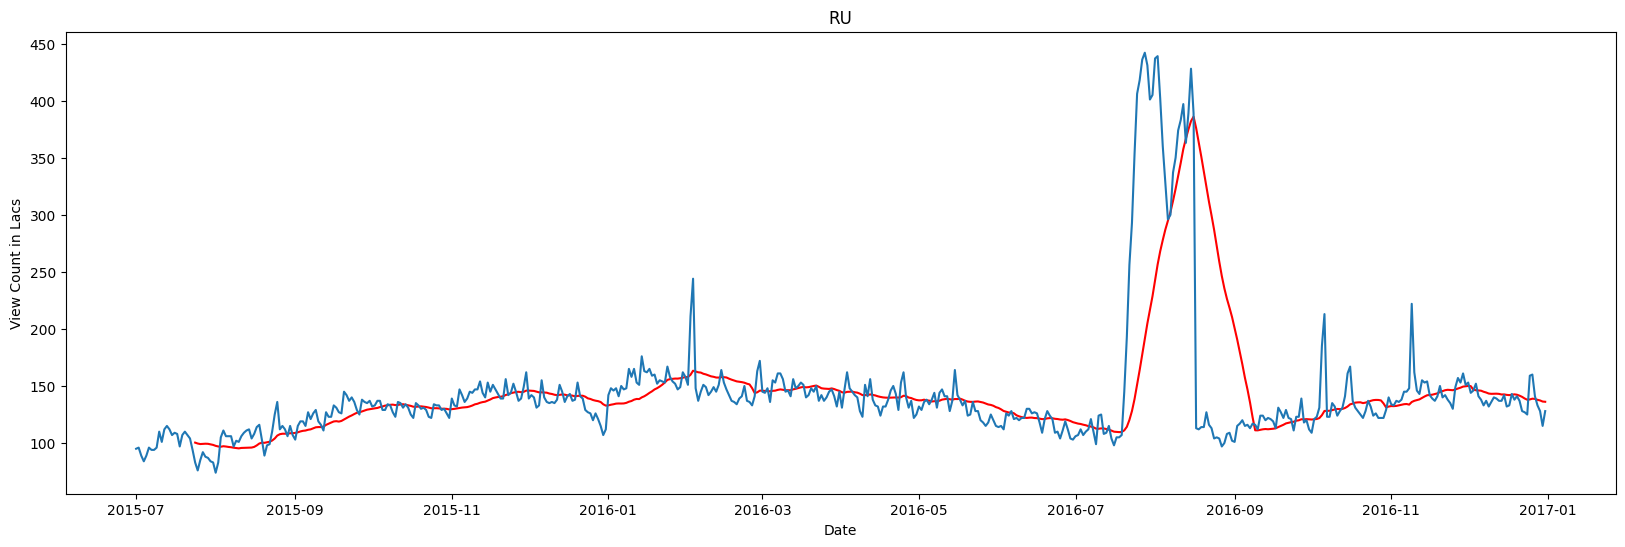

In [ ]:
plot_date(ru_group_date,'RU')

- The plot is for language RU
- There is not much trend
- A sudden spike during 07-2016 to 08 2016


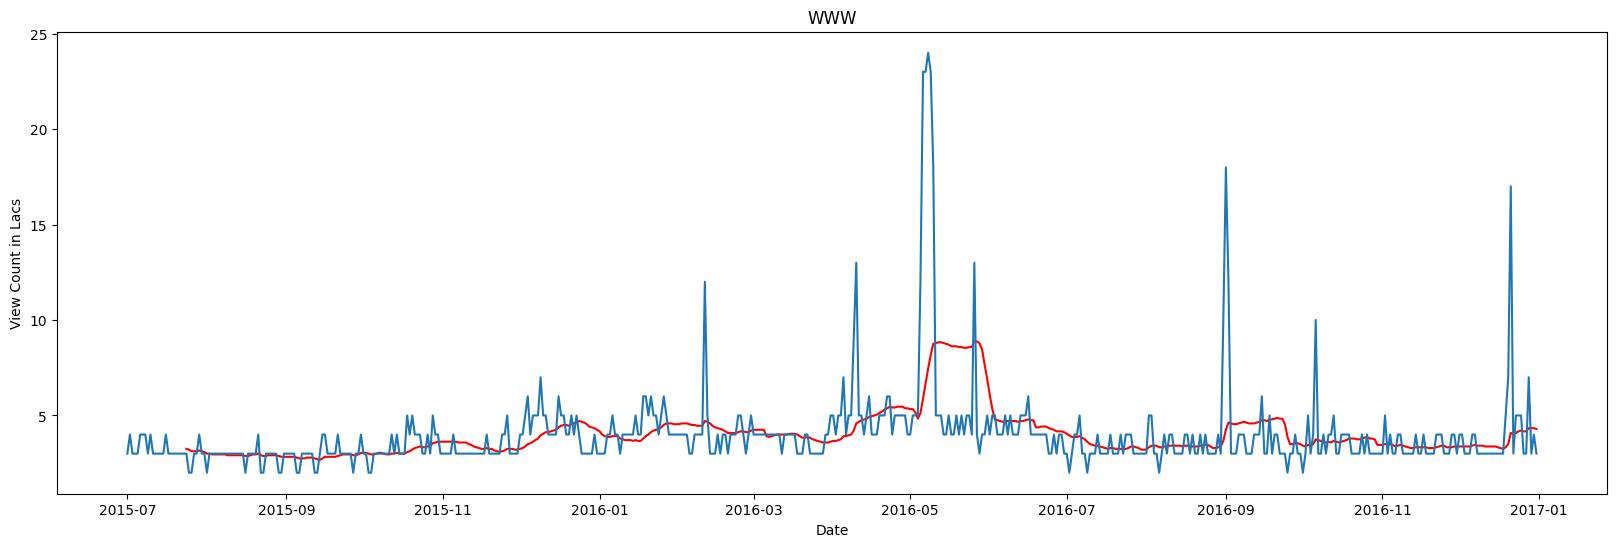

In [ ]:
plot_date(www_group_date,'WWW')

- The plot is for language WWW
- Looks stationary with few spikes

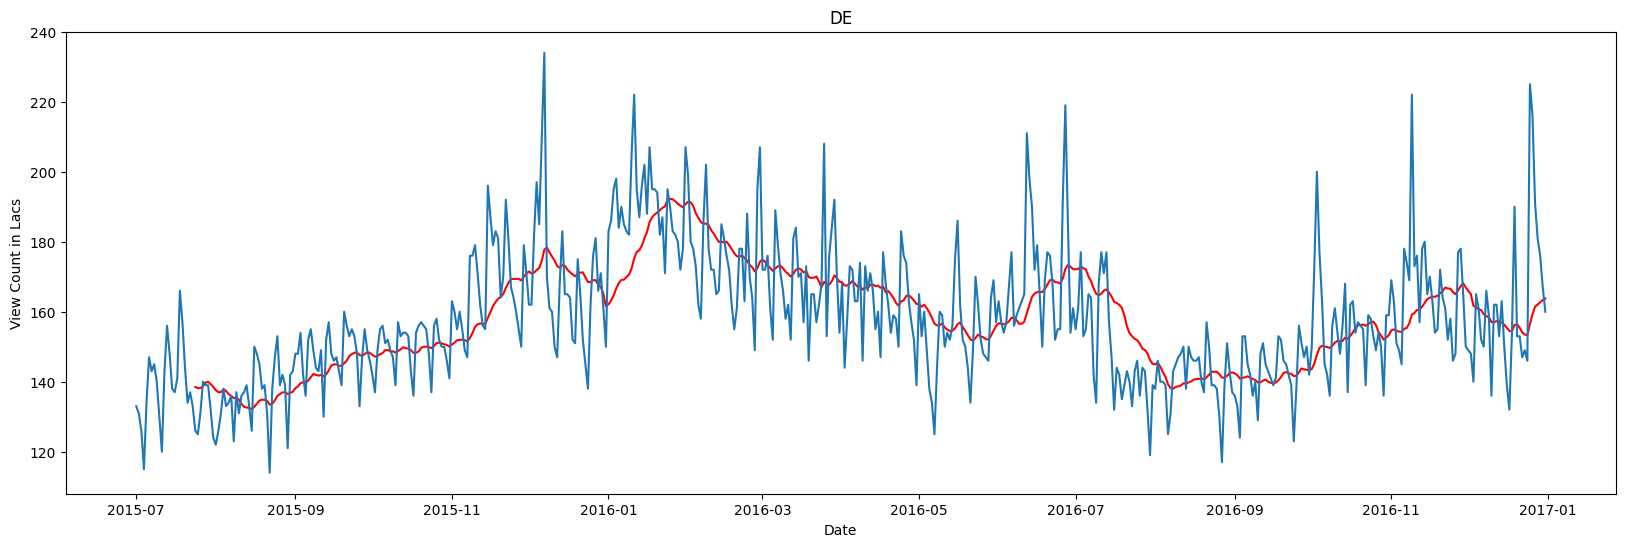

In [ ]:
plot_date(de_group_date,'DE')

- The plot is for language DE
- highly fluctuating

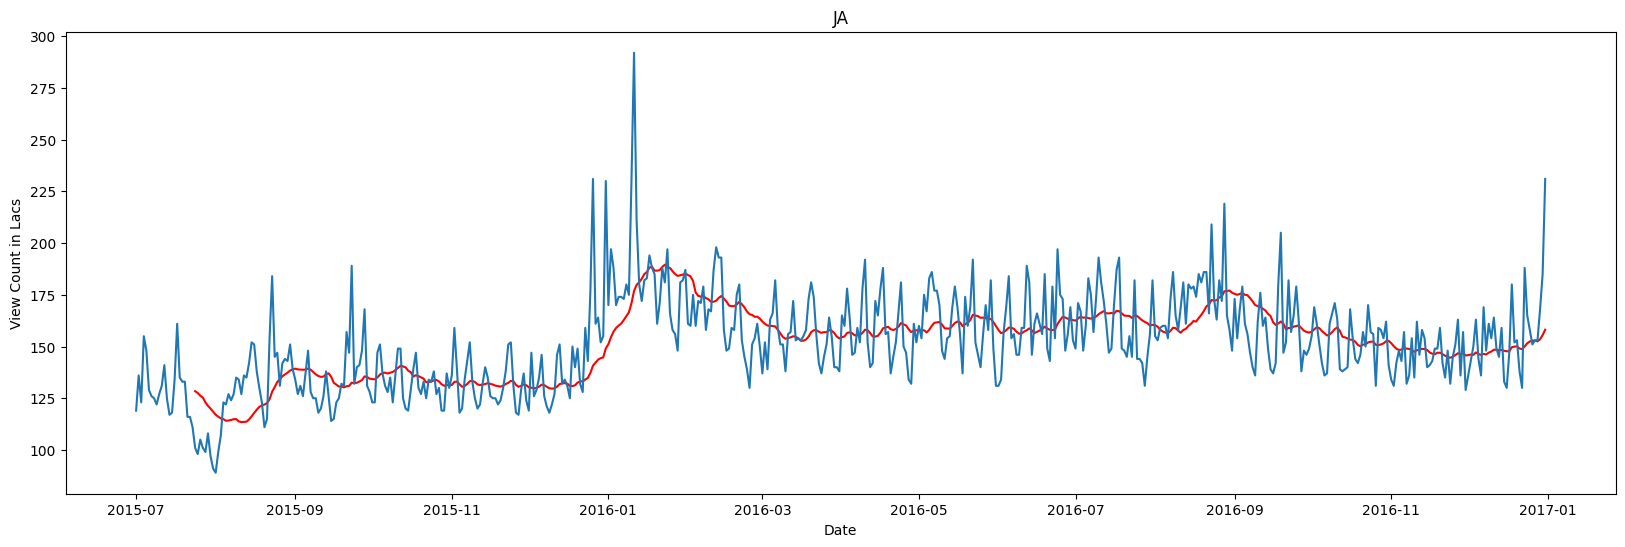

In [ ]:
plot_date(ja_group_date,'JA')

- The plot is for language JA
- can notice a increas in trend during 01-2016
- looks like a change point

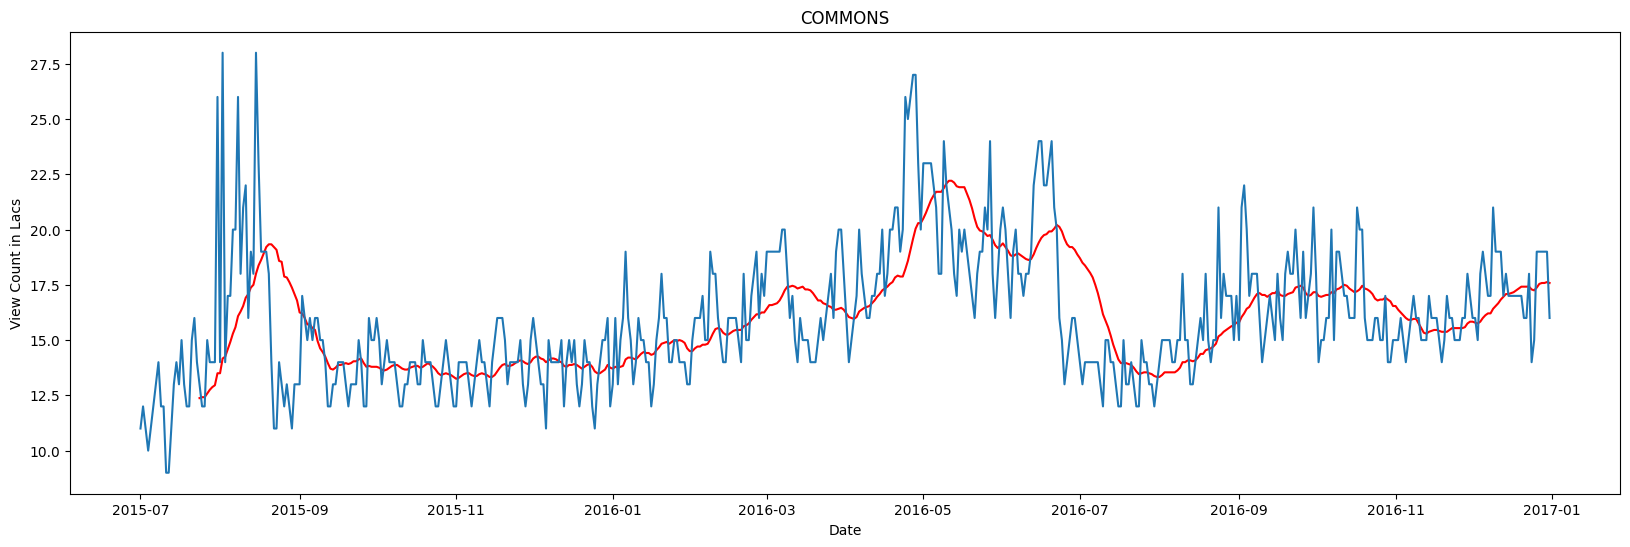

In [ ]:
plot_date(commons_group_date,'COMMONS')

# **Handling Anomalies**

In [ ]:
lan=languages.reshape(1,9)[0]
lan

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'],
      dtype=object)

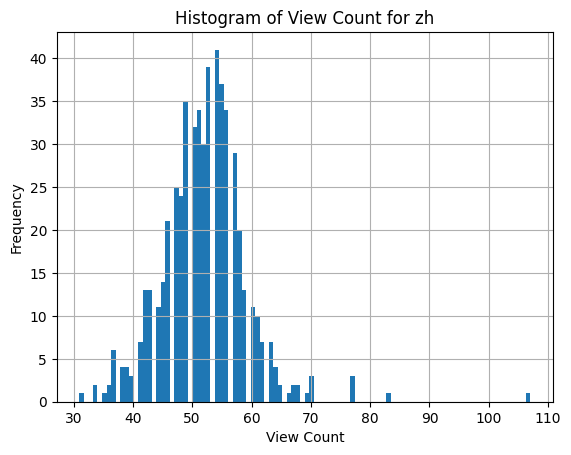

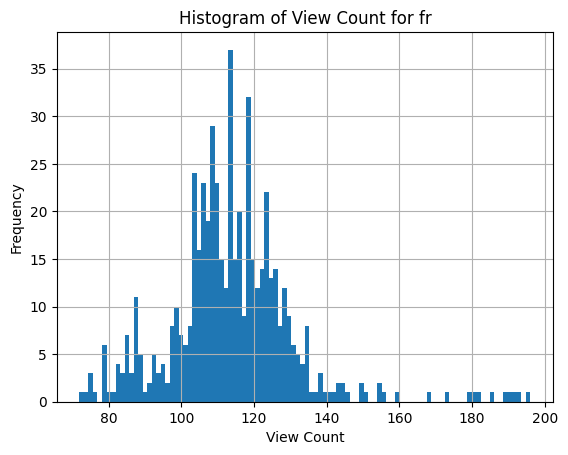

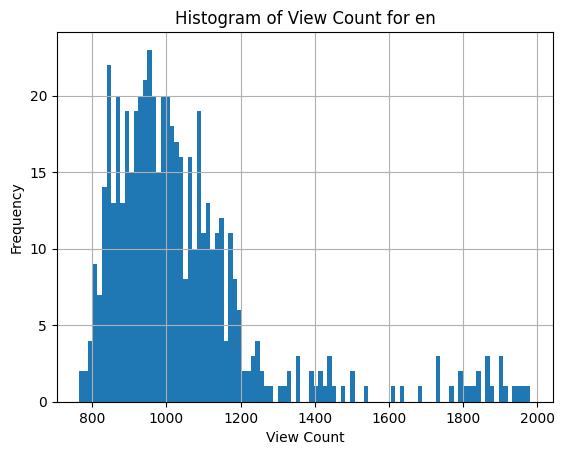

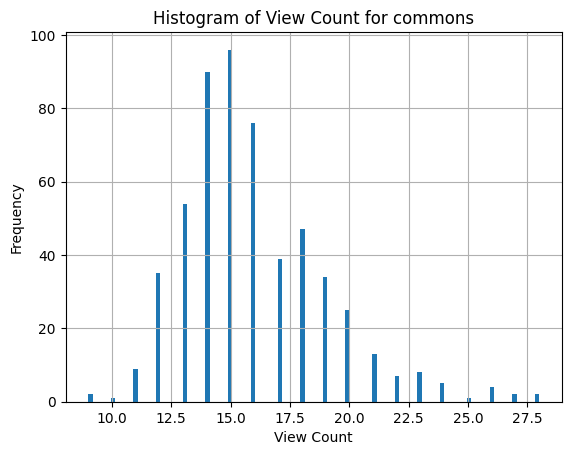

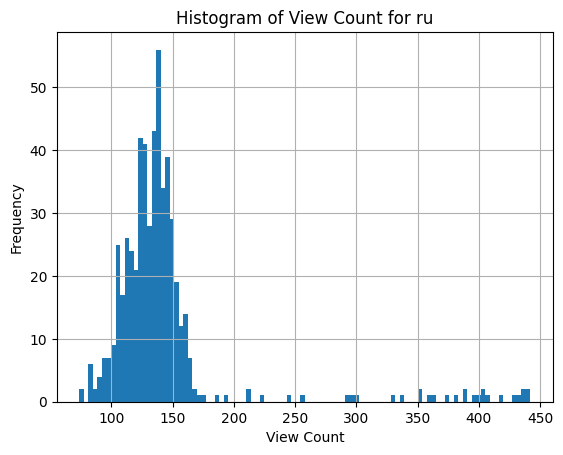

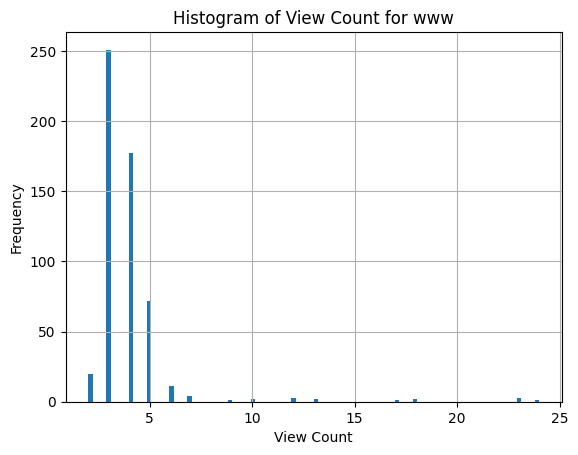

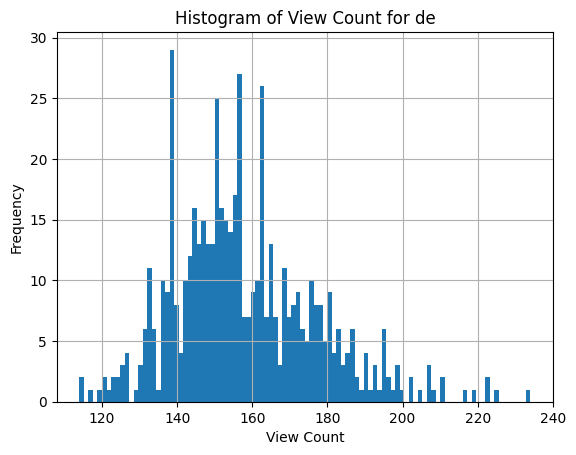

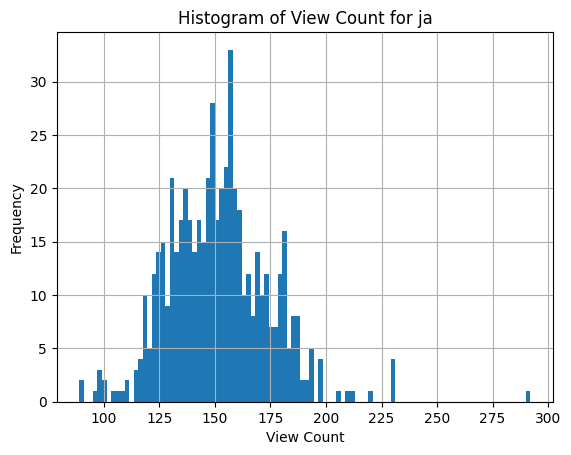

In [ ]:
#plot histogram

for i,data in enumerate(grouped_data):
   data['View Count'].hist(bins=100).plot()
   # label the plot
   plt.xlabel('View Count')
   plt.ylabel('Frequency')
   plt.title('Histogram of View Count for '+lan[i])
   plt.show()
   print("\n")

37.0 67.01999999999998


<Axes: >

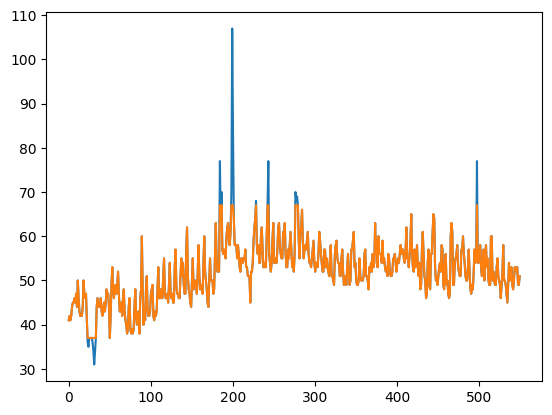

In [ ]:
zh_data_viewcount = grouped_data[0]['View Count']
#Assuming that data between 0.5percentile and 99.5 percentile is valid
th1 = zh_data_viewcount.quantile(0.02)
th2 = zh_data_viewcount.quantile(0.98)
print(th1,th2)
#Clipping extreme values
zh_data_viewcount.plot()
zh_data_viewcount.clip(lower = zh_data_viewcount.quantile(0.02),upper = zh_data_viewcount.quantile(0.98)).plot()

In [ ]:
def remove_anomalies(df):
  data_viewcount = df['View Count']
  # Assuming that data between 0.5percentile and 99.5 percentile is valid
  th1 = data_viewcount.quantile(0.03)
  th2 = data_viewcount.quantile(0.97)
  print(th1,th2)

  # ploting both old and new plots
  df['View Count'].plot()
  df['View Count'].clip(lower = th1,upper = th2).plot()
  # adding header and labels
  plt.xlabel('Date')
  plt.ylabel('View Count')
  plt.title('View Count for '+df['Language'].unique()[0])
  plt.show()

  # Clipping extreme values
  df['View Count'] = data_viewcount.clip(lower = th1,upper = th2)
  return df



39.0 64.0


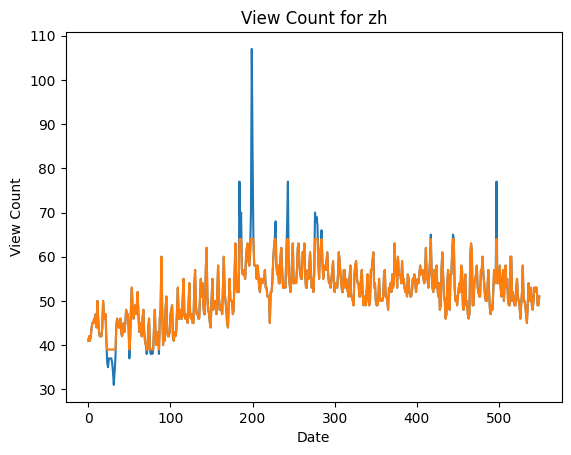

82.47 150.0


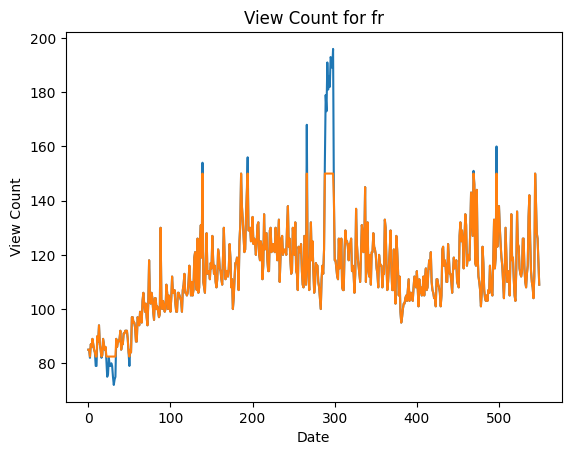

813.41 1800.8899999999996


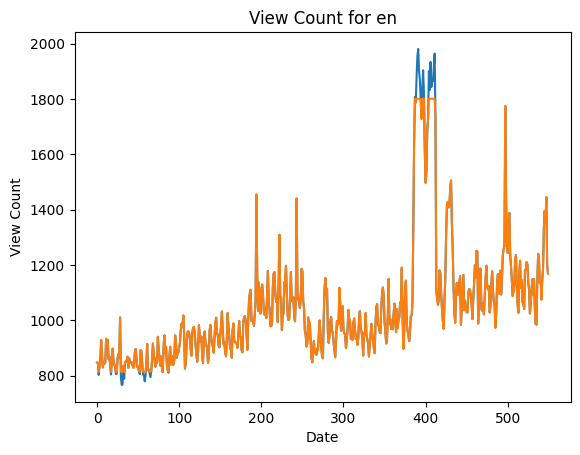

12.0 23.0


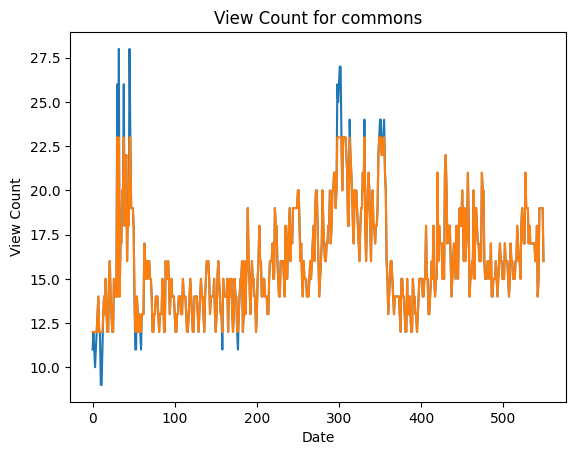

94.47 361.5899999999999


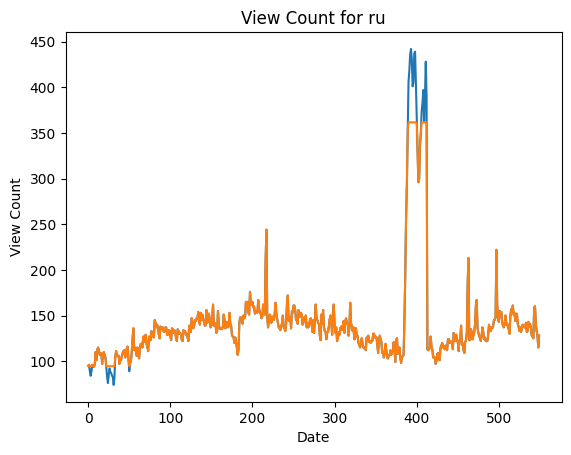

2.0 7.0


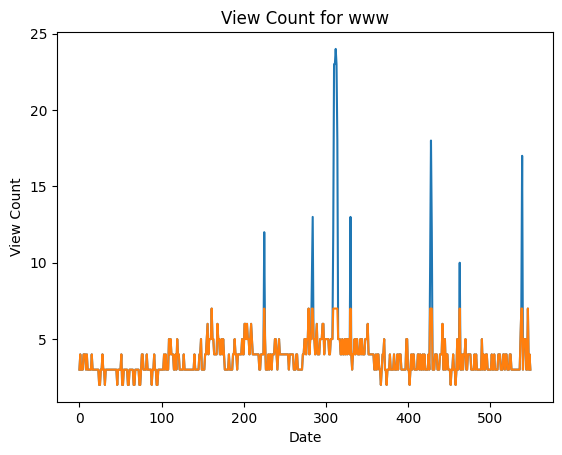

126.0 198.52999999999997


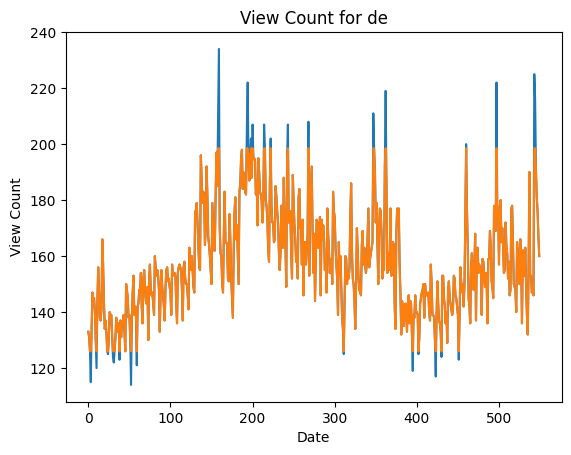

116.0 193.0


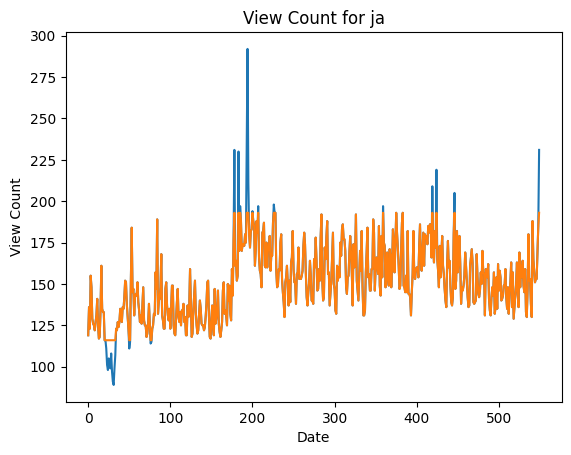

In [ ]:
# remove anomalies for grouped_data
for i,data in enumerate(grouped_data):
  remove_anomalies(data)

# StatsModels Decomposition

In [ ]:
!pip install statsmodels

In [ ]:
#set date column as index
for dgroup in grouped_data:
  dgroup.set_index('Date',inplace=True)


In [ ]:
model = sm.tsa.seasonal_decompose(grouped_data[0]['View Count'], model='additive')

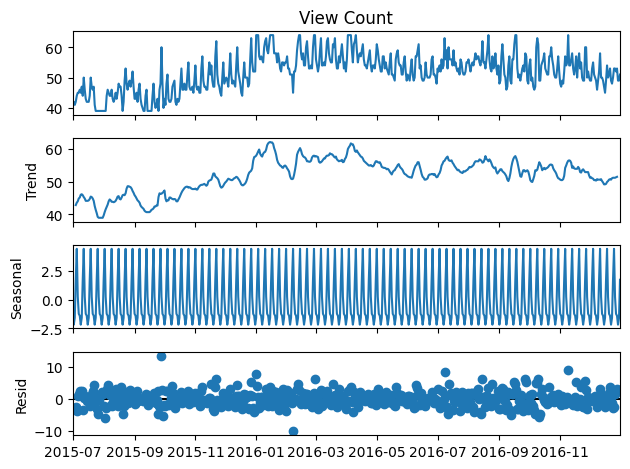

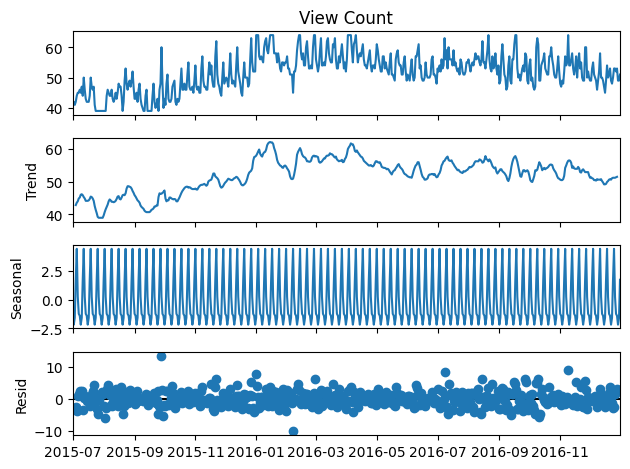

In [ ]:
model.plot()

# **De-Trending and Removing Seasonality**

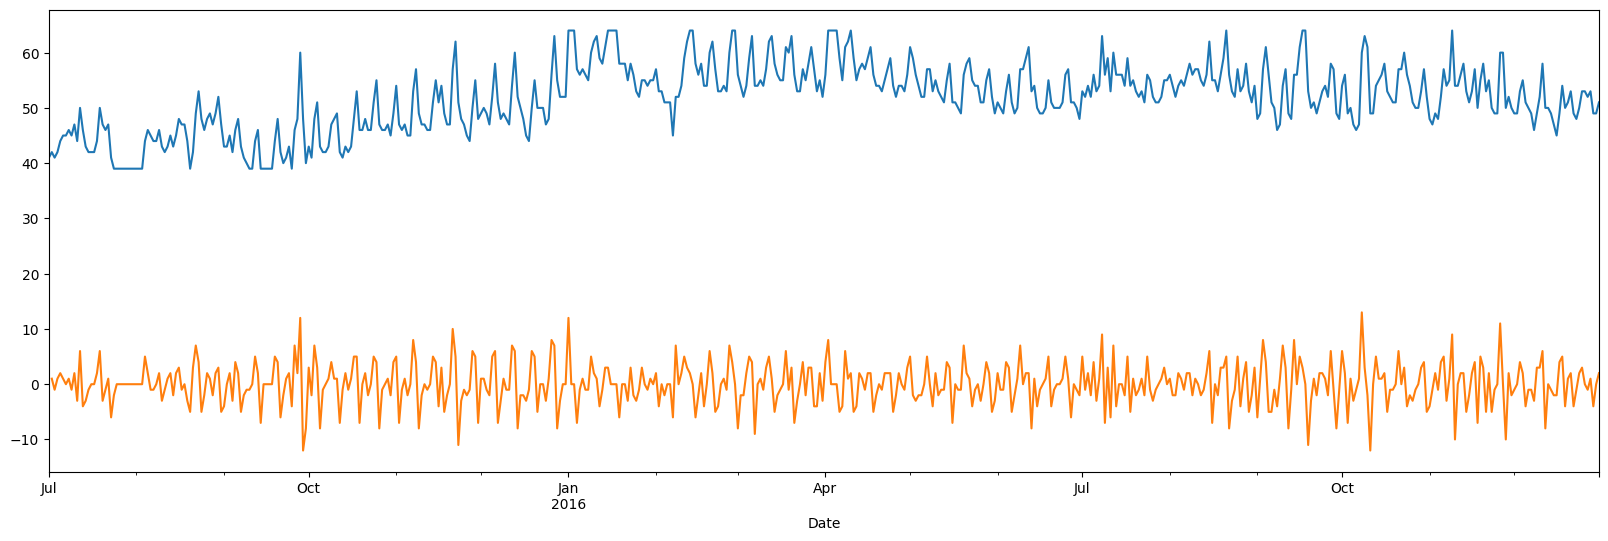

In [ ]:
#Differencing
plt.figure(figsize=(20, 6))
grouped_data[0]['View Count'].plot()
grouped_data[0]['View Count'].diff(1).plot()
detrend = grouped_data[0]['View Count'].diff(1).dropna()

Mean 0.018214936247723135
Variance 14.35368220919256


<Axes: >

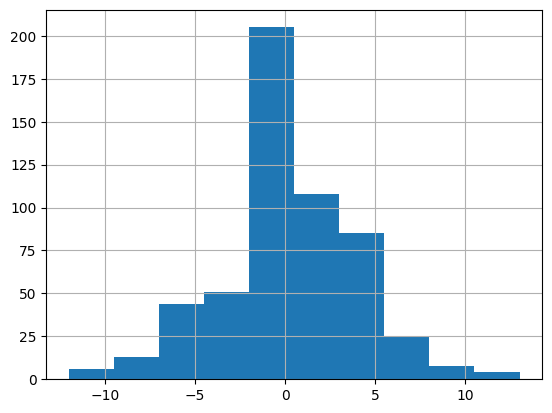

In [ ]:
print("Mean",detrend.mean())
print("Variance",detrend.var())
#plot distribution
detrend.hist()

<Axes: xlabel='Date'>

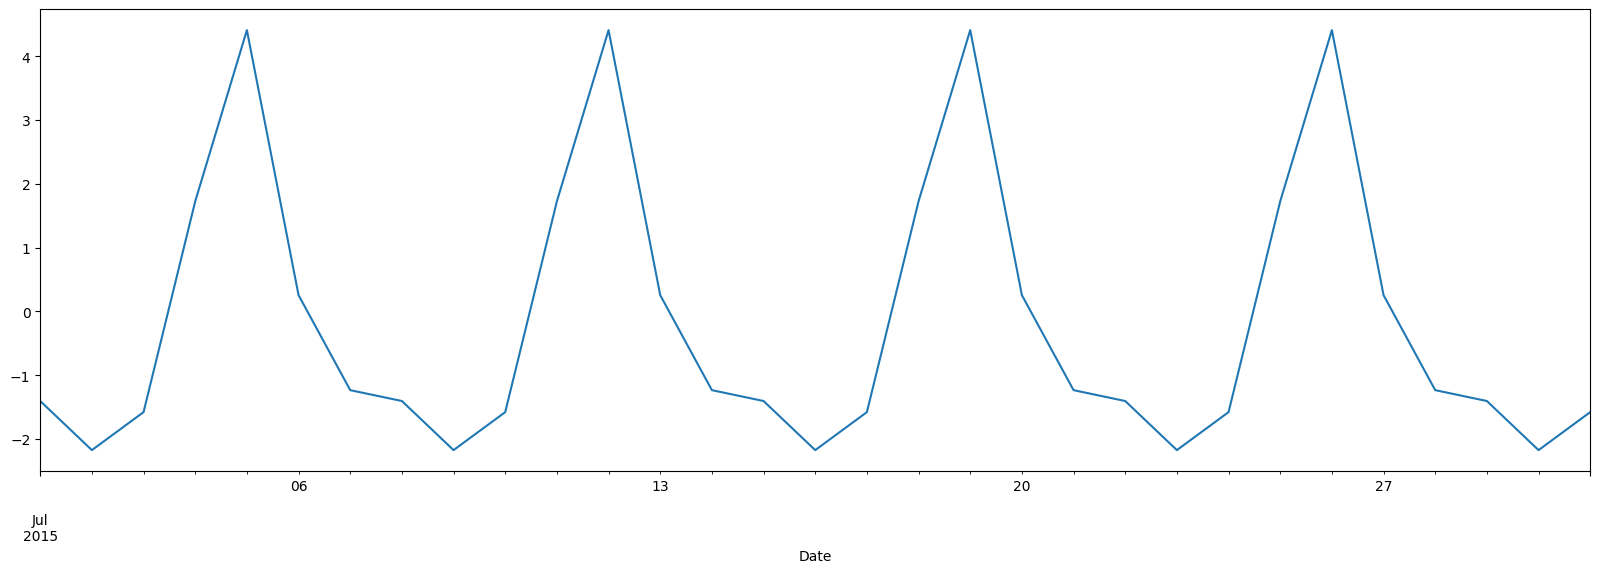

In [ ]:
model.seasonal[:31].plot(figsize=(20, 6))
# There is a seasonal component for every 5th day

<Axes: xlabel='Date'>

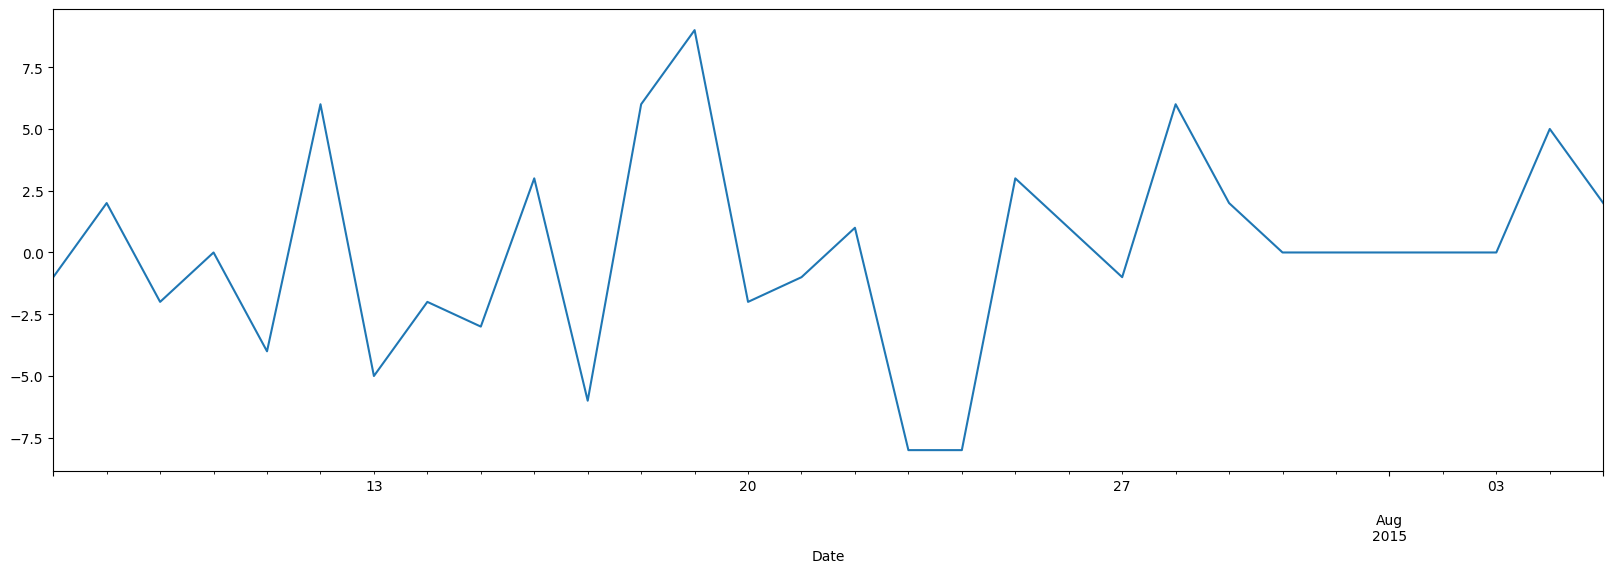

In [ ]:
st_data = detrend.diff(5).dropna()
st_data[:30].plot(figsize=(20, 6))

# **Stationary or Non-Stationary Augmented Dickey Fuller test**

In [ ]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(detrend)[1]

1.3103590055409092e-12

In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')
#by trending itself the data looks stationary
adf_test(detrend)

Sequence is stationary


# **Auto Corelation & Partial AutoCorelation**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **ACF**

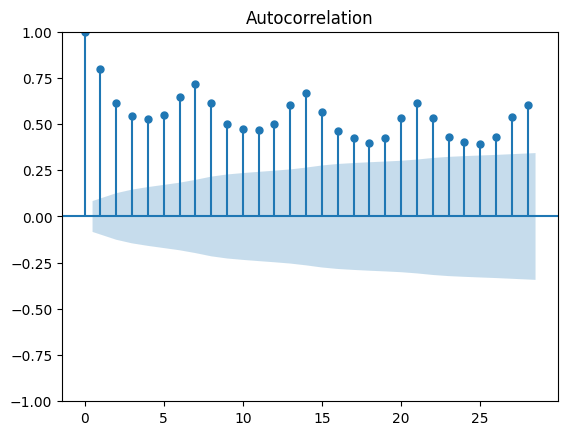

In [ ]:
plot_acf(grouped_data[0]["View Count"]);
# Shows a seasonality of 7

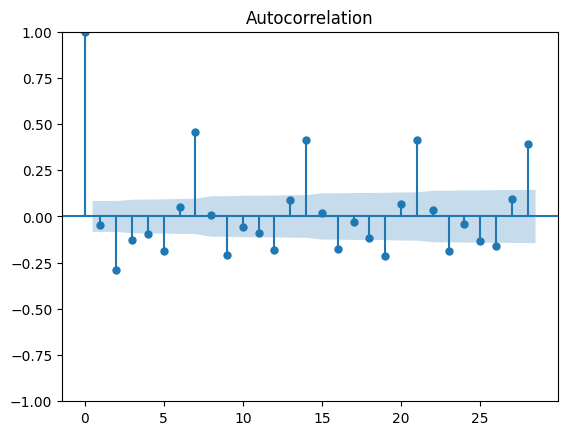

In [ ]:
#Running with detrended data
plot_acf(detrend);
# Shows a seasonality of 7

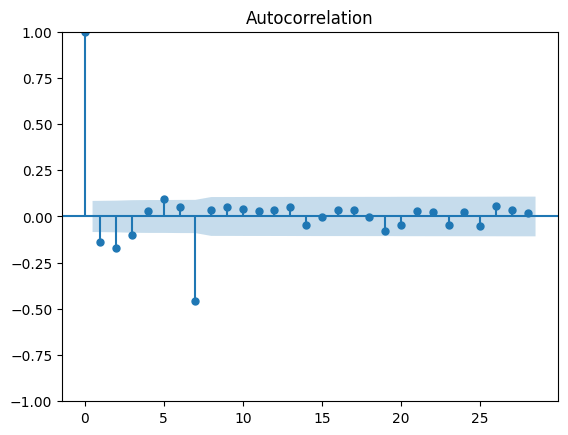

In [ ]:
#Running with detrended data
plot_acf(detrend.diff(7).dropna());
# Highly negative correlation for day 1,2,3 and 7

## **PACF**

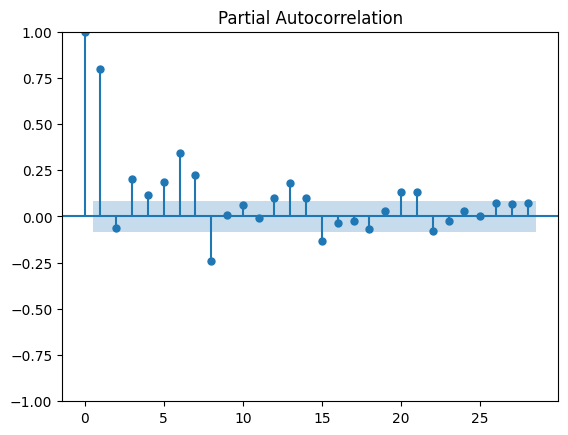

In [ ]:
plot_pacf(grouped_data[0]["View Count"]);

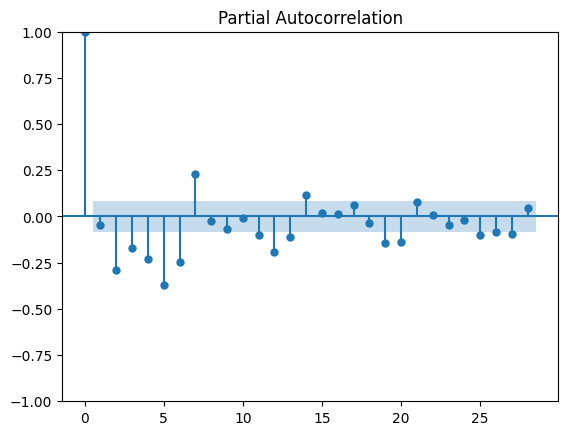

In [ ]:
plot_pacf(detrend);
# Weekdays 1-6 are having -strong negative correlation and 7th day data have highly +ve correlation


# **Train Test Split**

In [ ]:
# we have approximately 18 months data
# Here I am considering 14 months data as training and 2 months data to predict
zh_data=grouped_data[0].copy()
train_x = zh_data.loc[zh_data.index < zh_data.index[-61]].copy()
test_x = zh_data.loc[zh_data.index >= zh_data.index[-61]].copy()


In [ ]:
# Making training data stationary
train_x_st = train_x.copy()
train_x_st['View Count'] = train_x_st['View Count'].diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st['View Count'])

Sequence is stationary


<Axes: xlabel='Date'>

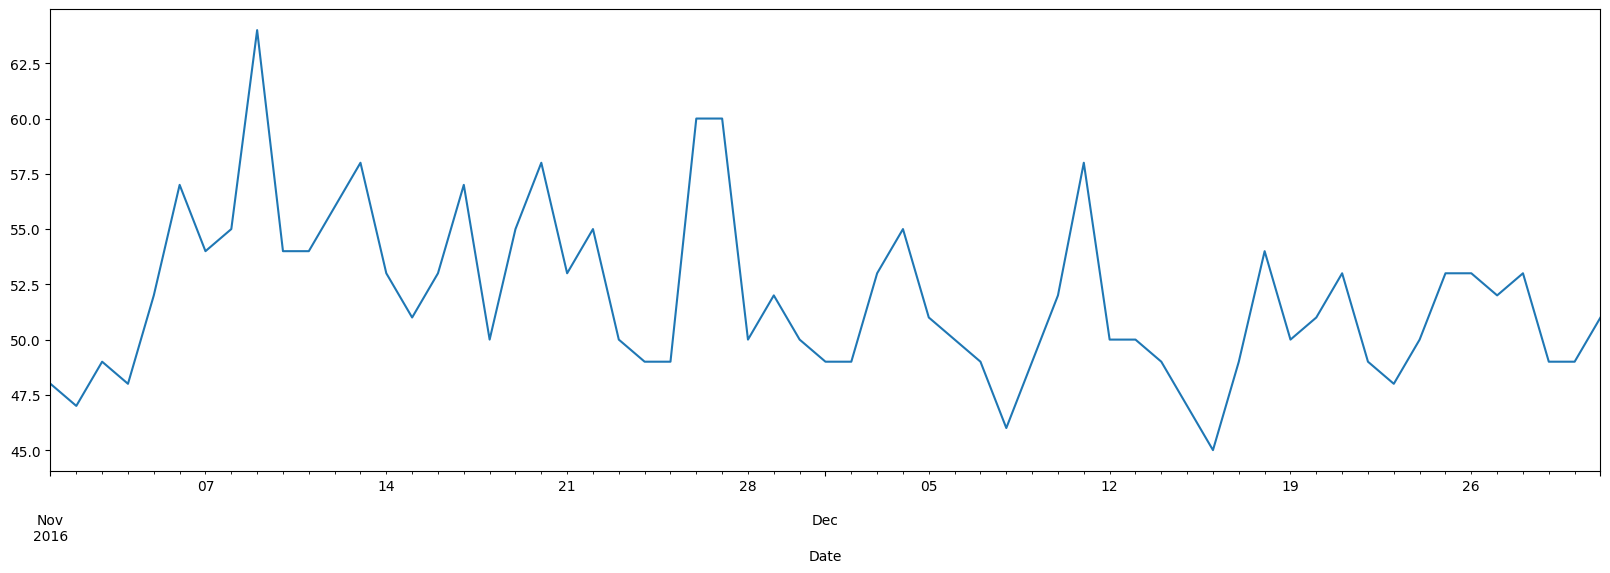

In [ ]:
test_x['View Count'].plot(figsize=(20, 6))

# **ARMA Model**

In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.241
RMSE : 3.217
MAPE: 0.042


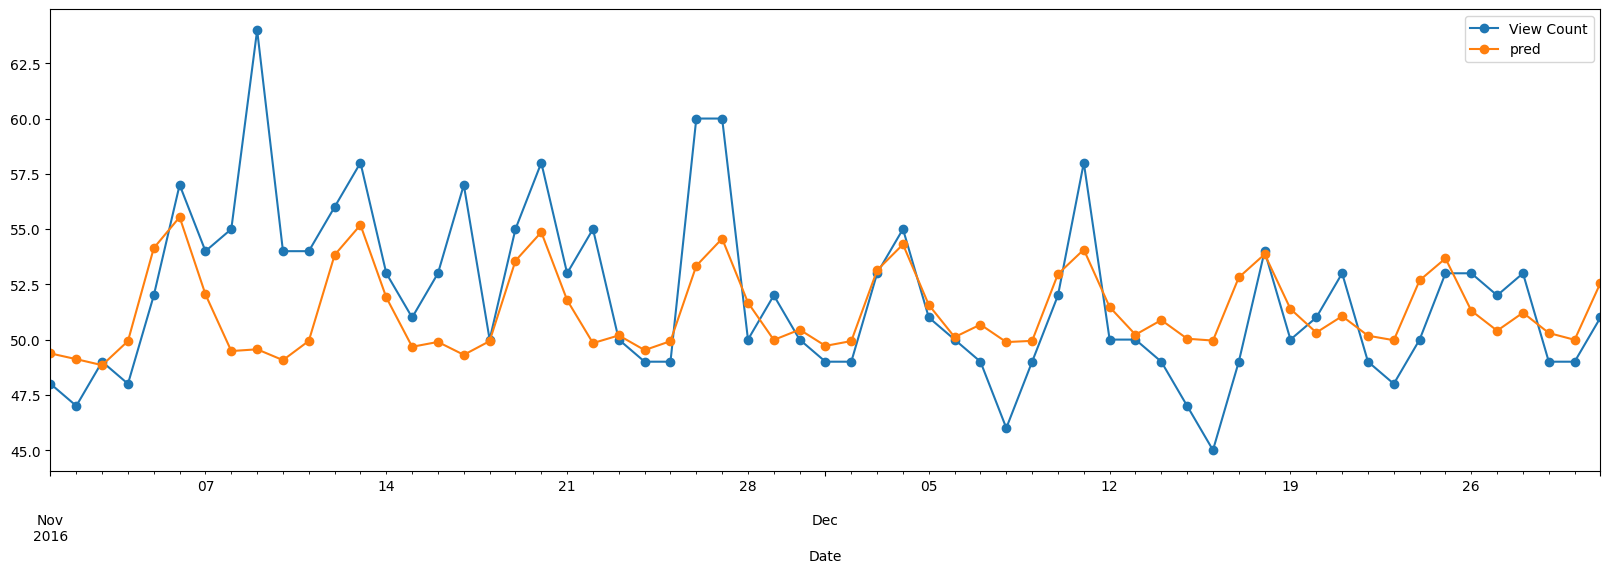

In [ ]:
model = SARIMAX(train_x_st['View Count'], order=(5, 0, 5))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=61)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x['View Count'][-1]

# Plotting
test_x.plot(style='-o',figsize=(20, 6))
performance(test_x['View Count'], test_x['pred'])

# **ARIMA Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.238
RMSE : 3.226
MAPE: 0.042


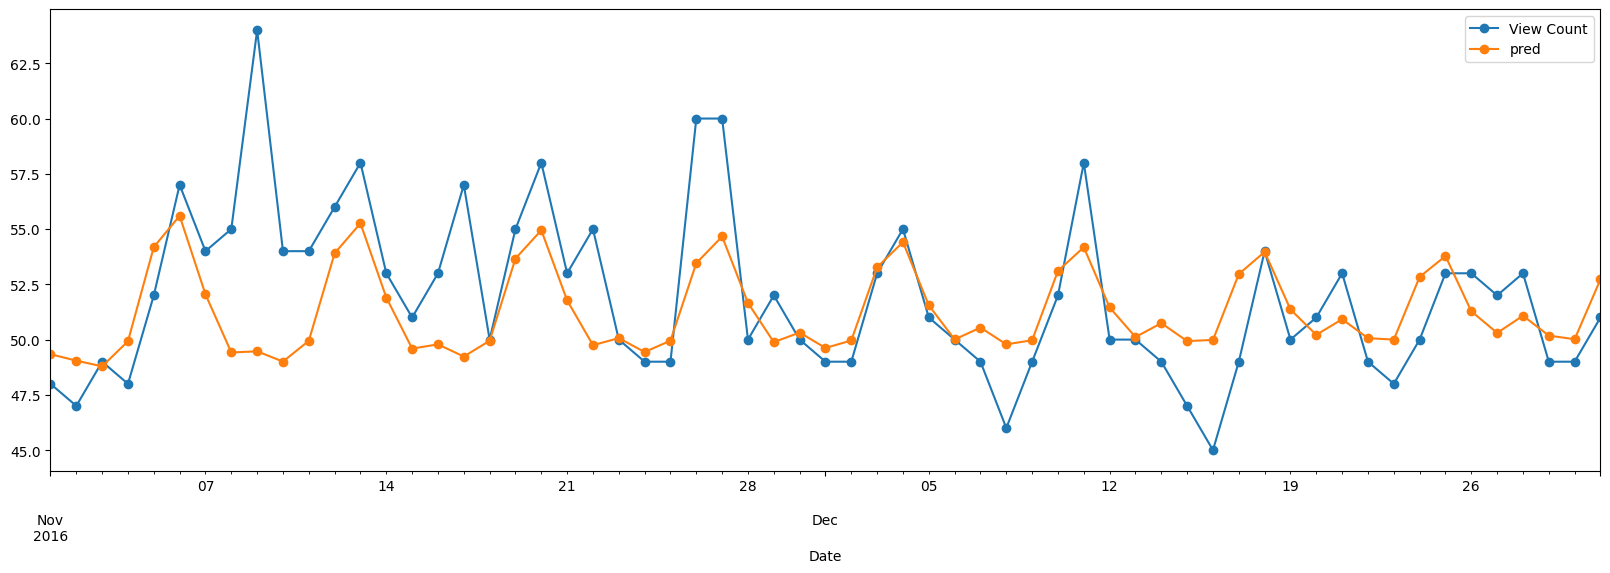

In [ ]:
model = SARIMAX(train_x['View Count'], order=(5, 1, 5)) # p=5 ,q=5, d=1
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=61)
# Plotting
test_x.plot(style='-o',figsize=(20, 6))
performance(test_x['View Count'], test_x['pred'])

# **SARIMA model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.541
RMSE : 3.287
MAPE: 0.049


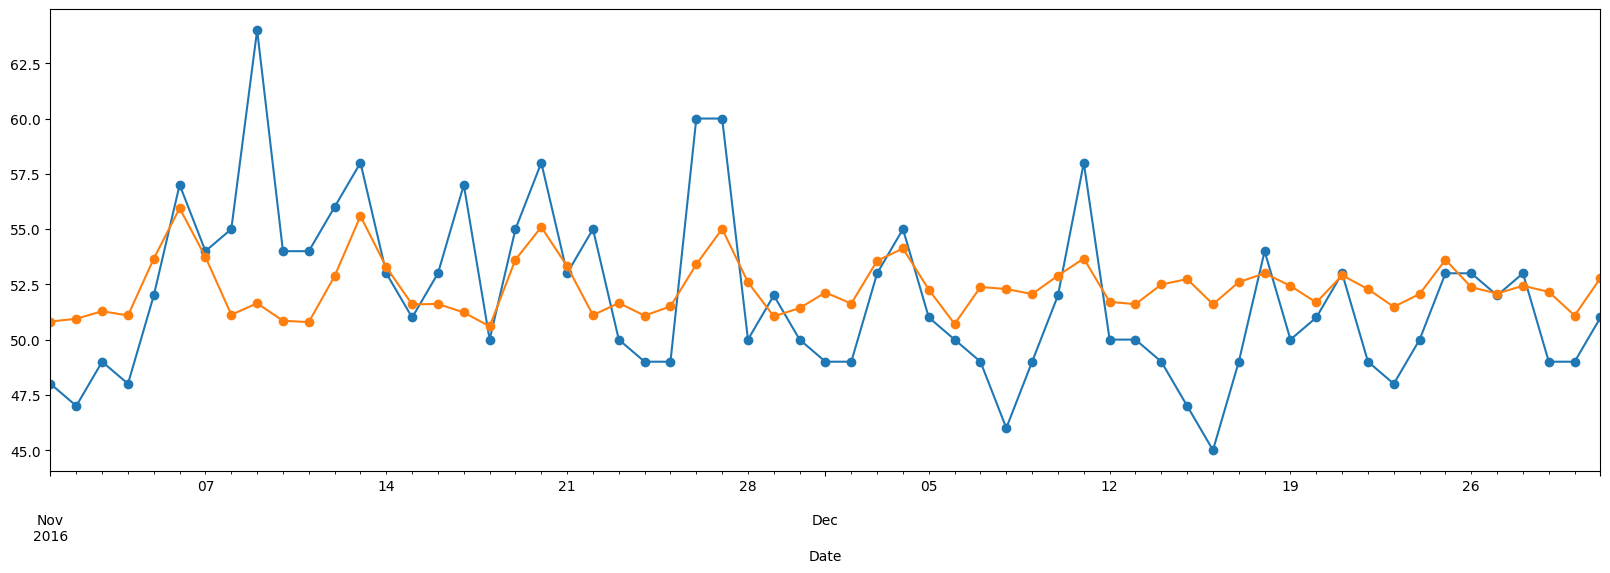

In [ ]:
model = SARIMAX(train_x['View Count'], order=(5,1,5),seasonal_order=(1,1,1,6)) #p=5,q=5,d=1, P=1,D=1,Q=1,S=6
#S=7, gives higher error
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=61)
# Plotting
test_x['View Count'].plot(style='-o',figsize=(20, 6))
test_x['pred'].plot(style='-o',figsize=(20, 6))
performance(test_x['View Count'], test_x['pred'])

# **Exogenous Data**

In [ ]:
def get_Exog():
  df_x = pd.read_csv("/content/drive/MyDrive/Data/AdEase/Exog_Campaign_eng")
  return df_x

df_x=get_Exog()

In [ ]:
df_x["Exog"].isna().sum()

0

In [ ]:
zh_data['Exog'] = df_x["Exog"].values
zh_data['Exog']

Date
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
2015-07-05    0
             ..
2016-12-27    1
2016-12-28    1
2016-12-29    1
2016-12-30    0
2016-12-31    0
Name: Exog, Length: 550, dtype: int64

In [ ]:
zh_data['Exog'].isna().sum()

0

In [ ]:
train_x = zh_data.loc[zh_data.index < zh_data.index[-61]].copy()
test_x = zh_data.loc[zh_data.index >= zh_data.index[-61]].copy()

In [ ]:
zh_data["Exog"]

Date
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
2015-07-05    0
             ..
2016-12-27    1
2016-12-28    1
2016-12-29    1
2016-12-30    0
2016-12-31    0
Name: Exog, Length: 550, dtype: int64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.523
RMSE : 3.239
MAPE: 0.049


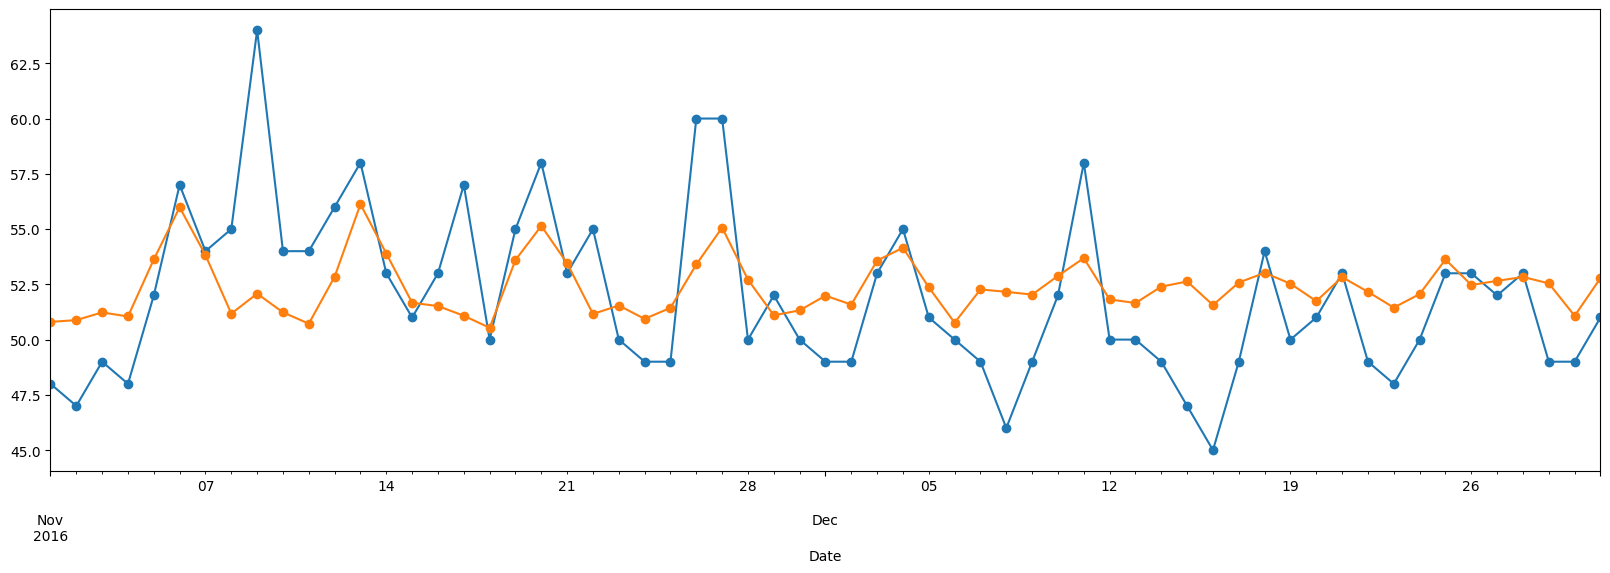

In [ ]:
model = SARIMAX(train_x['View Count'],order=(5,1,5),seasonal_order=(1,1,1,6),exog = train_x["Exog"])
results = model.fit()
fc = results.forecast(61,exog = test_x['Exog'][:61])
test_x['View Count'][:61].plot(style='-o',figsize=(20, 6))
fc.plot(style='-o',figsize=(20, 6))
performance(test_x['View Count'][:61],fc)

### Not able to find any influence of exogenous variables for language ZH

# **COMBINING ALL THE CODES FOR DIFFERENT LANGUAGES**

In [ ]:
def ARIMA_model(train_x,test_x):
  print("ARIMA Model")
  model = SARIMAX(train_x['View Count'], order=(5, 1, 5)) # p=5 ,q=5, d=1
  model = model.fit(disp=False)
  test_x['pred'] = model.forecast(steps=61)
  # Plotting
  test_x.plot(style='-o',figsize=(20, 6))
  performance(test_x['View Count'], test_x['pred'])

In [ ]:
def SARIMA_model(train_x,test_x):
  print("SARIMA Model")
  model = SARIMAX(train_x['View Count'], order=(5,1,5),seasonal_order=(1,1,1,6)) #p=5,q=5,d=1, P=1,D=1,Q=1,S=6
  #S=7, gives higher error
  model = model.fit(disp=False)
  test_x['pred'] = model.forecast(steps=61)
  # Plotting
  test_x['View Count'].plot(style='-o',figsize=(20, 6))
  test_x['pred'].plot(style='-o',figsize=(20, 6))
  performance(test_x['View Count'], test_x['pred'])

In [ ]:
def SARIMA_EXOG_model(df,exog):
  df['Exog'] = exog["Exog"].values
  train_x = df.loc[df.index < df.index[-61]].copy()
  test_x = df.loc[df.index >= df.index[-61]].copy()
  print("SARIMA Model with exogenous")
  model = SARIMAX(train_x['View Count'],order=(5,1,5),seasonal_order=(1,1,1,6),exog = train_x["Exog"])
  results = model.fit()
  fc = results.forecast(61,exog = test_x['Exog'][:61])
  test_x['View Count'][:61].plot(style='-o',figsize=(20, 6))
  fc.plot(style='-o',figsize=(20, 6))
  performance(test_x['View Count'][:61],fc)

In [ ]:
def decompose_timeSeries(df):
  plt.figure(figsize=(20, 6))
  print("Decomposition of Time Series")
  model_decomposition = sm.tsa.seasonal_decompose(df['View Count'], model='additive')
  model_decomposition.plot()
  plt.show()
  return model_decomposition

In [ ]:
def deTrend(df):
  print("De-Trending and Removing Seasonality")
  #Differencing
  df['View Count'].plot()
  df['View Count'].diff(1).plot()
  detrend = df['View Count'].diff(1).dropna()
  print("Mean",detrend.mean())
  print("Variance",detrend.var())
  #plot distribution
  detrend.hist()
  return detrend

In [ ]:
def checkSeasonality(decompose_model,detrend):
  print("Plotting last 31 days data \n")
  decompose_model.seasonal[:31].plot()
  # There is a seasonal component for every 5th day
  st_data = detrend.diff(5).dropna()
  st_data[:30].plot()
  return st_data

In [ ]:
def get_train_test(df,test_count):
  print("Train Test Split")
  train_x = df.loc[df.index < df.index[-test_count]].copy()
  test_x = df.loc[df.index >= df.index[-test_count]].copy()
  return train_x,test_x

In [ ]:
# ['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es']

# **LANGUAUGE = ZH**

In [ ]:
zh_data=grouped_data[0].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

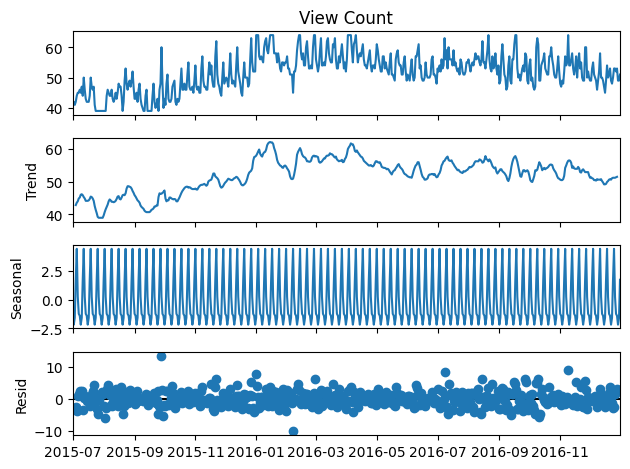

In [ ]:
decomp_model=decompose_timeSeries(zh_data)

De-Trending and Removing Seasonality
Mean 0.018214936247723135
Variance 14.35368220919256


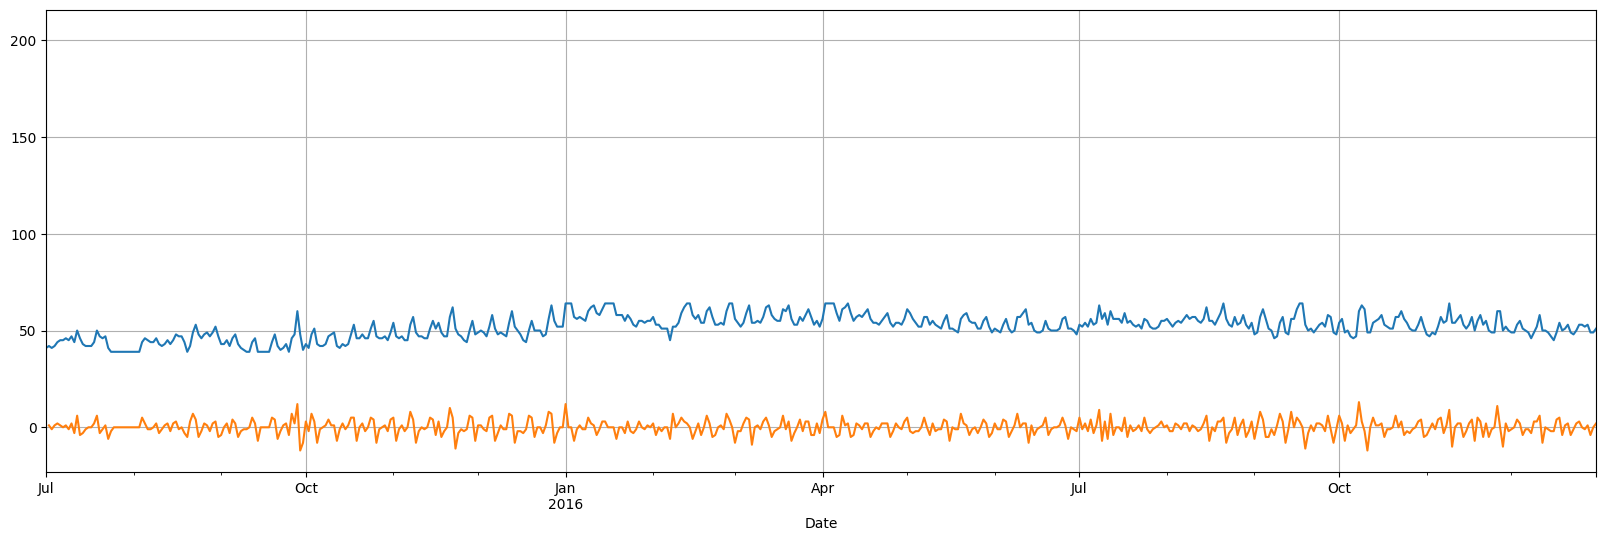

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(zh_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


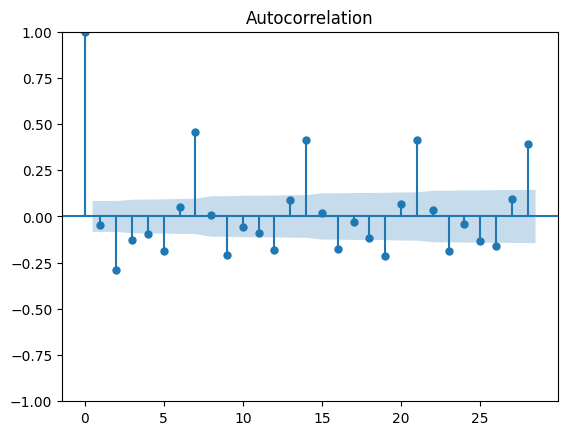

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


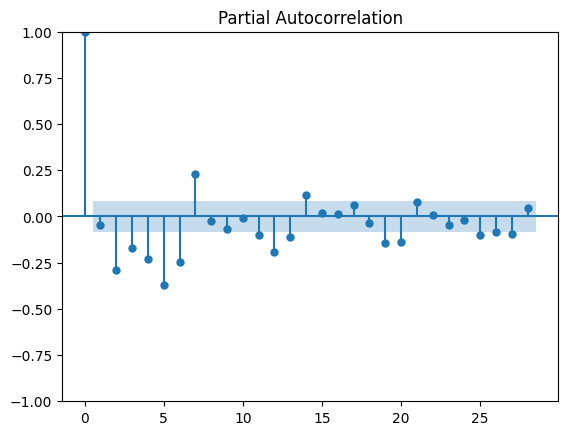

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(zh_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.238
RMSE : 3.226
MAPE: 0.042


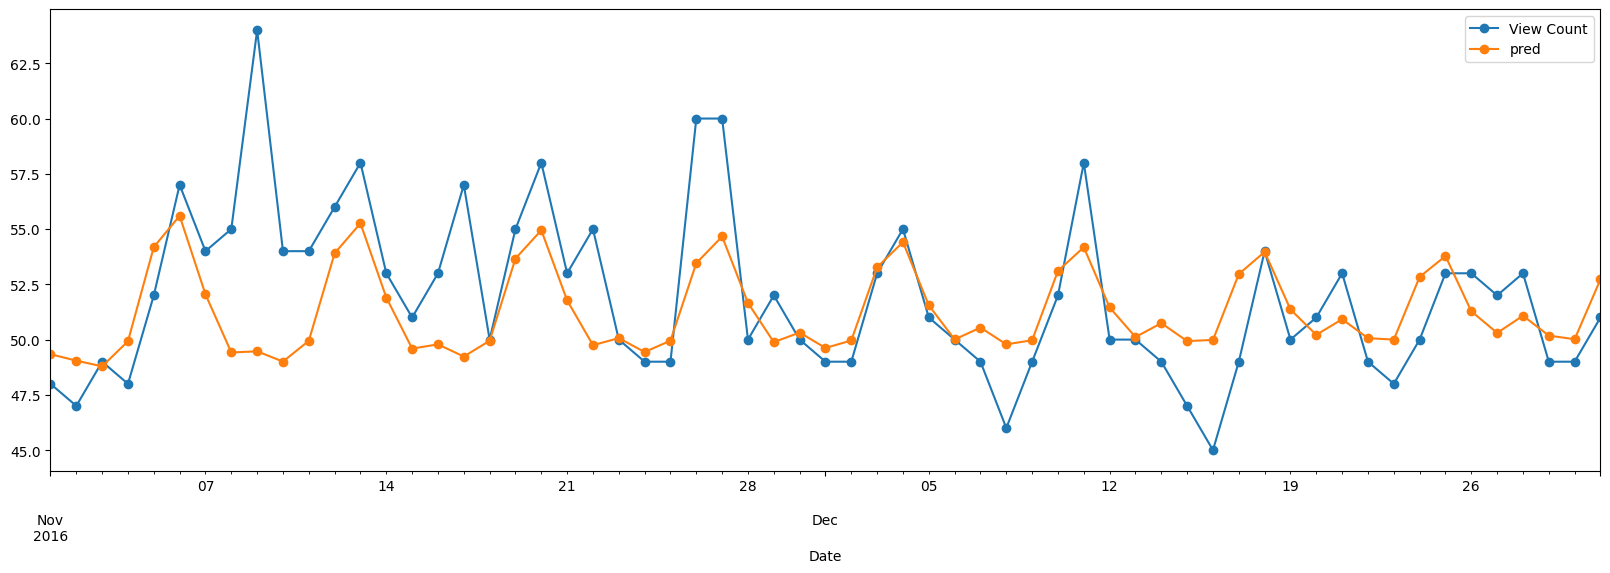

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.541
RMSE : 3.287
MAPE: 0.049


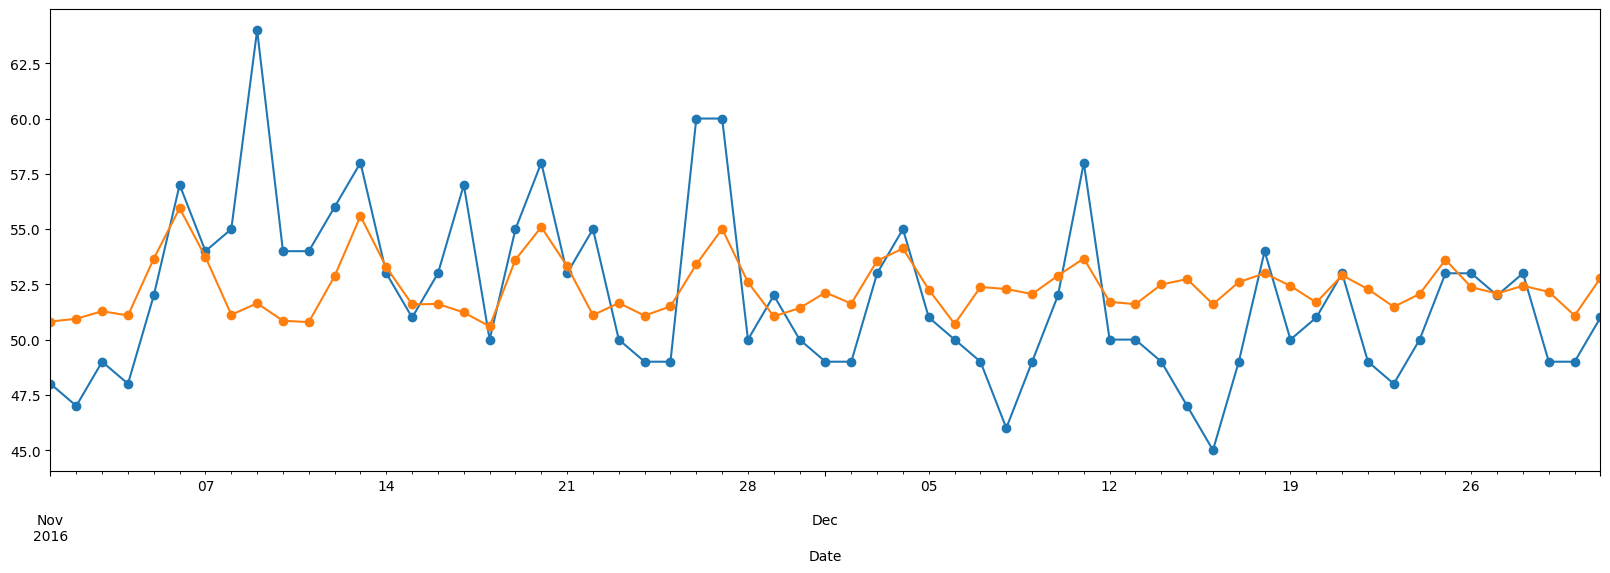

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 2.523
RMSE : 3.239
MAPE: 0.049


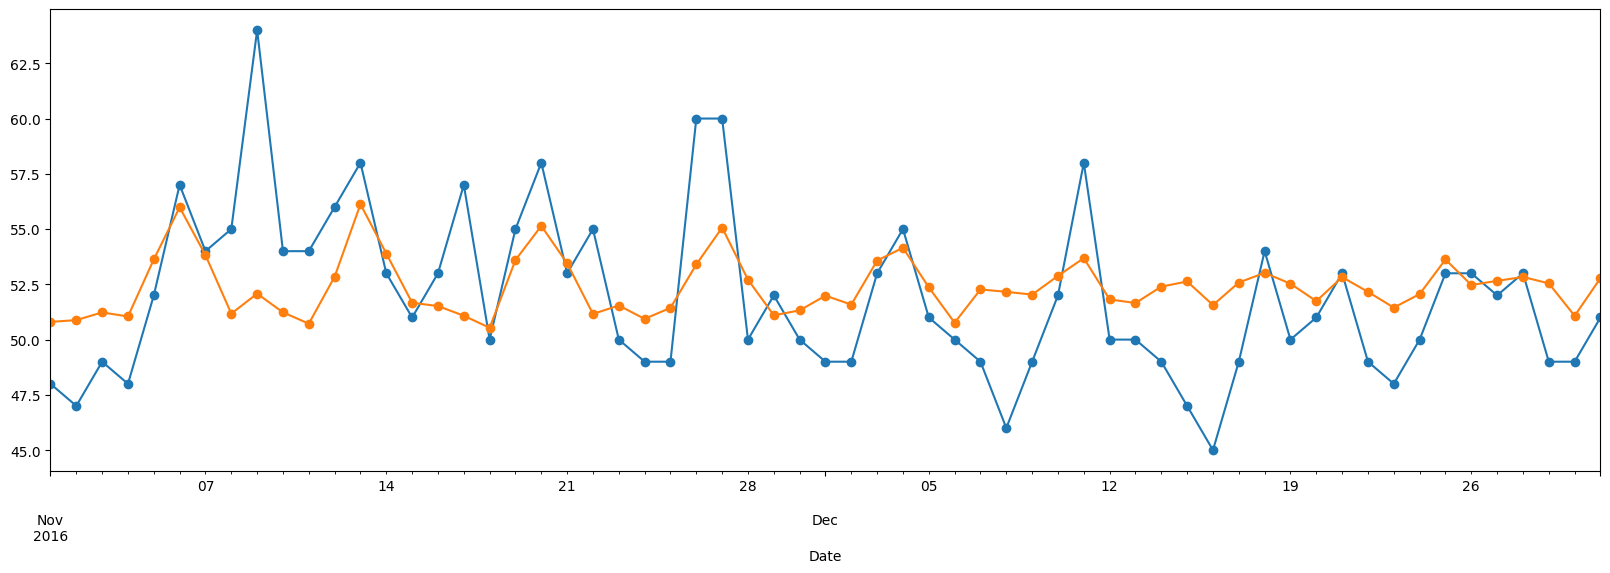

In [ ]:
SARIMA_EXOG_model(zh_data,df_x)

# **LANGUAUGE = FR**

In [ ]:
fr_data=grouped_data[1].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

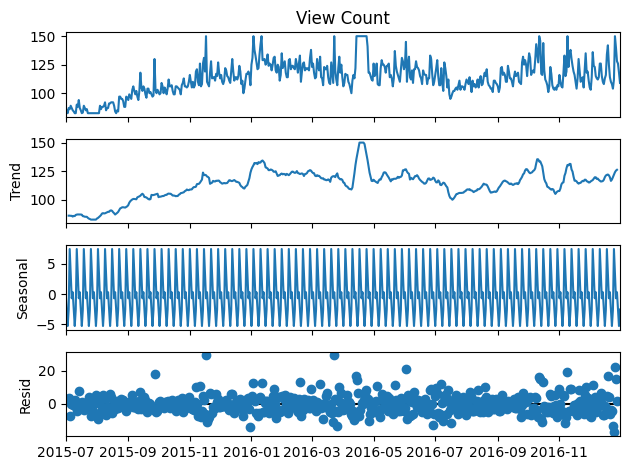

In [ ]:
decomp_model=decompose_timeSeries(fr_data)

De-Trending and Removing Seasonality
Mean 0.04371584699453552
Variance 81.84569310159148


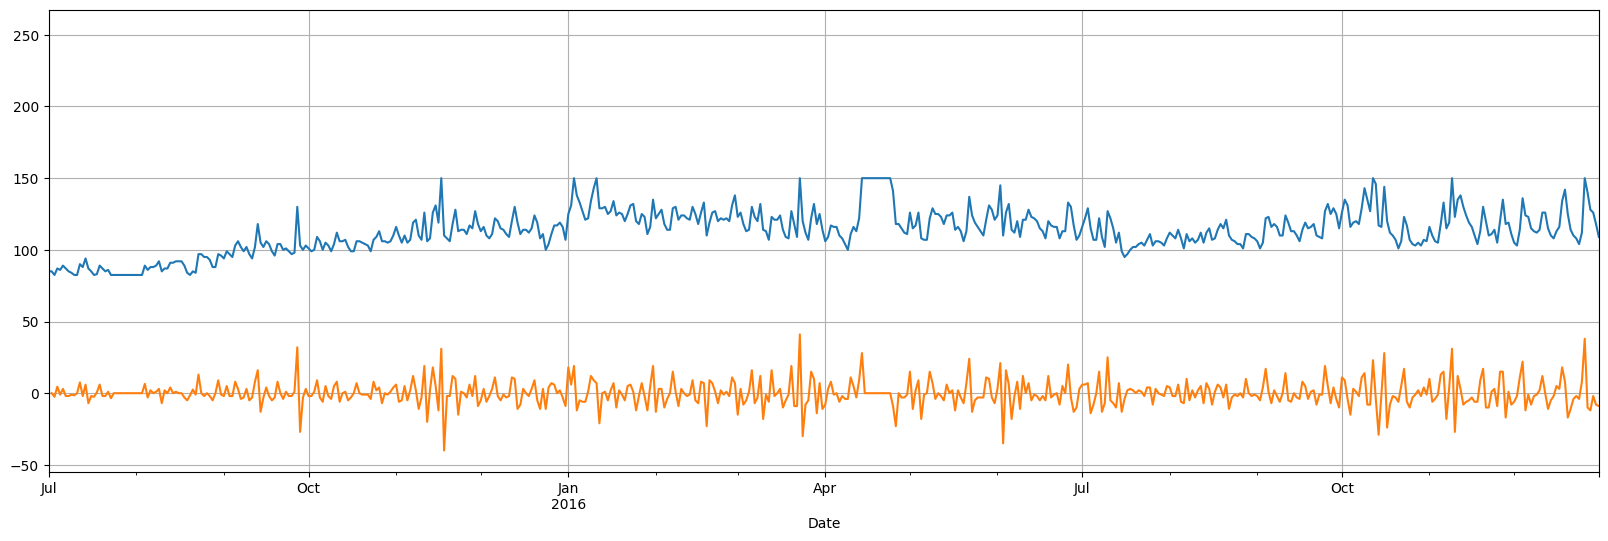

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(fr_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


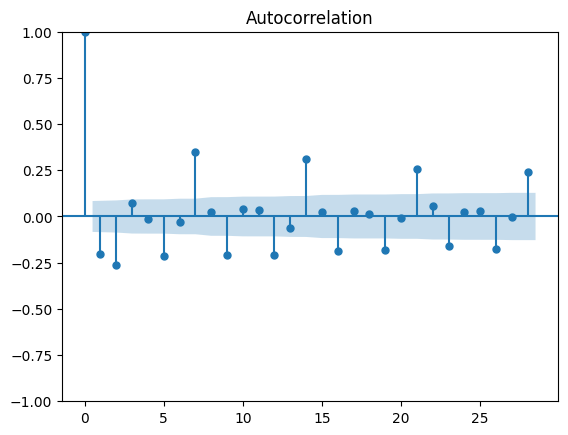

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


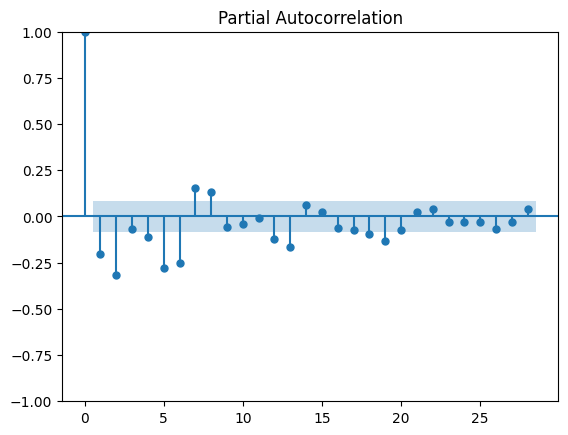

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(fr_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 14.692
RMSE : 18.047
MAPE: 0.117


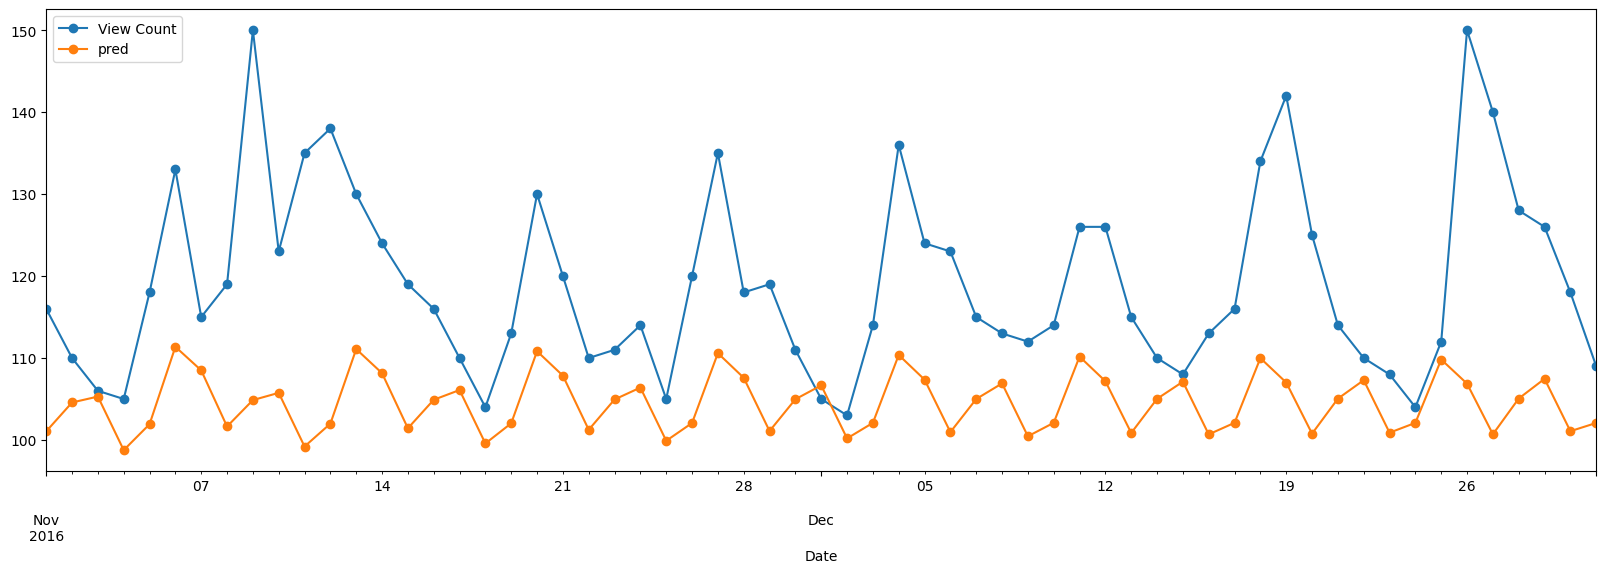

In [ ]:
ARIMA_model(train_x,test_x)

SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9.388
RMSE : 12.556
MAPE: 0.075


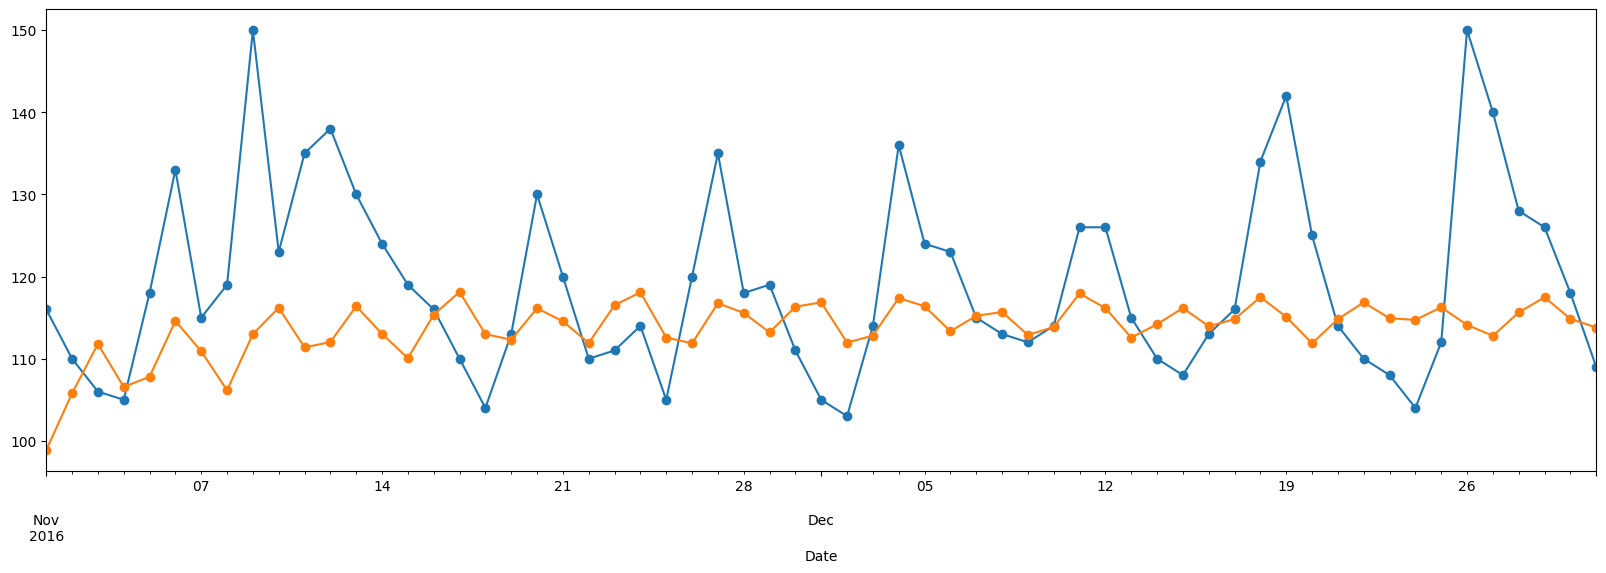

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9.541
RMSE : 12.698
MAPE: 0.076


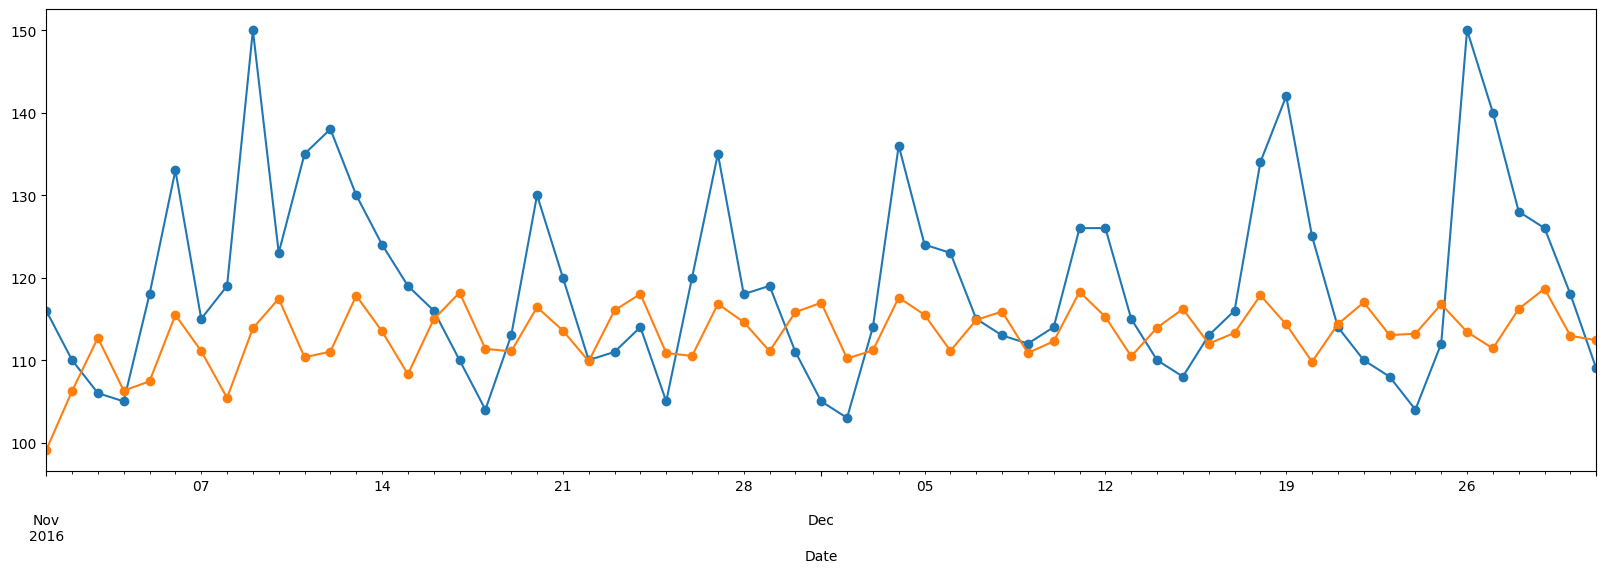

In [ ]:
SARIMA_EXOG_model(fr_data,df_x)

# **LANGUAUGE = EN**

In [ ]:
en_data=grouped_data[2].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

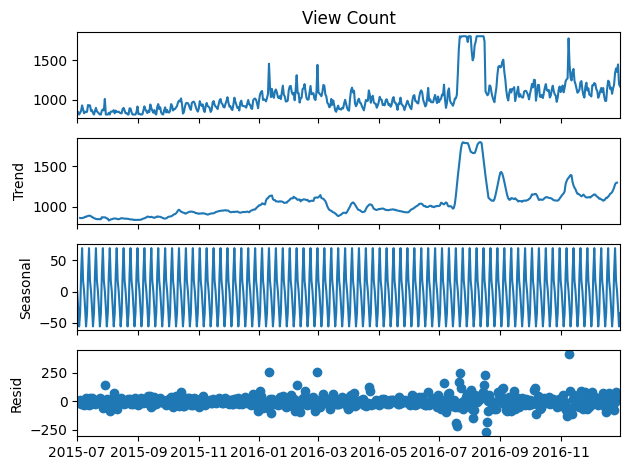

In [ ]:
decomp_model=decompose_timeSeries(en_data)

De-Trending and Removing Seasonality
Mean 0.5865209471766849
Variance 6495.274341341257


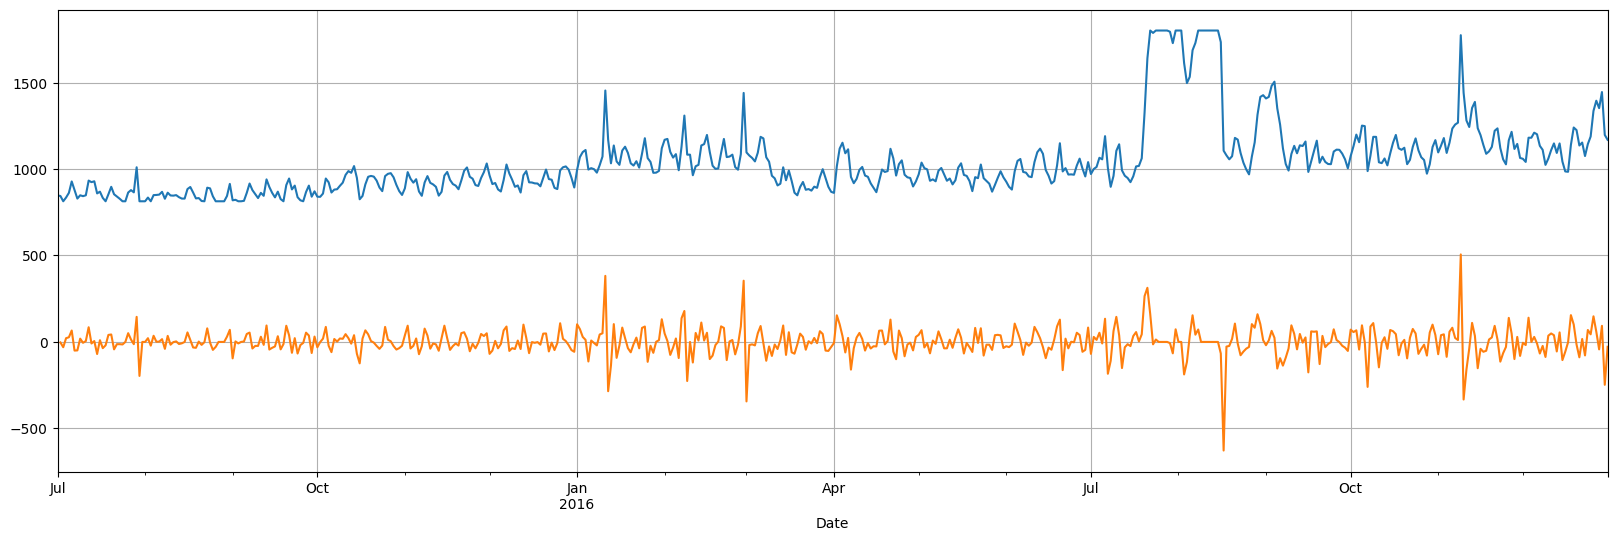

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(en_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


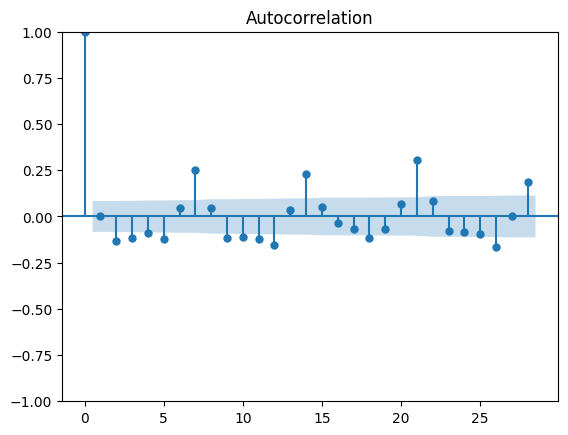

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


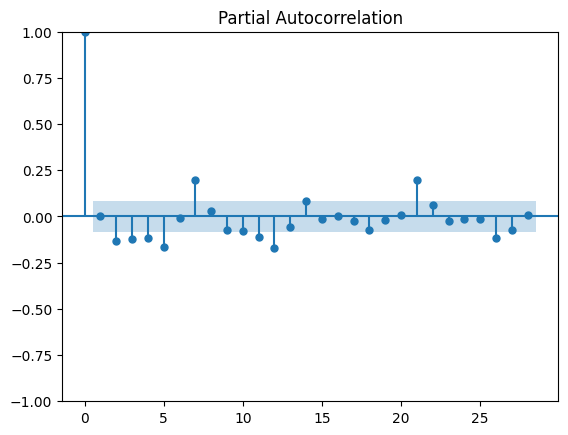

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(en_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 88.243
RMSE : 126.907
MAPE: 0.072


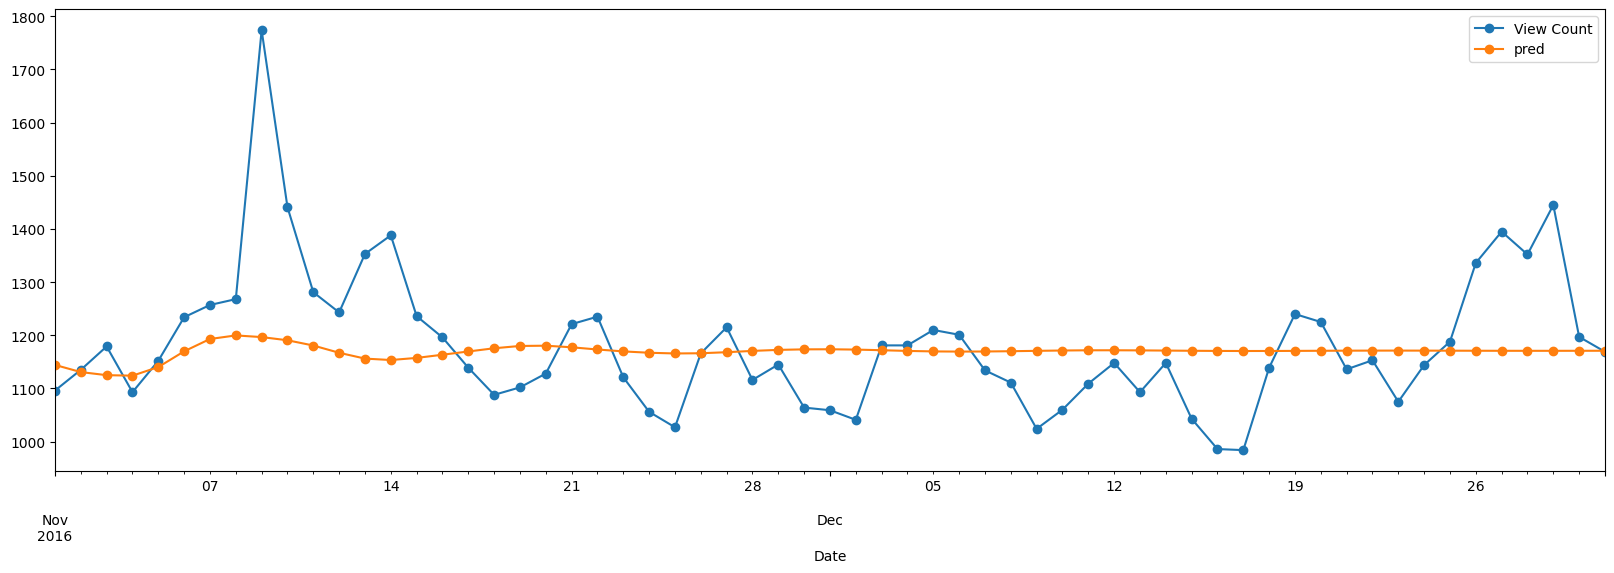

In [ ]:
ARIMA_model(train_x,test_x)

SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 103.555
RMSE : 152.036
MAPE: 0.081


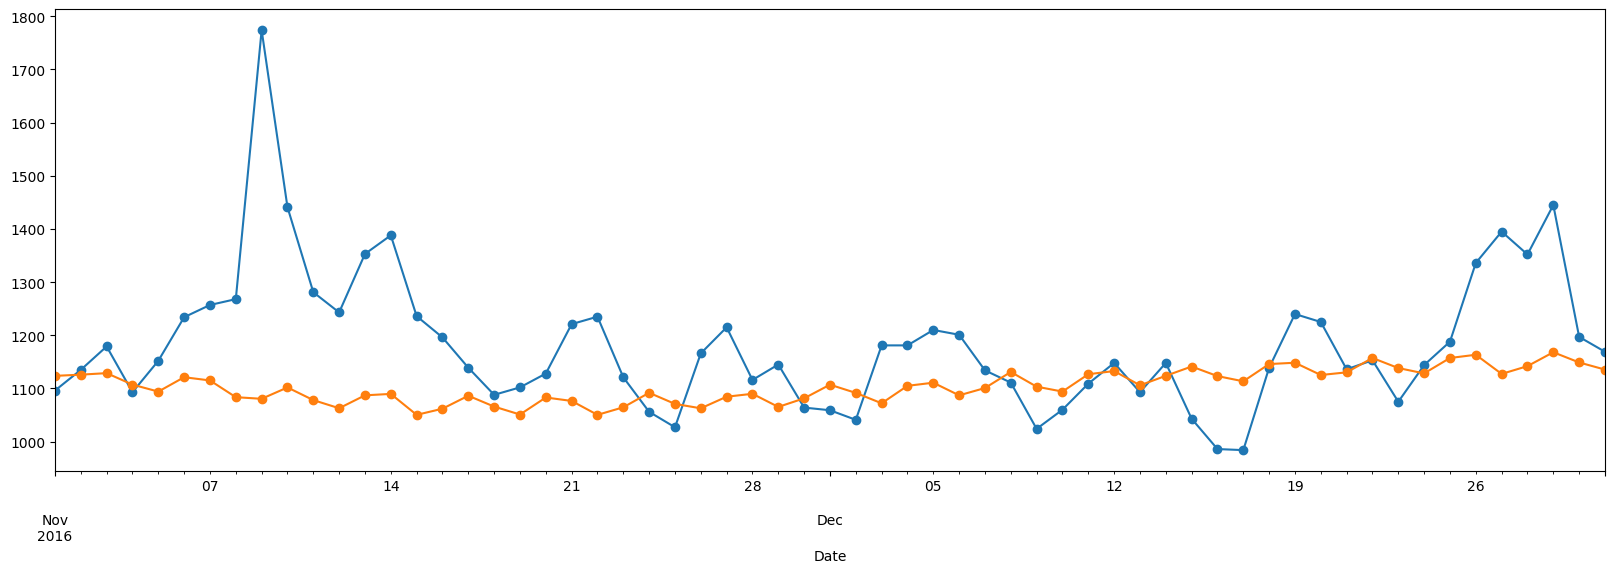

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 75.833
RMSE : 99.416
MAPE: 0.066


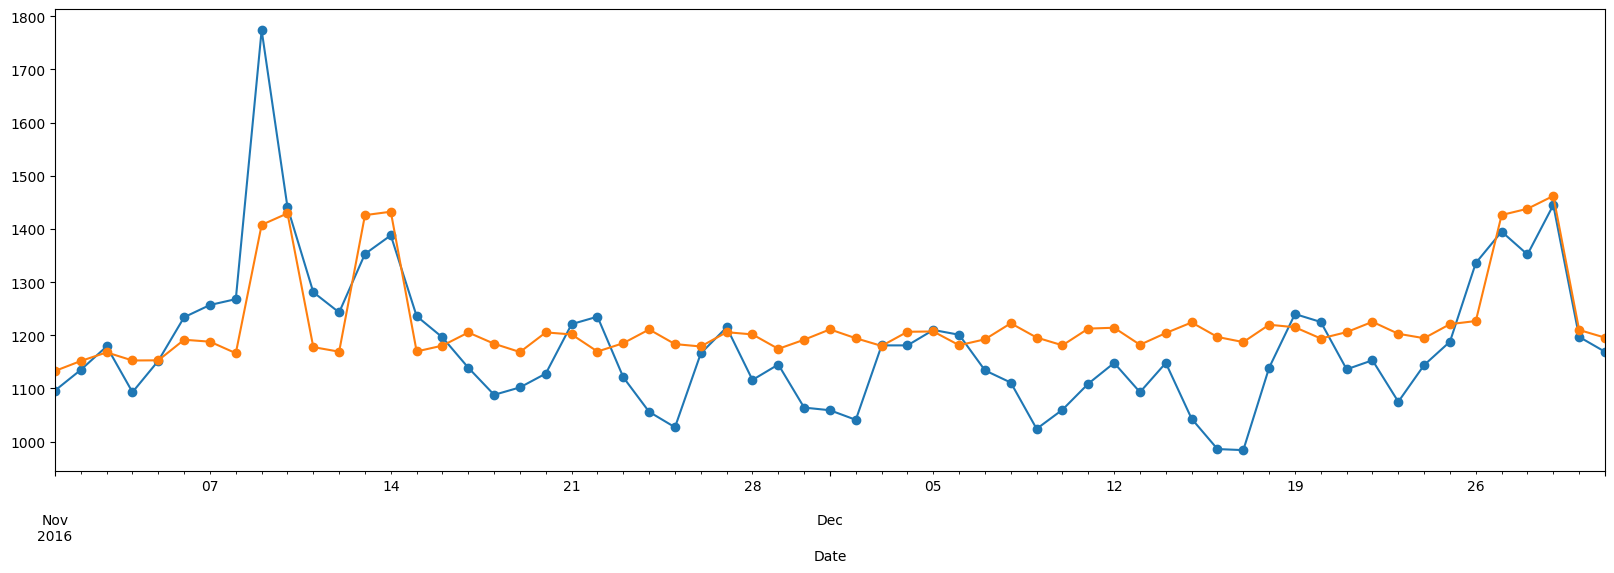

In [ ]:
SARIMA_EXOG_model(en_data,df_x)

# **LANGUAUGE = commons**

In [ ]:
commons_data=grouped_data[3].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

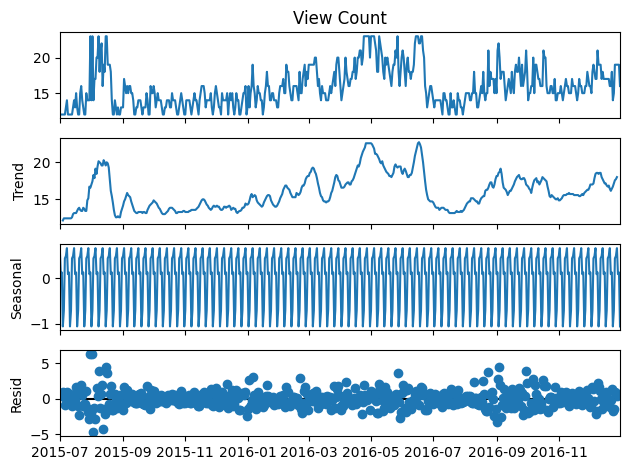

In [ ]:
decomp_model=decompose_timeSeries(commons_data)

De-Trending and Removing Seasonality
Mean 0.007285974499089253
Variance 3.2371730950766495


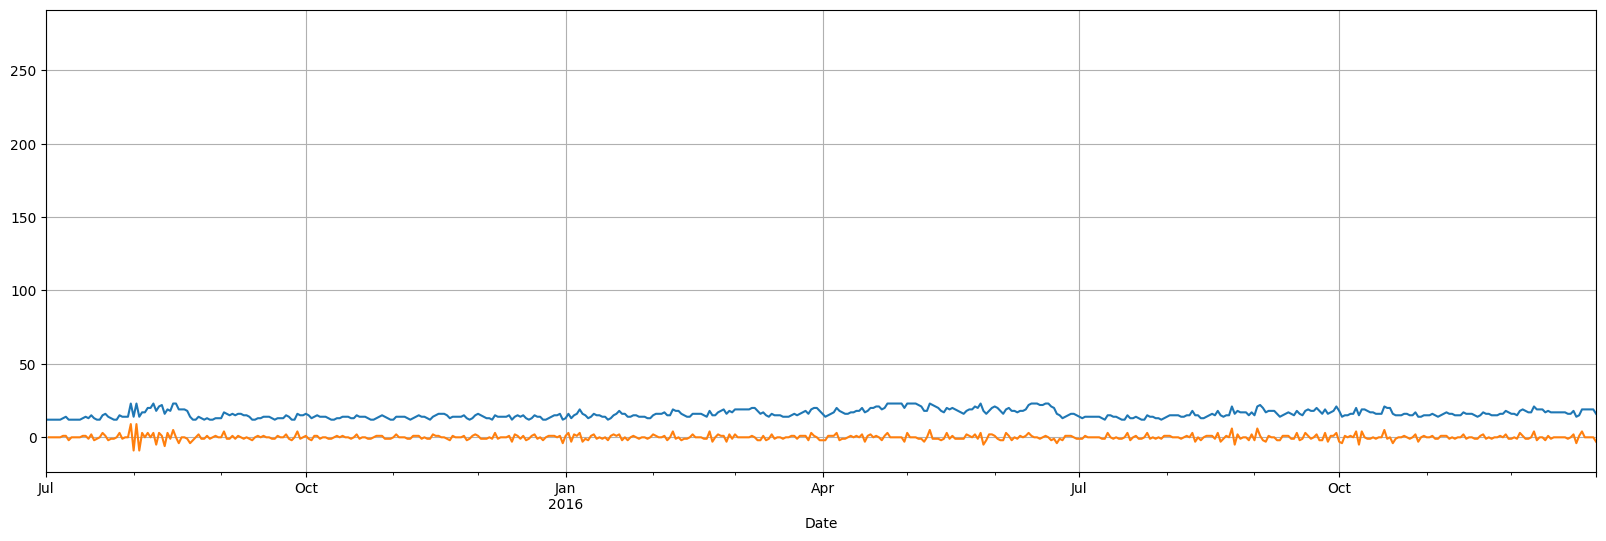

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(commons_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


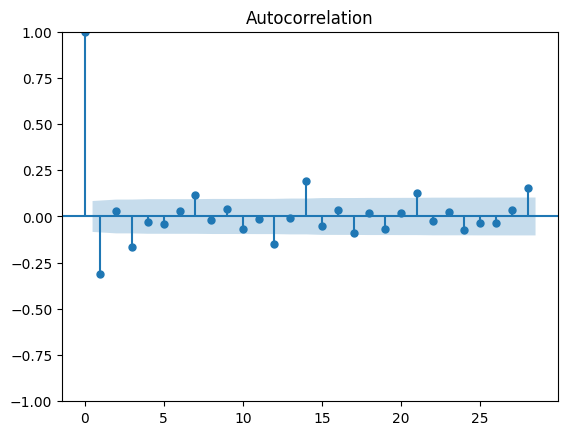

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


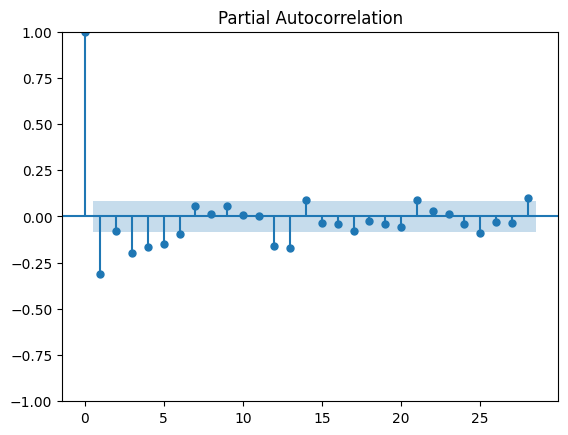

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(commons_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1.436
RMSE : 1.931
MAPE: 0.081


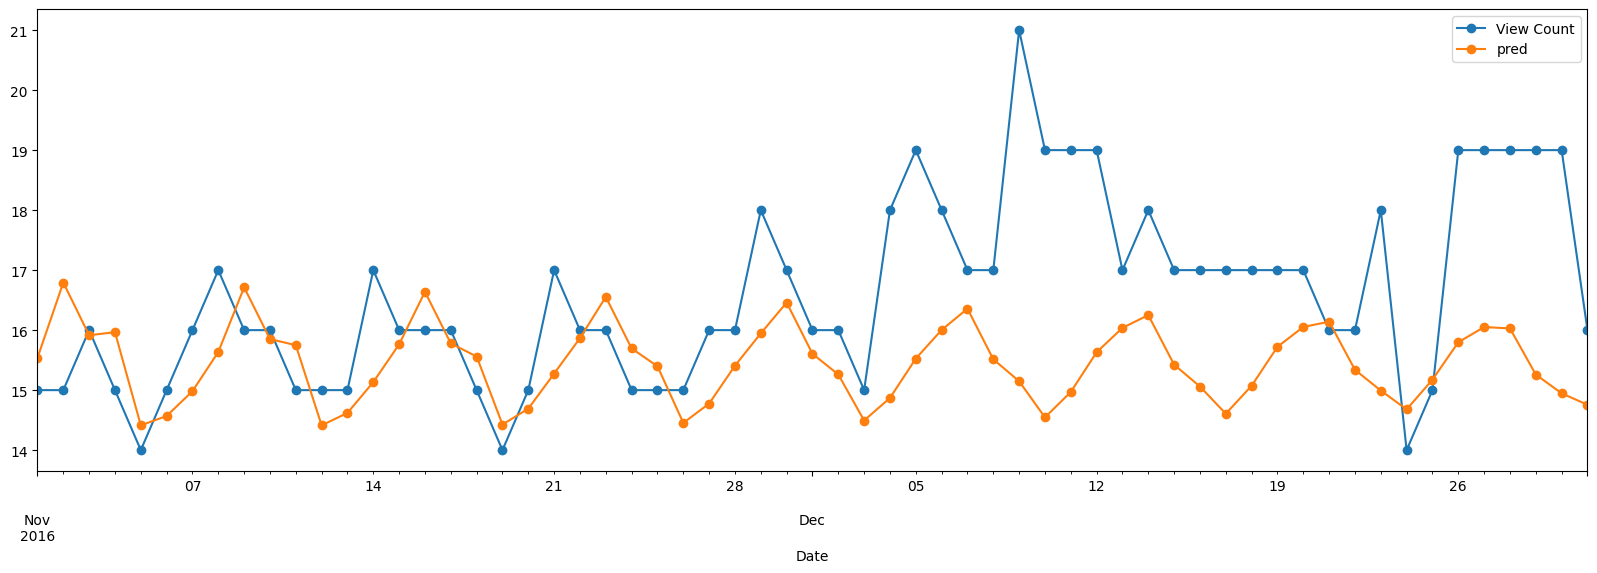

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1.192
RMSE : 1.533
MAPE: 0.069


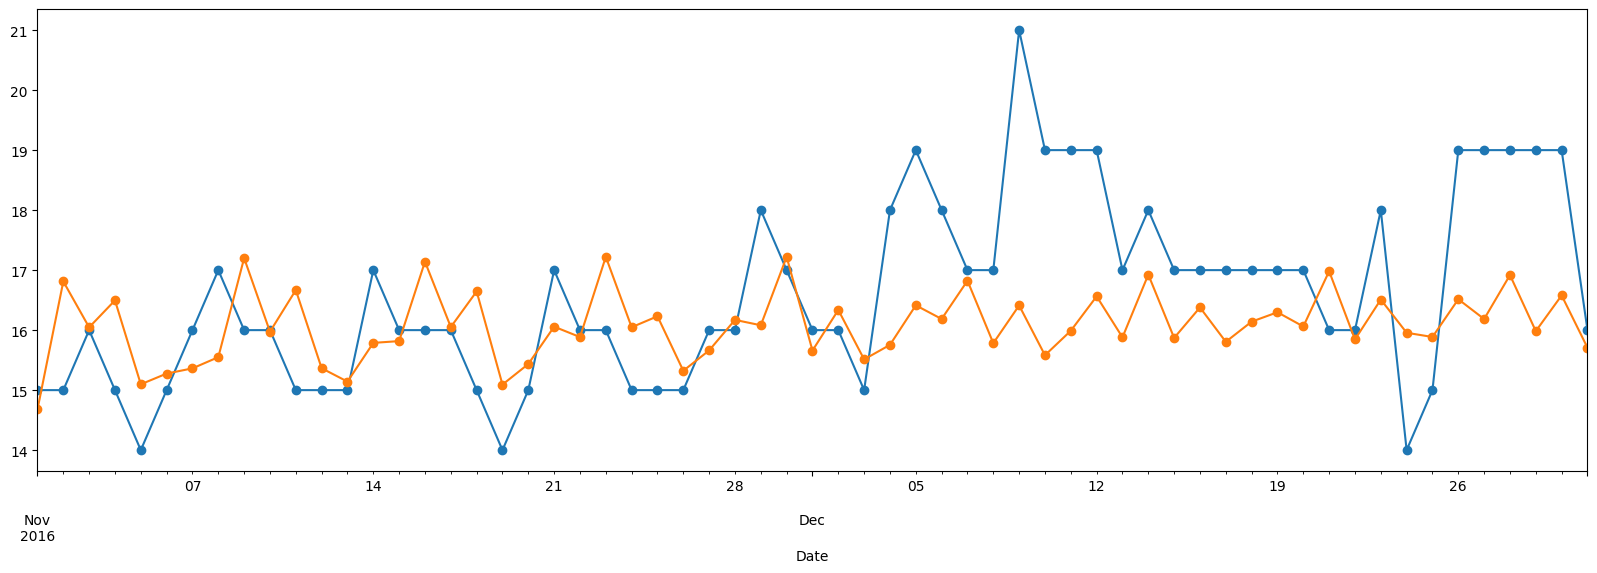

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1.327
RMSE : 1.709
MAPE: 0.076


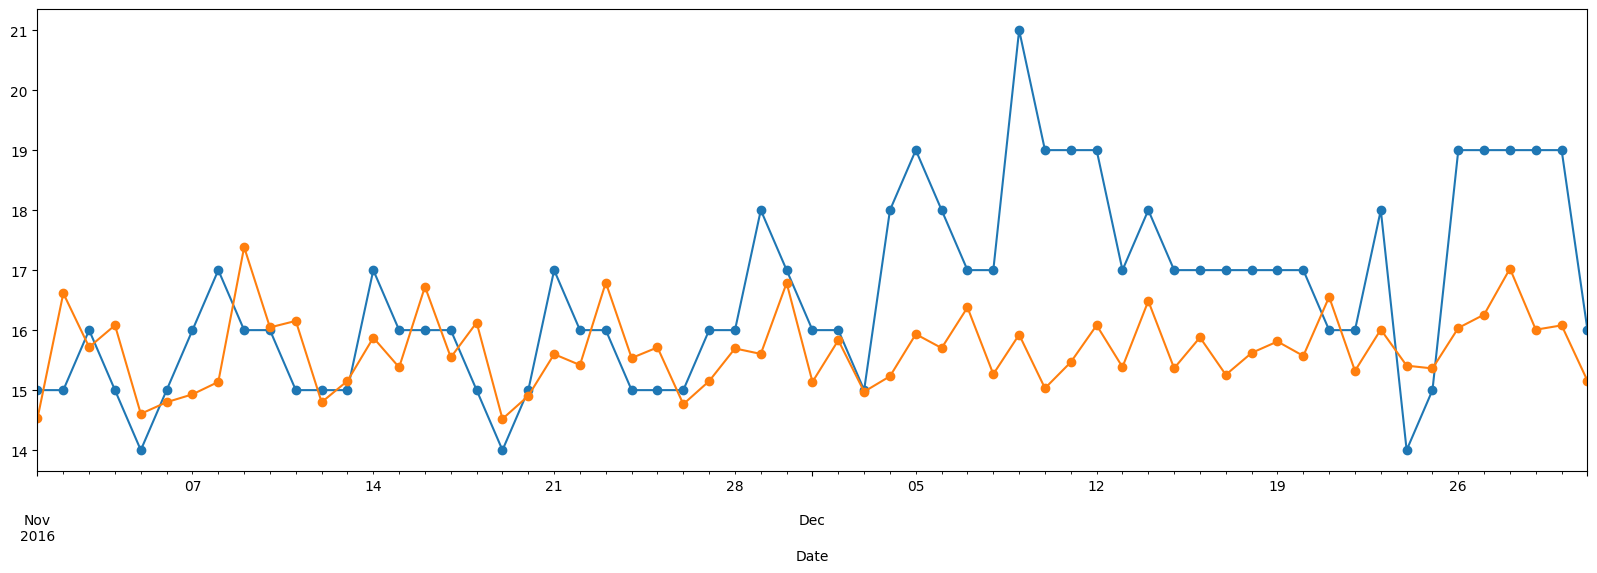

In [ ]:
SARIMA_EXOG_model(commons_data,df_x)

# **LANGUAUGE = RU**

In [ ]:
ru_data=grouped_data[4].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

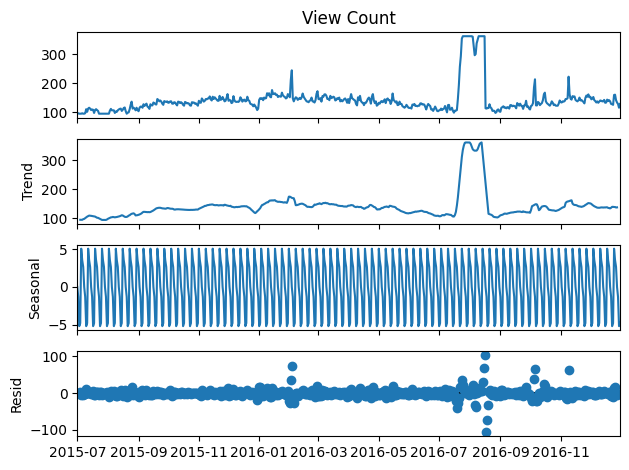

In [ ]:
decomp_model=decompose_timeSeries(ru_data)

De-Trending and Removing Seasonality
Mean 0.060109289617486336
Variance 271.7863795500777


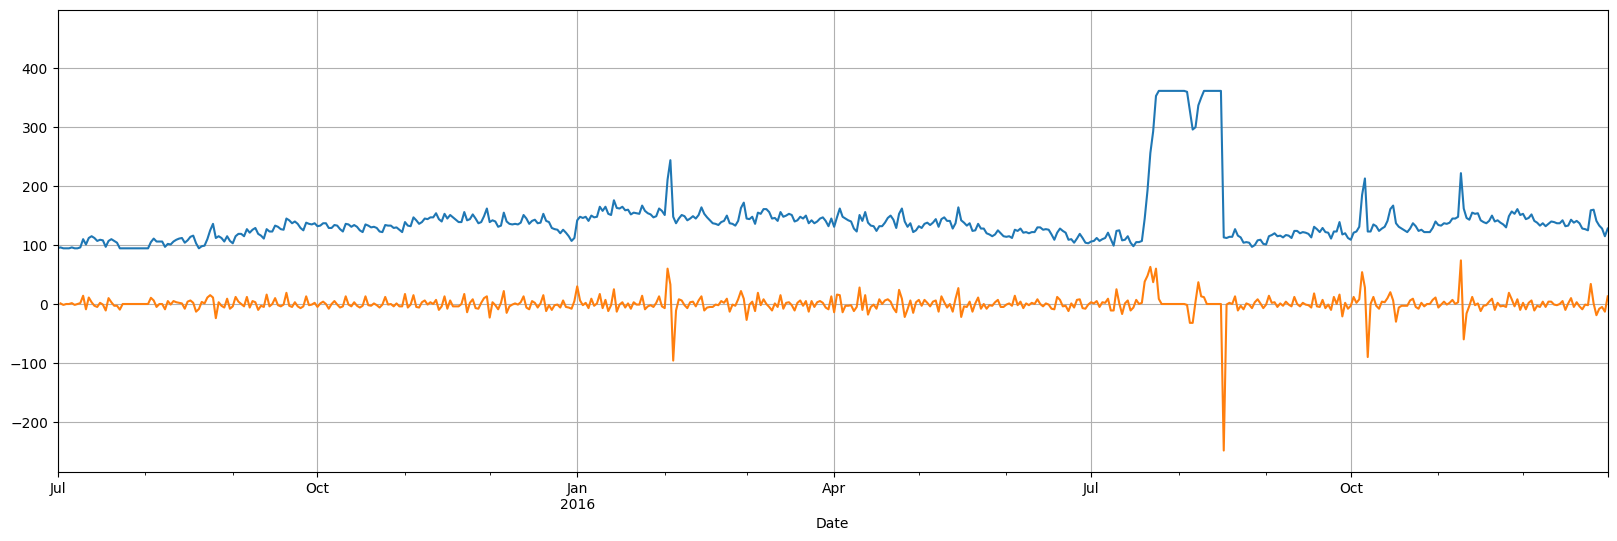

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(ru_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


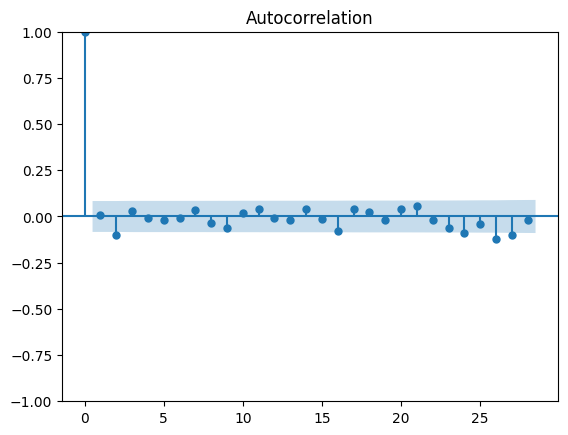

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


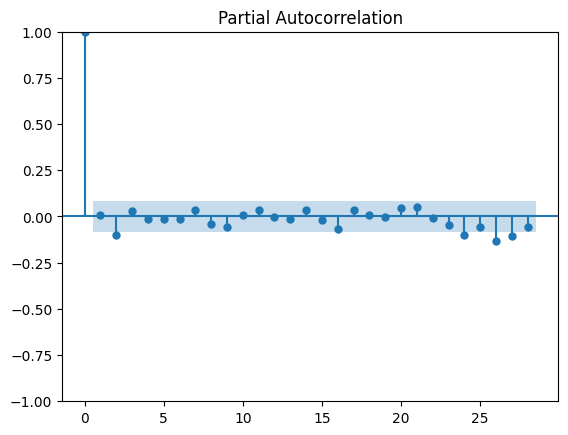

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(ru_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9.243
RMSE : 15.09
MAPE: 0.061


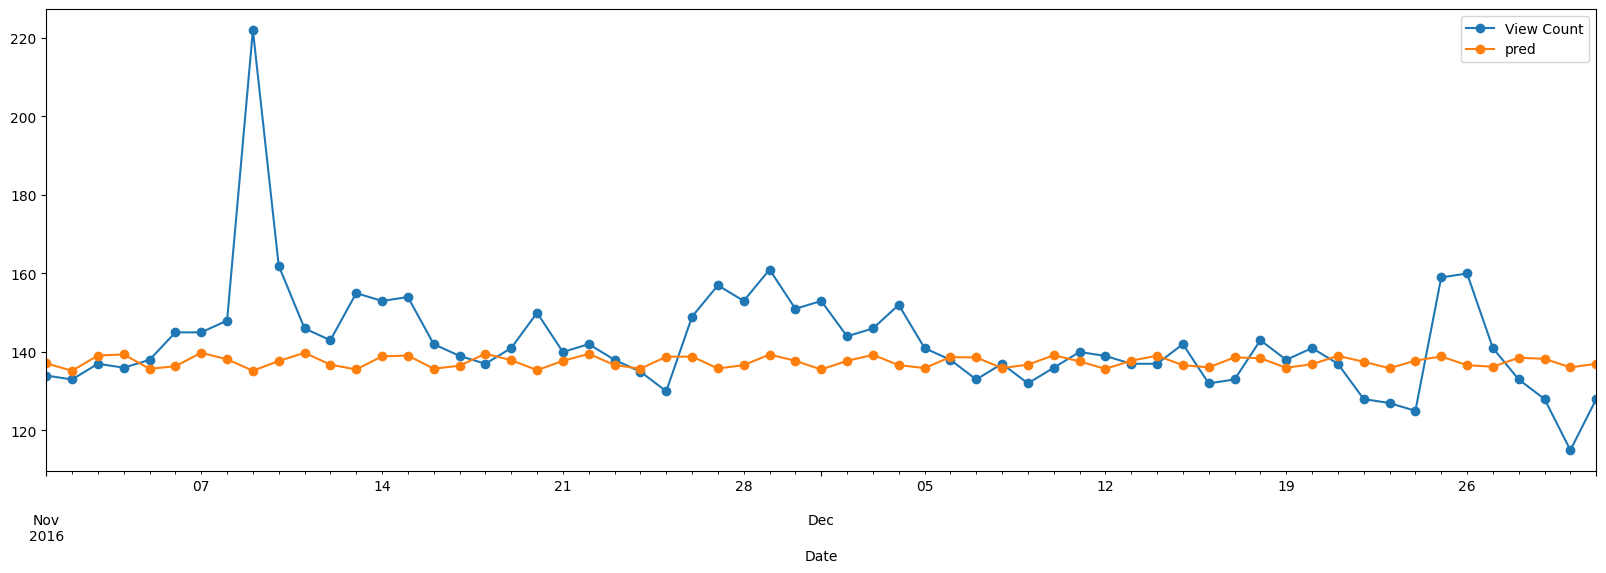

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9.675
RMSE : 14.731
MAPE: 0.066


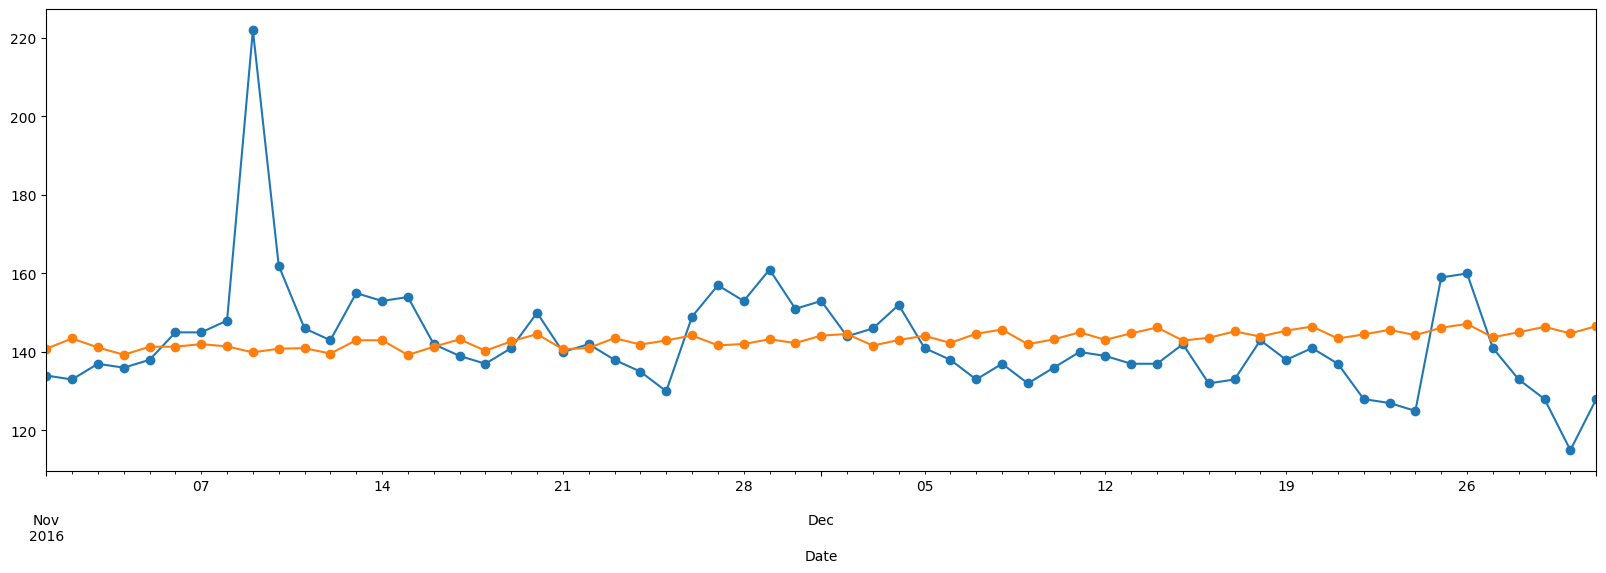

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 10.778
RMSE : 15.02
MAPE: 0.076


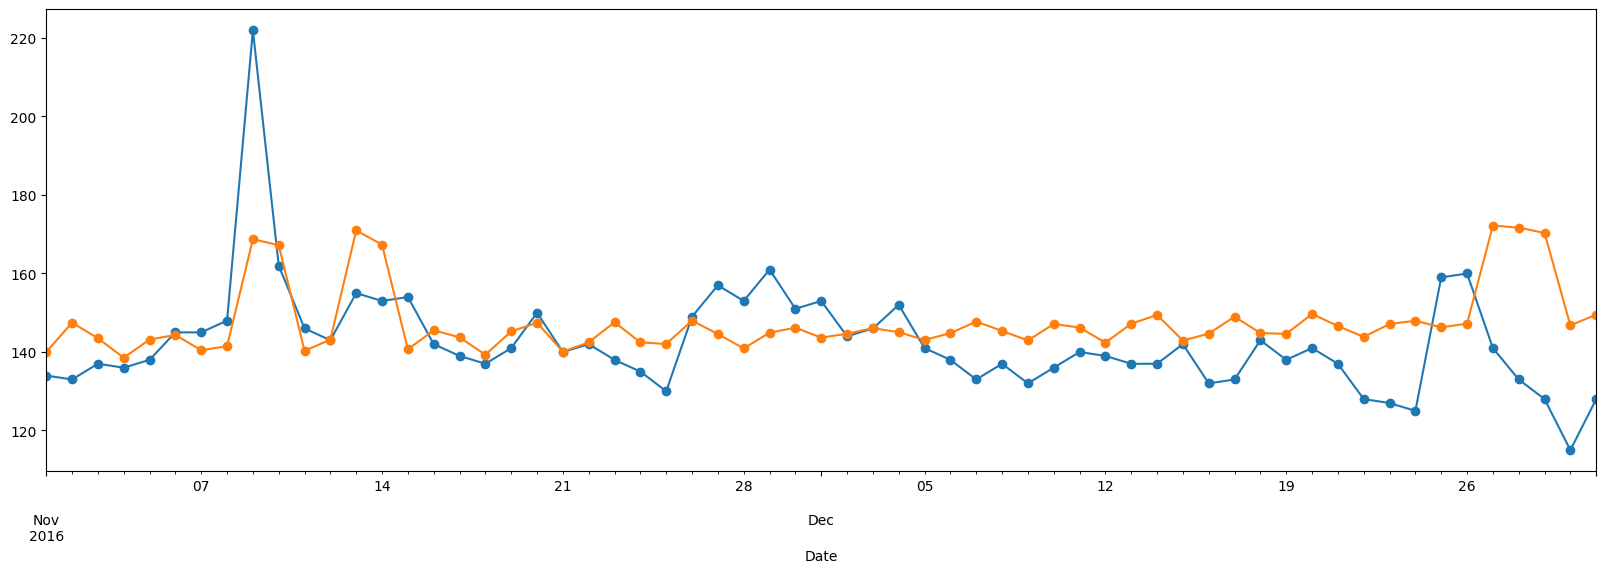

In [ ]:
SARIMA_EXOG_model(ru_data,df_x)

# **LANGUAUGE = www**

In [ ]:
www_data=grouped_data[5].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

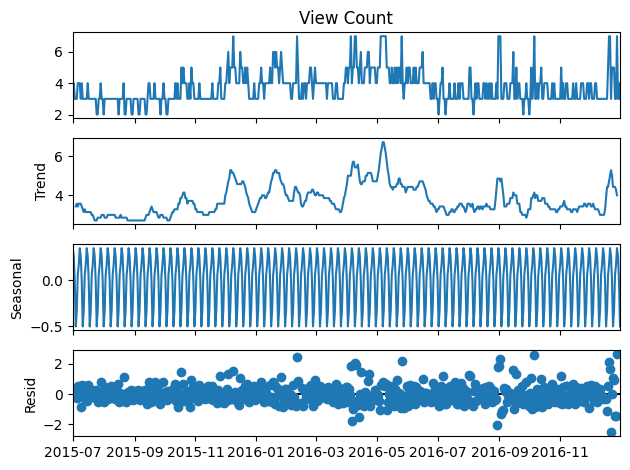

In [ ]:
decomp_model=decompose_timeSeries(www_data)

De-Trending and Removing Seasonality
Mean 0.0
Variance 0.9014598540145985


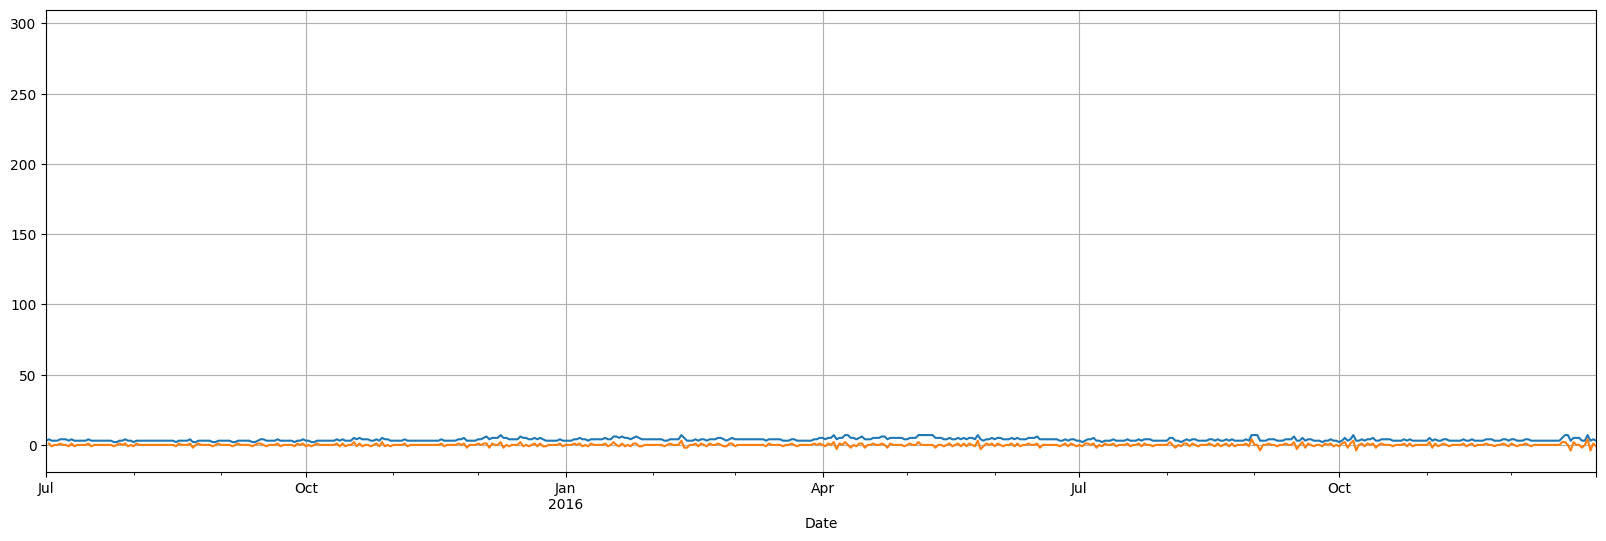

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(www_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


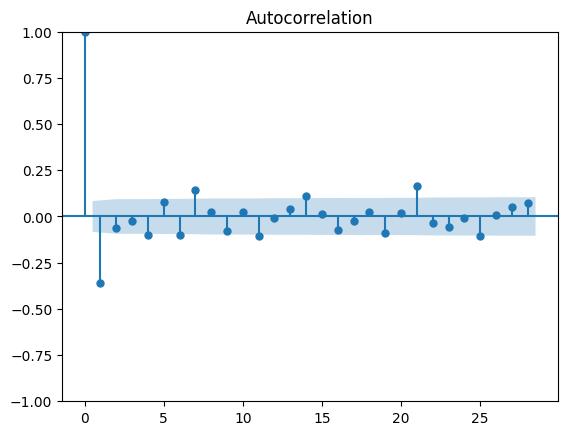

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


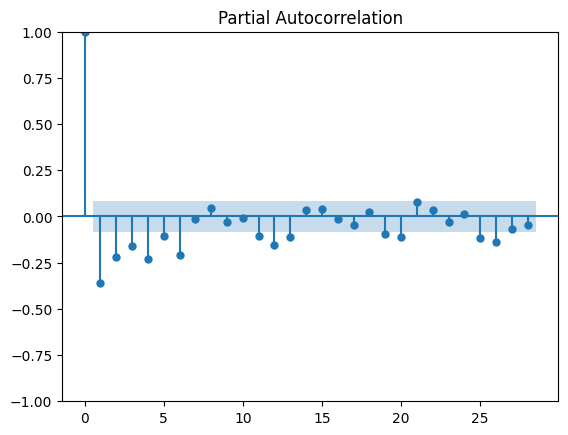

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(www_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 0.652
RMSE : 1.034
MAPE: 0.152


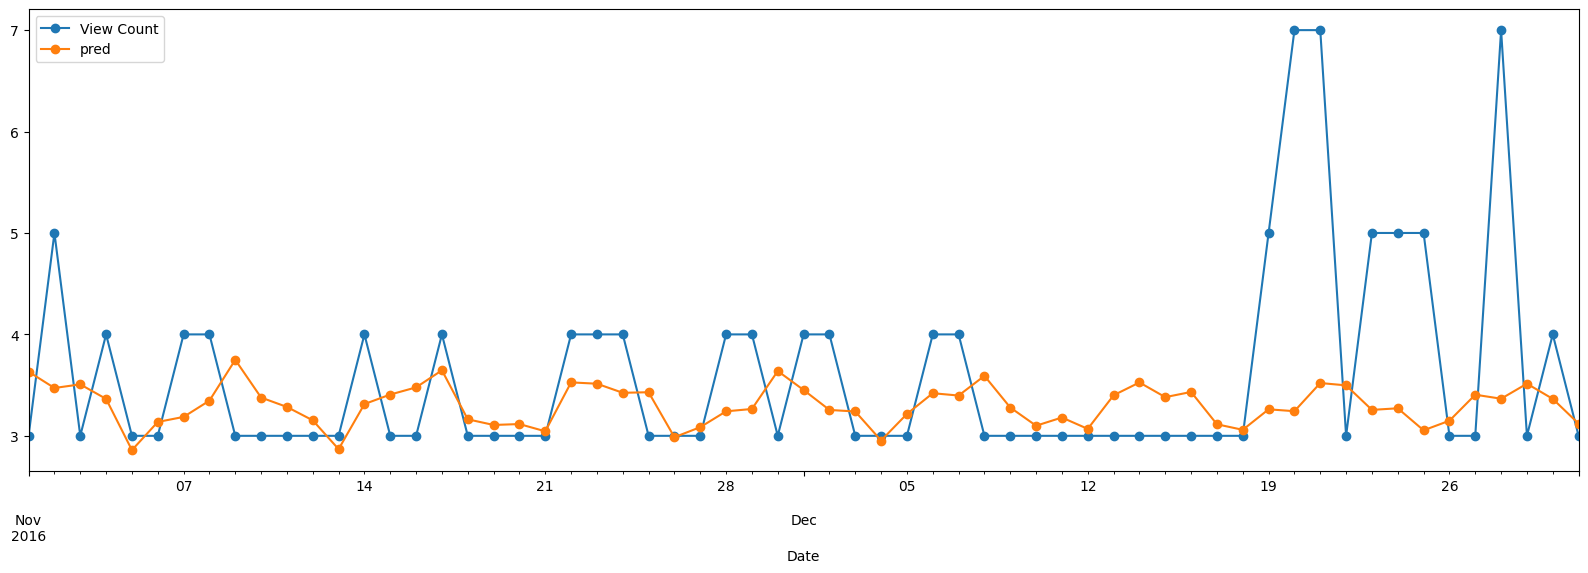

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 0.696
RMSE : 1.033
MAPE: 0.167


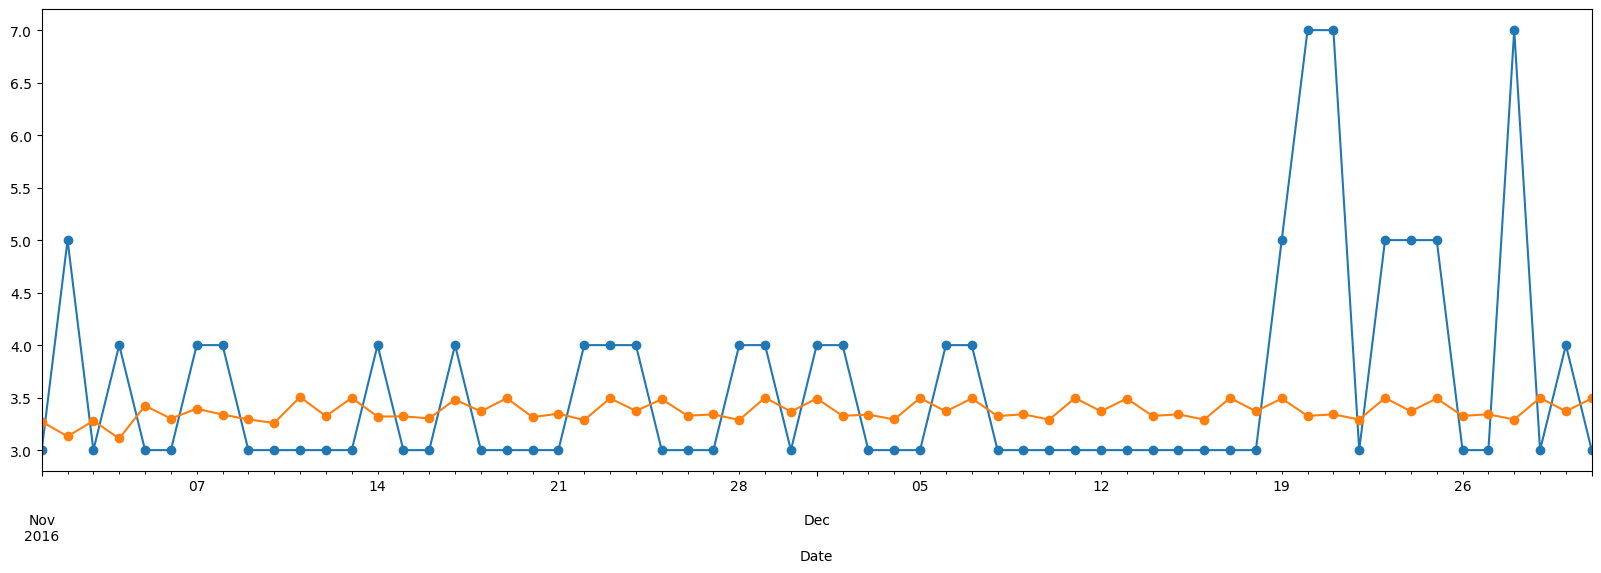

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 0.705
RMSE : 1.033
MAPE: 0.17


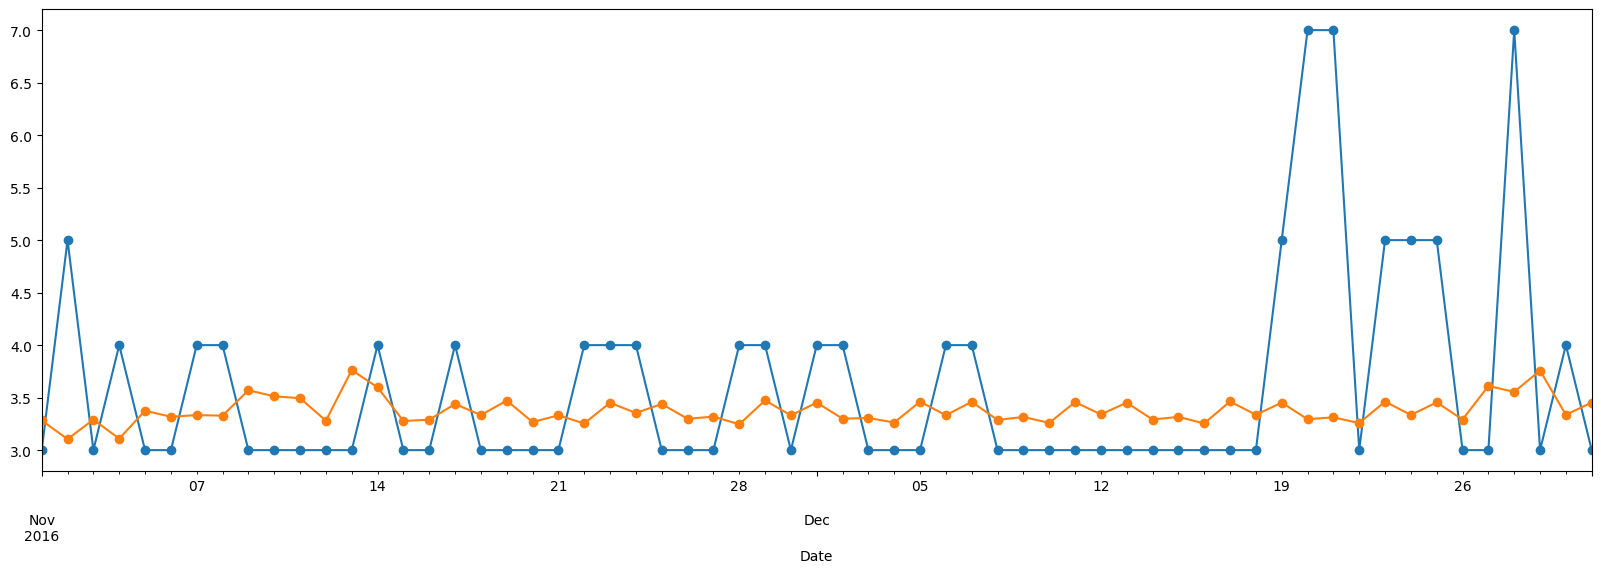

In [ ]:
SARIMA_EXOG_model(www_data,df_x)

# **LANGUAUGE = DE**

In [ ]:
de_data=grouped_data[6].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

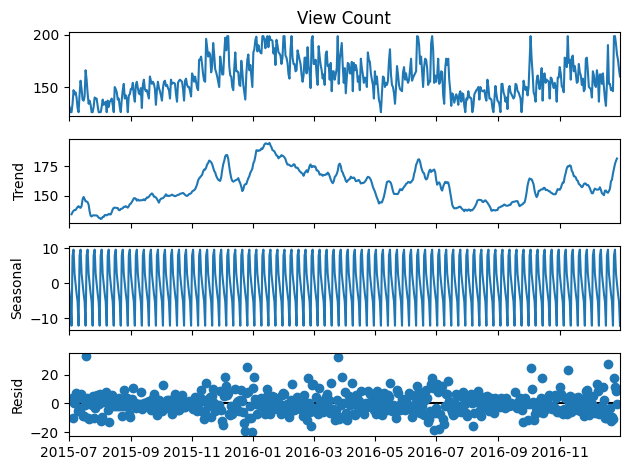

In [ ]:
decomp_model=decompose_timeSeries(de_data)

De-Trending and Removing Seasonality
Mean 0.04918032786885246
Variance 157.6481305312911


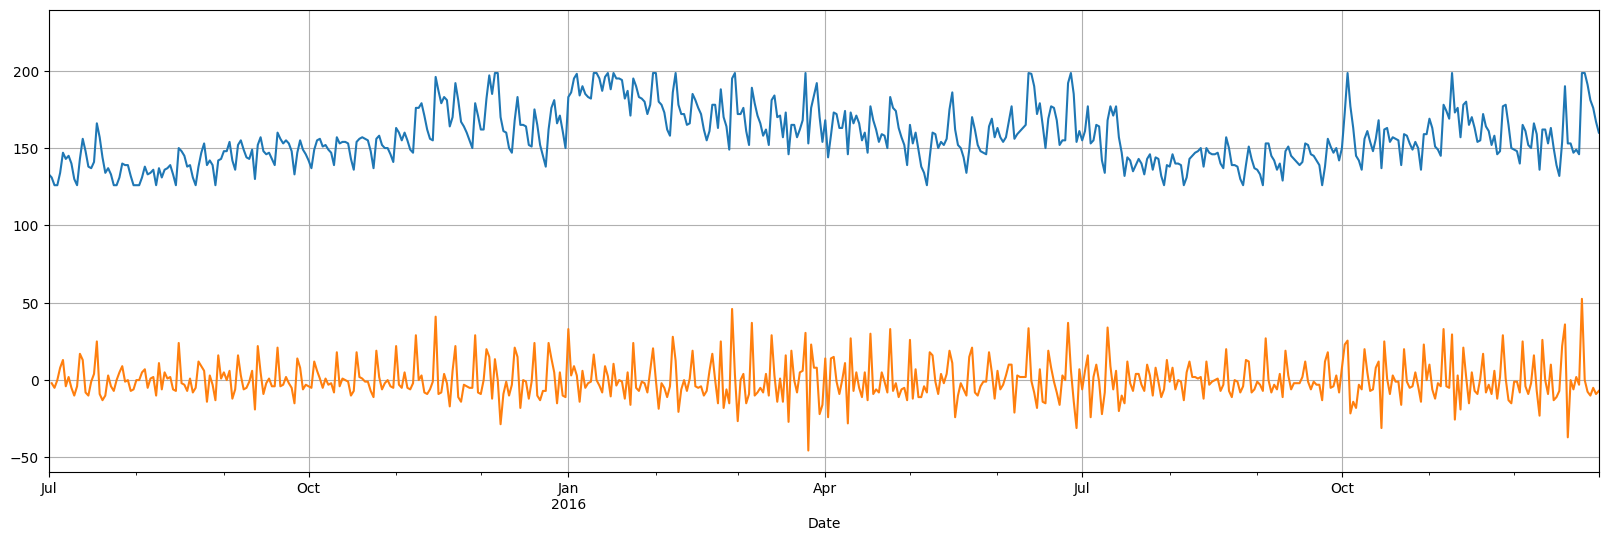

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(de_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


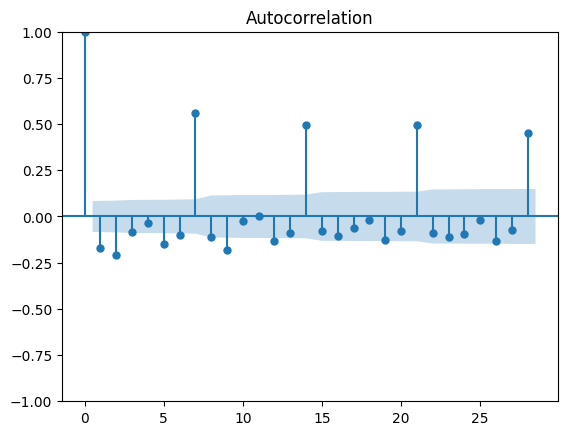

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


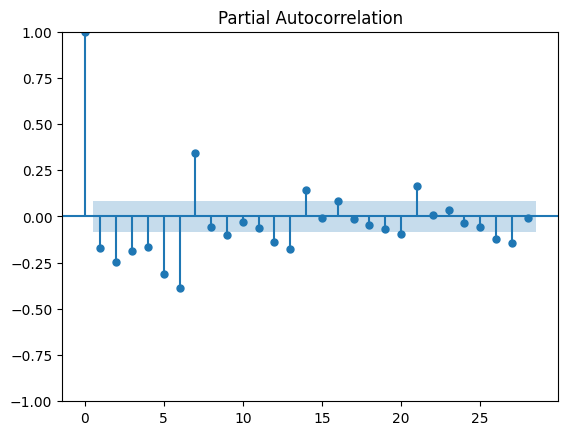

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(de_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 12.624
RMSE : 17.133
MAPE: 0.073


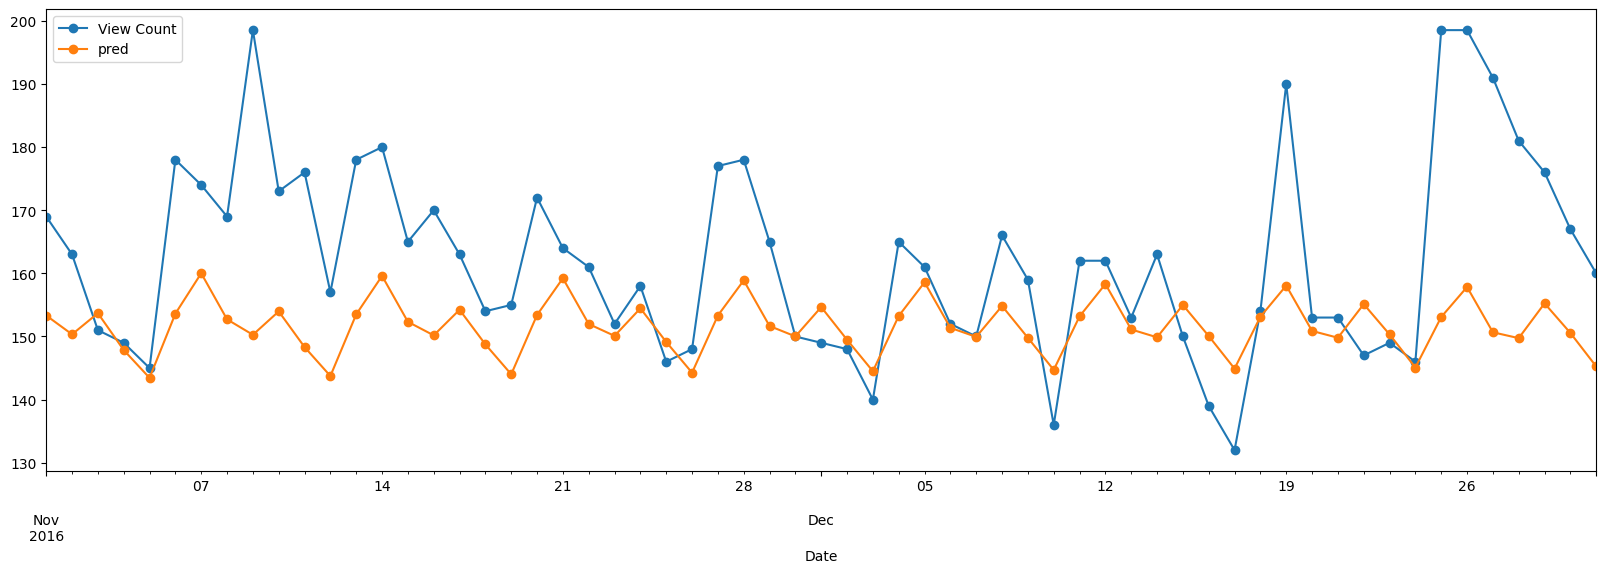

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 14.62
RMSE : 19.183
MAPE: 0.085


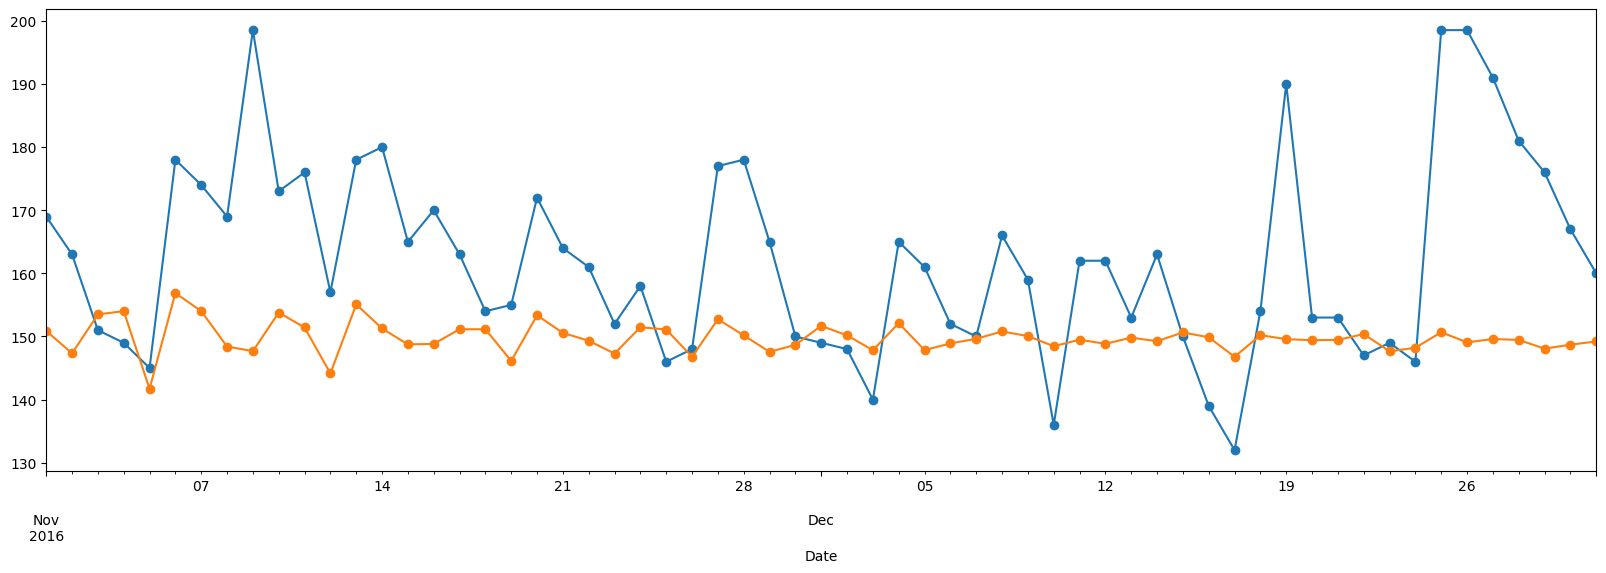

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 13.008
RMSE : 16.727
MAPE: 0.076


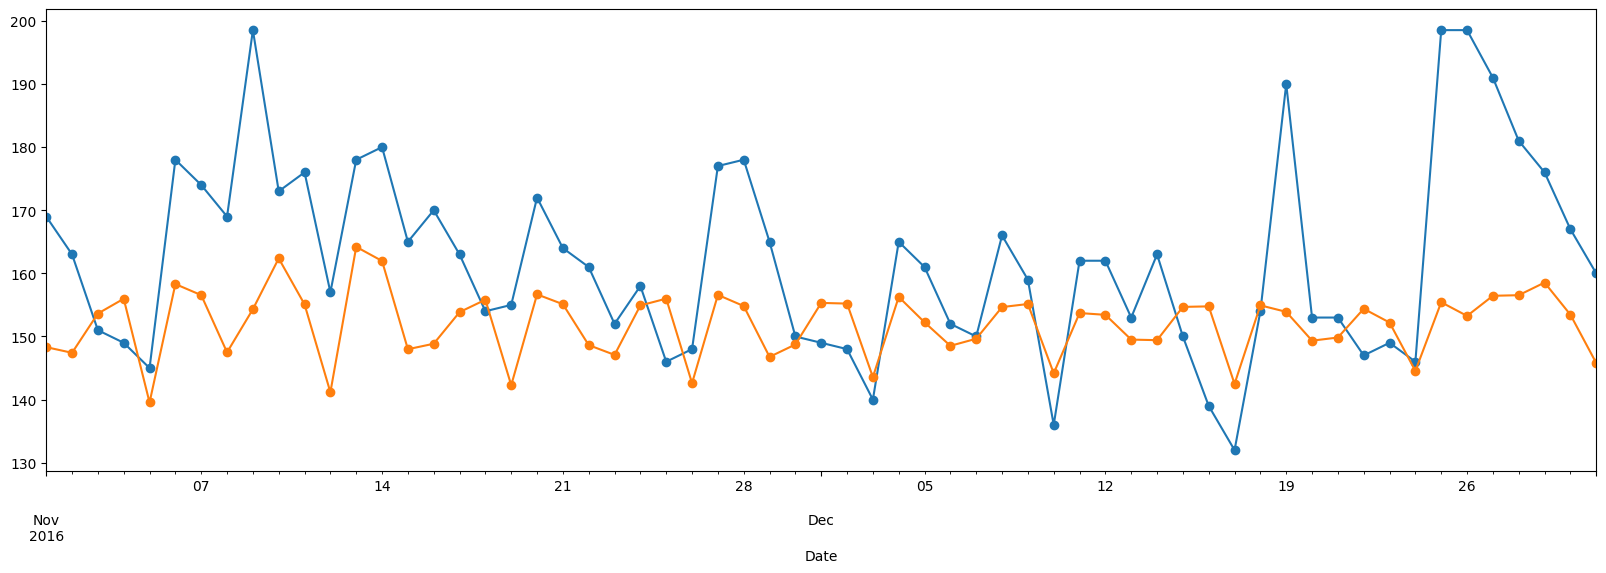

In [ ]:
SARIMA_EXOG_model(de_data,df_x)

# **LANGUAUGE = JA**

In [ ]:
ja_data=grouped_data[7].copy()

Decomposition of Time Series


<Figure size 2000x600 with 0 Axes>

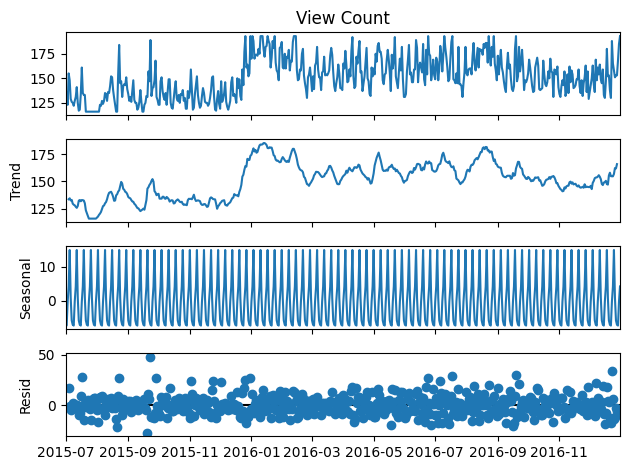

In [ ]:
decomp_model=decompose_timeSeries(ja_data)

De-Trending and Removing Seasonality
Mean 0.13479052823315119
Variance 236.28471806735536


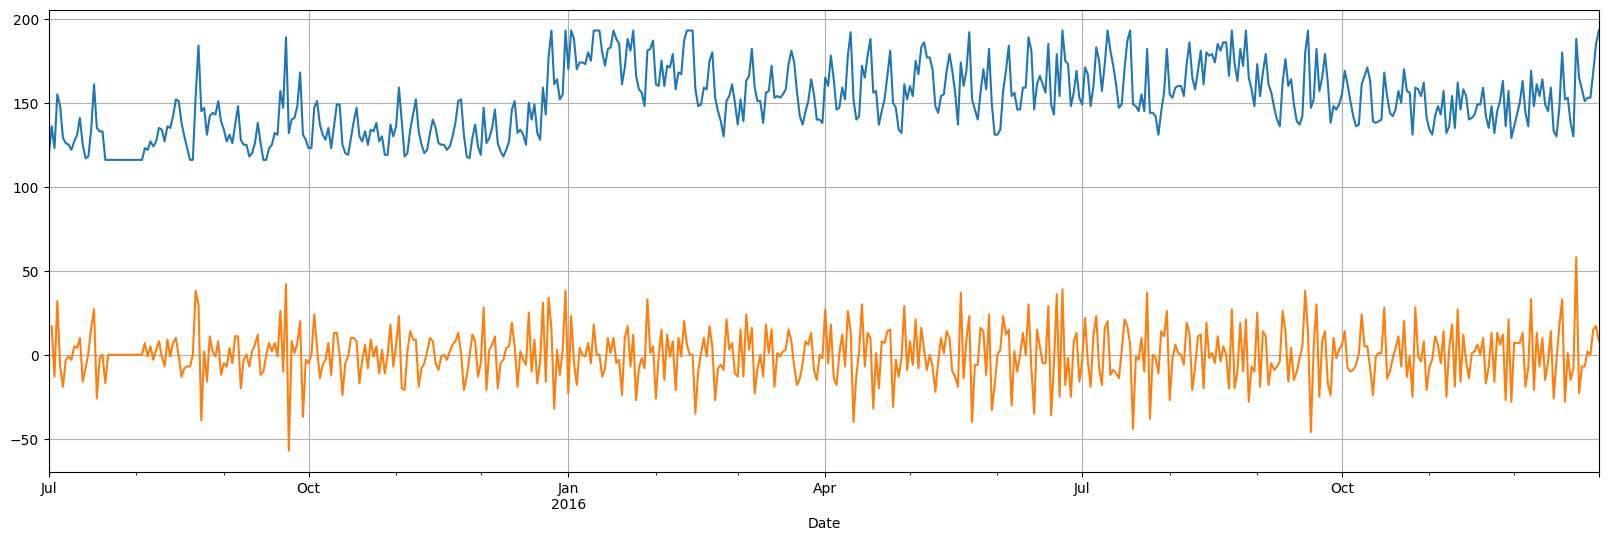

In [ ]:
plt.figure(figsize=(20, 6))
detrend = deTrend(ja_data)

In [ ]:
 # st_data = checkSeasonality(decomp_model,detrend)
print("Stationary or Non-Stationary Augmented Dickey Fuller test")
adf_test(detrend)

Stationary or Non-Stationary Augmented Dickey Fuller test
Sequence is stationary


ACF


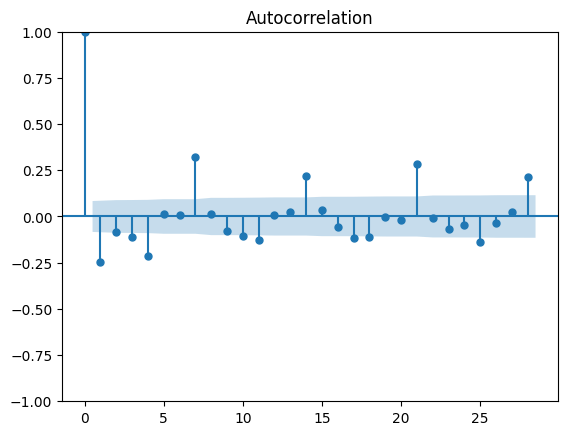

In [ ]:
print("ACF")
plot_acf(detrend)
plt.show()

PACF


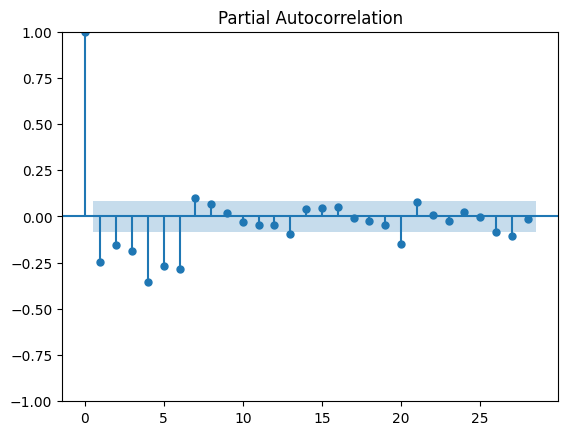

In [ ]:
print("PACF")
plot_pacf(detrend)
plt.show()

In [ ]:
train_x,test_x= get_train_test(ja_data,61)


Train Test Split


ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9.817
RMSE : 13.607
MAPE: 0.064


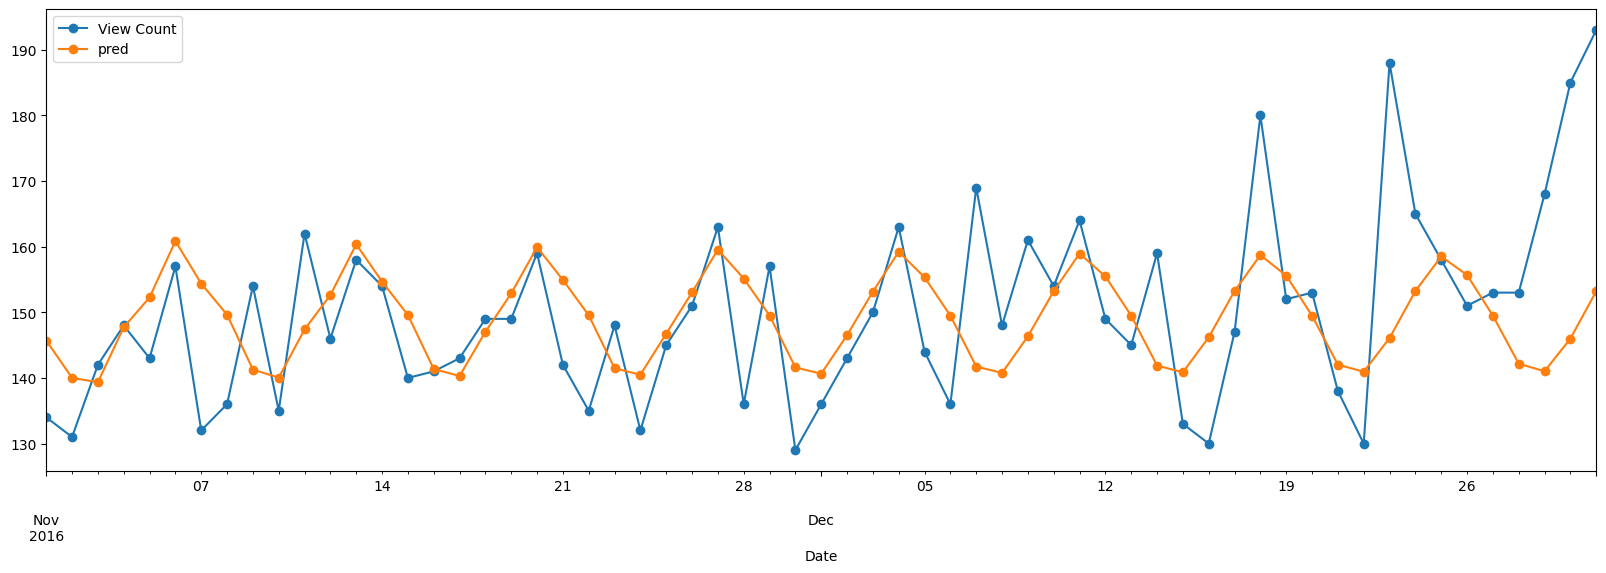

In [ ]:
ARIMA_model(train_x,test_x)


SARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 11.874
RMSE : 14.642
MAPE: 0.08


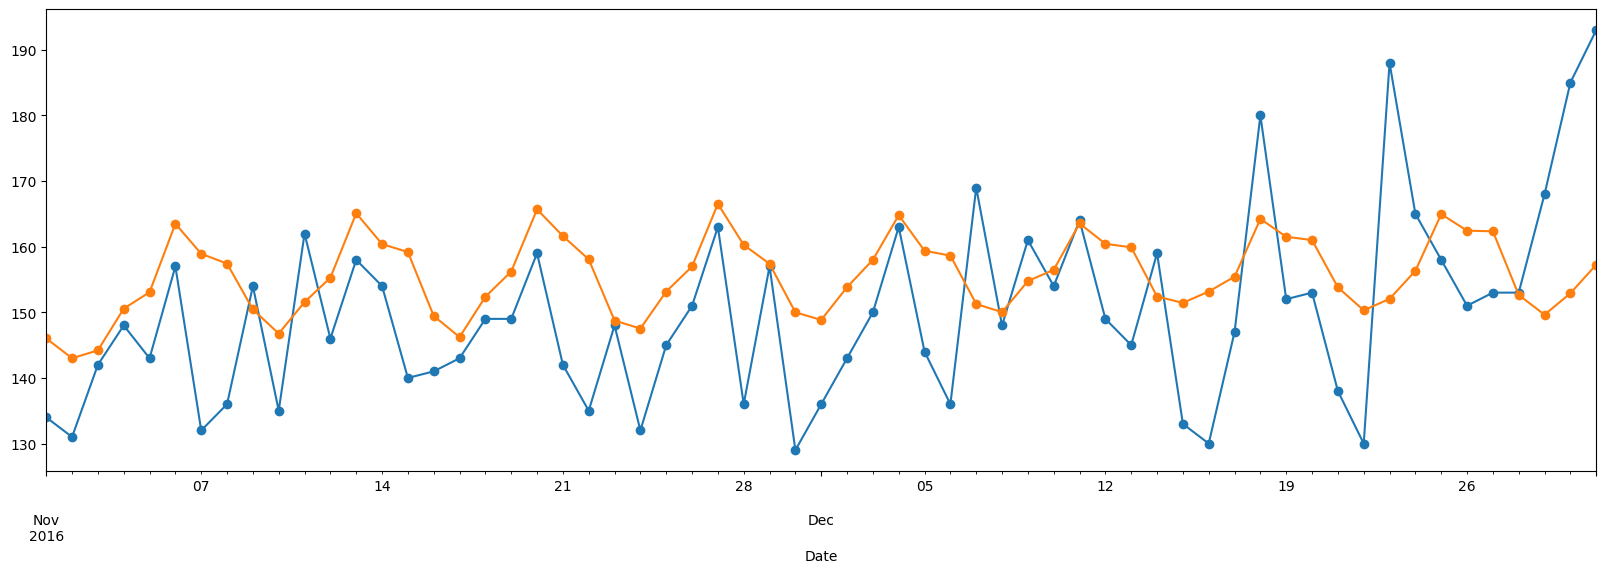

In [ ]:
SARIMA_model(train_x,test_x)

SARIMA Model with exogenous


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 11.301
RMSE : 14.43
MAPE: 0.075


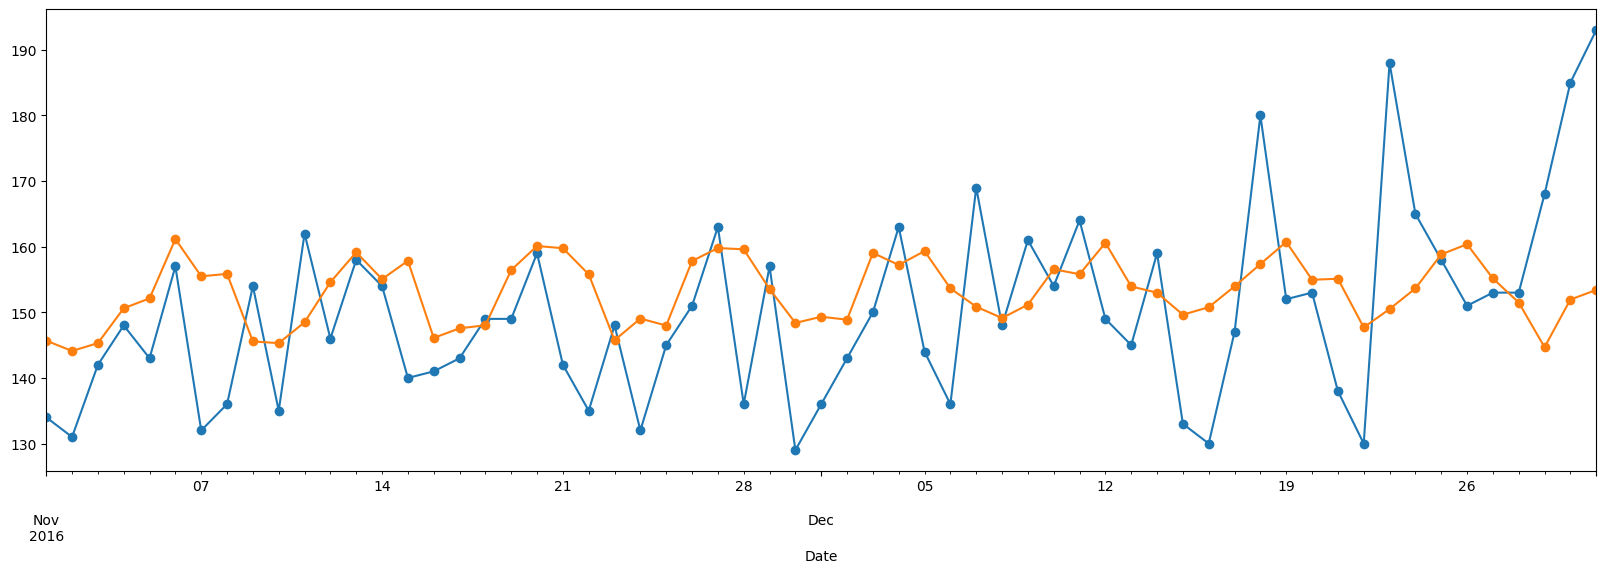

In [ ]:
SARIMA_EXOG_model(ja_data,df_x)

### Language: ZH
ARIMA Model Performance

MAE : 2.238
RMSE : 3.226
MAPE: 0.042

SARIMAX with EXOG

MAE : 2.523
RMSE : 3.239
MAPE: 0.049

### Language: FR
ARIMA Model Performance

MAE : 14.692
RMSE : 18.047
MAPE: 0.117

SARIMAX with EXOG

MAE : 9.541
RMSE : 12.698
MAPE: 0.076

### EN
ARIMA Model Performance

MAE : 88.243
RMSE : 126.907
MAPE: 0.072

SARIMAX with EXOG

MAE : 75.833
RMSE : 99.416
MAPE: 0.066

### COMMON
ARIMA Model Performance

MAE : 1.436
RMSE : 1.931
MAPE: 0.081

SARIMAX with EXOG

MAE : 1.327
RMSE : 1.709
MAPE: 0.076

### RU
ARIMA Model Performance

MAE : 9.243
RMSE : 15.09
MAPE: 0.061

SARIMAX with EXOG

MAE : 10.778
RMSE : 15.02
MAPE: 0.076


### www
ARIMA Model Performance

MAE : 0.652
RMSE : 1.034
MAPE: 0.152

SARIMAX with EXOG

MAE : 0.696
RMSE : 1.033
MAPE: 0.167

### DE
ARIMA Model Performance

MAE : 12.624
RMSE : 17.133
MAPE: 0.073

SARIMAX with EXOG

MAE : 13.008
RMSE : 16.727
MAPE: 0.076

### JA
ARIMA Model Performance

MAE : 9.817
RMSE : 13.607
MAPE: 0.064

SARIMAX with EXOG

MAE : 11.301
RMSE : 14.43
MAPE: 0.075

Most of the Language have a seasonalit of 7, ie on weekends the view count is more

The past week data has significant autocorrelation in predicition

For few languages exogenous data improves MAPE

With diff(1) all the languages shows stationary